<a href="https://colab.research.google.com/github/prajwalwanjari/DO_Projects/blob/main/DO_Project_1_Prajwal_Wanjari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Design Optimization - Project 1:**

**Prajwal Wanjari**

**1222575718** 


###Problem Statement
---
$$
\begin{aligned}
\min_{\theta} \quad & \mathbb{E}_{\{w(t), u(t), x(0)\}}\left[||x(T)||^2\right] \\
\quad & d(t+1) = d(t) + v(t) + w(t) \Delta t, \\
\quad & v(t+1) = v(t) + a(t) + u(t) \Delta t, \\
\quad & a(t) = f_{\theta}(x(t)), ~\forall t=1,...,T-1 \\
\quad & x(1) \sim \Pr(x(1))
\end{aligned}
$$

Here $w(t) \sim \Pr(w(t))$ and $u(t) \sim \Pr(u(t))$ are modeled as i.i.d. noises added to the dynamics, and $\Pr(x(1))$ is the distribution of initial states. We will approximate this problem using samples from $\Pr(w(t))$, $\Pr(u(t))$, and $\Pr(x(1))$. To do so, we sample $\{w(1)^{(i)},w(2)^{(i)},...,w(T)^{(i)}\}_{i}^N$ from $\Pr(w(t))$,  $\{u(1)^{(i)},u(2)^{(i)},...,u(T)^{(i)}\}_{i}^N$ from $\Pr(u(t))$, and $\{x(0)^{(i)}\}_{i}^N$ from $\Pr(x(1))$, where $N$ is the number of samples to be considered. Then we have the following problem instead:

$$
\begin{aligned}
\min_{\theta} \quad & \frac{1}{N}\sum_{i=1}^N ||x^{(i)}(T)||^2 \\
\quad & d(t+1)^{(i)} = d(t)^{(i)} + v(t)^{(i)} + w(t)^{(i)} \Delta t, \\
\quad & v(t+1)^{(i)} = v(t)^{(i)} + a(t)^{(i)} + u(t)^{(i)} \Delta t, \\
\quad & a(t)^{(i)} = f_{\theta}(x(t)^{(i)}), ~\forall t=1,...,T-1, ~i=1,...,N \\
\end{aligned}
$$

The code up this new problem, you will fully utilize the tensor operations in PyTorch. For example, the state tensor "x" will now become a N-by-2 matrix, where the first dimension represents the number of trajectories to be optimized. 


Consider a simple formulation of rocket landing where the rocket state $x(t)$ is represented by its distance to the ground $d(t)$ and its velocity $v(t)$, i.e., $x(t) = [d(t), v(t)]^T$, where $t$ specifies time. The control input of the rocket is its acceleration $a(t)$. The discrete-time dynamics follows 

$$
\begin{aligned}
d(t+1) = d(t) + v(t) \Delta t, \\
v(t+1) = v(t) + a(t) \Delta t,
\end{aligned}
$$

where $\Delta t$ is a time interval. Further, let the closed-loop controller be 

$$
a(t) = f_{\theta}(x(t))
$$

where $f_{\theta}(\cdot)$ is a neural network with parameters $\theta$, which are to be determined through optimization.

For each time step, we assign a loss as a function of the control input and the state: $l(x(t),a(t))$. In this example, we will simply set $l(x(t),a(t))=0$ for all $t=1,...,T-1$, where $T$ is the final time step, and $l(x(T),a(T)) = ||x(T)||^2 = d(T)^2 + v(T)^2$. This loss encourages the rocket to reach $d(T)=0$ and $v(T)=0$, which are proper landing conditions.

The optimization problem is now formulated as

$$
\begin{aligned}
\min_{\theta} \quad & ||x(T)||^2 \\
\quad & d(t+1) = d(t) + v(t) \Delta t, \\
\quad & v(t+1) = v(t) + a(t) \Delta t, \\
\quad & a(t) = f_{\theta}(x(t)), ~\forall t=1,...,T-1
\end{aligned}
$$


Here is a list of things we discussed during the class that could help to make the problem more representative of the reality:

1. More realistic definition of state and action spaces: Rocket orientation, angular velocity, etc. 
2. Better dynamical model, e.g., drag
3. Constraints in state and action spaces
4. Controller design for a distribution of initial states rather than one
5. Randomness in dynamics, sensing, etc.
6. Discontinuity in modeling so that gradient cannot be computed, e.g., mechanical failures.

In this project, please choose at least one aspect from 1 to 5 from the list to improve your problem formulation and solve the resultant problem. We will address 6 when we talk about reinforcement learning.

 Grading

* (30%) Documentation of the problem formulation: Clearly describe the objective function, the variables, the constraints, and the assumptions involved in formulating the problem.

* (40%) Programming: Like for homeworks, please push you code to your github repo. Please comment your code so that it is useful to you in the future.

* (30%) Analysis of the results: Please document the convergence and the optimal solutions (e.g., the state trajectory if it is a control problem).

* (Bonus 20%) Formulation of a problem different from rocket landing: The PyTorch framework can also be used for other engineering problems, e.g., for structure design with nonlinear mechanical properties. You get 20 bonus points for solving your own problems that are at least at the same level of difficulty as rocket landing. 


(Code Template Provided By Dr. Ren.)

---
## Problem Formulation.
In this project, we consider the 2D-task of landing a rocket, whose state $x(t)$ is defined as $$x(t) = [x(t), \dot{x}(t), y(t), \dot{y}(t), , z(t), \dot{z}(t)]^T,$$ where $x(t)$ and $y(t)$ are the rocket's horizontal and vertical locations, respectively, with the center of the landing pad as the origin. Positive vertical velocity is upward, and positive horizontal velocity is rightward. The rocket is controlled by the input $a(t)=[a_1(t), a_2(t), a_3(t),a_4(t), a_5(t)]$ such that its dynamics follow 

$$
\begin{aligned}
x(t+1) = x(t) + \dot{x}(t)\Delta t, \\
y(t+1) = y(t) + \dot{y}(t)\Delta t, \\
z(t+1) = z(t) + \dot{y}(t)\Delta t, \\
\dot{x}(t+1) = \dot{y}(t) + a_1(t) \Delta t, \\
\dot{y}(t+1) = \dot{z}(t) + a_2(t) \Delta t, \\
\dot{z}(t+1) = \dot{x}(t) + a_3(t) \Delta t,
\end{aligned}
$$

with $\Delta t$ being the discrete time interval. The controller input $a(t)$ is given as 
$$ a(t) = f_{\theta}(x(t)) + D(t) + G. $$ 
In this problem formulation, $f_{\theta}(\cdot)$ is a neural network with optimized parameters $\theta$ (representing position and velocity of the rocket), $D$ is a drag component defined as $D(t) = [-d\dot{x}^2(t), -d\dot{y}^2(t)]^T$ where $d$ is a drag constant, and $G$ is a vector defined as  $G = [0, g]^T,$ where $g$ is the gravitational constant. Hence this simulation takes the assumption that the rocket is not only being acted upon by its own thrust, but also by drag and gravitational forces. 

*From the provided problem statement:*<br>
For each time step, we assign a loss as a function of the control input and the state: $l(x(t),a(t))$. In this example, we will simply set $l(x(t),a(t))=0$ for all $t=1,...,T-1$, where $T$ is the final time step, and $$l(x(T),a(T)) = ||x(T)||^2.$$ This loss encourages the rocket to reach position $x, y(T)=0$ and $\dot{x},\dot{y}(T)=0$, which are proper landing conditions.

Additionally, to optimize the neural network parameters in a more realistic scenario, wherein there exists randomness in the initial state, we train the model over $N$ separate trajectories, with each trajectory having an initial state that is randomly perturbed from a theoretical location. In other words, if $$[x_{theoretical}(1), y_{ theoretical}(1)]^T =[a,b]^T$$ is the theoretical starting point for the rocket, then its true starting point would be $$[x(1), y(1)]^T=[a+\alpha, b+\beta]^T$$ where $\alpha$ and $\beta$ are sampled from a normal distribution with zero mean and nonzero variance. NOTE: In the code, we are selecting the starting point randomly and we are calculating α, b, β accordingly.

We redefine our loss to be the average of all $N$ losses over the optimized trajectories. Thus, the optimization problem is now formulated as

$$
\begin{aligned}
\min_{\theta} \quad & \frac{1}{N}\sum_{i=1}^N ||x^{(i)}(T)||^2 \\
\quad & x^{(i)}(t+1) = x^{(i)}(t) + \dot{x^{(i)}}(t)\Delta t, \\
\quad & y^{(i)}(t+1) = y^{(i)}(t) + \dot{y^{(i)}}(t)\Delta t, \\
\quad & \dot{x^{(i)}}(t+1) = \dot{x^{(i)}}(t) + a_1^{(i)}(t) \Delta t, \\
\quad & \dot{y^{(i)}}(t+1) = \dot{y^{(i)}}(t) + a_2^{(i)}(t) \Delta t, \\
\quad & a^{(i)}(t) =  f_{\theta}(x^{(i)}(t)) - D^{(i)}(t) + g, ~\forall t=1,...,T-1 \\
\quad & D^{(i)}(t) = [-d(\dot{x^{(i)}})^2(t), -d(\dot{y^{(i)}})^2(t)]^T \\
\quad & x^{(i)}(1)=a+\alpha, \quad \alpha \sim \mathcal{N}(0,\sigma) \\
\quad & y^{(i)}(1)=b+\beta, \quad \beta \sim \mathcal{N}(0,\sigma)\\
\end{aligned}
$$

In the code, we have plotted trajectory plots and simultanousely plotted their respective Horizontal, vertical velocity and position graphs so that we could have a gist of how these factors are changing when we optimize the trajectory of the rocket(influenced by drag, thrust & gravity). 

---
## Simulation.

In [1]:
# OVERHEAD
# Here we are importing libraries which will be used in execute potential defined functions.

import logging
import math
import random as r
import numpy as np
import time
import torch as t
import torch.nn as nn
from torch import optim
from torch.nn import utils
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

logger = logging.getLogger(__name__)

In [2]:
# ENVIRONMENT PARAMETERS
# These defined variables will be used below in the forward function.
# Here we are investigating three parameters of the rocket landing i.e drag, vertical orientation (Distance from ground should when landing should be zero) & 
# horizontal orientation i.e Horizontal positioning on "ground target" (X=0 Y=0 is the desired landing position).

FRAME_TIME = 0.1  # time interval(s)
BOOST_ACCEL_X = 0.18  # thrust constant(km/s^2)
BOOST_ACCEL_Y = 0.18  # thrust constant(km/s^2)
BOOST_ACCEL_mX = -0.18  # thrust constant(km/s^2)           
BOOST_ACCEL_mY = -0.18  # thrust constant(km/s^2)                
GRAVITY_ACCEL = 0.12  # gravity constant(km/s^2)
BOOST_ACCEL_Z = 0.18  # thrust constant(km/s^2)
DRAG_CONST = 0.002 # Drag constant is calculated by multiplying all Cv, rho, area with 0.5 together, divided by mass.                                                           


Here we define our forward funtion which takes the following inputs and outputs.  Here we define the actions as the booster onset and we define the states of the systems as the position and velocity of the rocket in the X, Y and Z directions. 

States (index):
<br />state [0] = x position
<br />state [1] = x velocity 
<br />state [2] = y position
<br />state [3] = y velocity
<br />state [4] = z position
<br />state [5] = z velocity

Furthermore, we can use x, y position to estimate the trajectory of the rocket.  

Actions (index):
<br />action[0] =  X+ Booster
<br />action[1] =  X- Booster
<br />action[2] =  y+ Booster
<br />action[3] =  y- Booster
<br />action[4] =  z+ Booster

In [3]:
# SYSTEM DYNAMICS

# Notes: 
# 1. All variables in "forward" need to be PyTorch tensors.
# 2. All math operations in "forward" has to be differentiable, e.g., default PyTorch functions.
# 3. Do not use inplace operations, e.g., x += 1. Please see the following section for an example that does not work.

class Dynamics(nn.Module):      # An object keeping all system dynamics.

    def __init__(self):
        super(Dynamics, self).__init__()     # The super function here allows to pull other classes.

    @staticmethod
    def forward(state, action):

    # Lateral Dynamics
    # Applying thrust 
    # Apply thrust in the positive X direction and later multiplying it by time step to calculate velocity.
        xthrust_t=FRAME_TIME*t.tensor([0.,1.,0.,0.,0.,0.]) 
        xthrust_action=t.matmul(t.tensor([BOOST_ACCEL_X,0.,0.,0.,0.]), t.transpose(action,0,1))
        xthrust_t= t.transpose(xthrust_t.unsqueeze(0),0,1)
        xthrust=xthrust_t*xthrust_action
        xthrust=t.transpose(xthrust,0,1)

    # Apply thrust in the negative X direction and then multiplying it by a time step to calculate velocity.
        xmthrust_t=FRAME_TIME*t.tensor([0.,1.,0.,0.,0.,0.])
        xmthrust_action=t.matmul(t.tensor([0.,BOOST_ACCEL_mX,0.,0.,0.]), t.transpose(action,0,1))
        xmthrust_t= t.transpose(xmthrust_t.unsqueeze(0),0,1)
        xmthrust=xmthrust_action*xmthrust_t
        xmthrust=t.transpose(xmthrust,0,1)

    # Apply thrust in the positive Y direction and then multiplying it by a time step to calculate velocity.     
        ythrust_t=FRAME_TIME*t.tensor([0.,0.,0.,1.,0.,0.])
        ythrust_action=t.matmul(t.tensor([0., 0.,BOOST_ACCEL_Y,0.,0.]), t.transpose(action,0,1))
        ythrust_t= t.transpose(ythrust_t.unsqueeze(0),0,1)
        ythrust=ythrust_action*ythrust_t
        ythrust=t.transpose(ythrust,0,1)

    # Apply thrust in the negative Y direction and then multiplying it by a time step to calculate velocity.
        ymthrust_t = FRAME_TIME*t.tensor([0.,0.,0.,1.,0.,0.])
        ymthrust_action = t.matmul(t.tensor([0., 0.,0.,BOOST_ACCEL_mY,0.]), t.transpose(action,0,1))
        ymthrust_t= t.transpose(ymthrust_t.unsqueeze(0),0,1)
        ymthrust=ymthrust_action*ymthrust_t
        ymthrust=t.transpose(ymthrust,0,1)
        
    # Vertical Dynamics 
    # Applying acceleration produced by gravity.
        delta_state_gravity = t.tensor([0.,0.,0.,0.,0., GRAVITY_ACCEL * FRAME_TIME])
    # Applying drag.
        delta_state_DRAG = t.tensor([0.,0.,0.,0.,0., -1 * DRAG_CONST * FRAME_TIME])

    # Apply thrust in the Z direction and then multiplying it by a time step to calculate velocity.   
        delta_state_t = FRAME_TIME*t.tensor([0.,0.,0.,0.,0.,-1.]) 
        delta_state_action =  t.matmul(t.tensor([0., 0.,0.,0.,BOOST_ACCEL_Z]), t.transpose(action,0,1))
        delta_state_t = t.transpose(delta_state_t.unsqueeze(0),0,1)
        delta_state =delta_state_action*delta_state_t
        delta_state=t.transpose(delta_state,0,1)

    # Update velocity
        state = state + xthrust + xmthrust + ythrust + ymthrust + delta_state + delta_state_gravity + delta_state_DRAG     # Combined state.
        state = t.transpose(state,0,1)
        
       
    # Update state
        step_mat = t.tensor([[1., FRAME_TIME,0.,0., 0., 0.],
                            [0., 1.,0.,0.,0.,0.],
                             [0.,0.,1.,FRAME_TIME,0.,0.],
                             [0.,0.,0.,1.,0.,0.],
                             [0.,0.,0.,0.,1.,FRAME_TIME],
                             [0.,0.,0.,0.,0.,1.]])

        
        state = t.matmul(step_mat,state)
        state= t.transpose(state,0,1)
        #print(state)
        
        return state

In [4]:
# Deterministic controller
# Note:
# 1. nn.Sigmoid outputs values from 0 to 1, nn.Tanh from -1 to 1.

class Controller(nn.Module):

    def __init__(self, dim_input, dim_hidden, dim_output):
        """
        dim_input: # of system states
        dim_output: # of actions
        dim_hidden: up to you
        """
        super(Controller, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(dim_input, dim_hidden),
            # Hyperboblic Tangent(0,1)
            nn.Tanh(),
            # Linear(0,1)
            nn.Linear(dim_hidden, dim_output),
            # Weighter Sigmoid Linear Unit Layer - Decreased loss and increased convergnece weight 0,1.  # added layer.
            # nn.SiLU(),
            # Sigmoiud Function(0,1)
            nn.Sigmoid()                                                       
        )

    def forward(self, state):
        action = self.network(state)
        
        return action

In [5]:
# Simulator that rolls out x(1), x(2), ..., x(T).

class Simulation(nn.Module):

    def __init__(self, controller, dynamics, T):
        super(Simulation, self).__init__()
        self.state = self.initialize_state()
        self.controller = controller
        self.dynamics = dynamics
        self.T = T
        self.action_trajectory = []
        self.state_trajectory = []

    def forward(self, state):
        self.action_trajectory = []
        self.state_trajectory = []
        for _ in range(T):
            action = self.controller.forward(state)
            state = self.dynamics.forward(state, action)
            self.action_trajectory.append(action)
            self.state_trajectory.append(state)
        return self.error(state)

    @staticmethod
    def initialize_state():

        max_x_pos=5
        max_y_pos=5
        max_z_pos=2

        max_x_vel=.2
        max_y_vel=.2
        max_z_vel=.1

        n=1 # Random intial states.
        start_location_lim=.1 
        stdev=start_location_lim/3
        state1=np.zeros((n,6))
        for i in range(n):
            # Initilization state = [x position, x velocity, y position, y velocity, z position, z velocity].
            state1[i-1,:] = [round(random.uniform(-max_x_pos, max_x_pos),2),round(random.uniform(0, max_x_vel),2),
            round(random.uniform(-max_y_pos, max_y_pos),2),round(random.uniform(0, max_y_vel),2),
            round(random.uniform(1, max_z_pos),2),-1*round(random.uniform(0, max_z_vel),2)]
            # Orignal (x,y) starting point is (0,1) and we're adding some noise to this initial state and Up until the limit of N.
            state=[[r.gauss(0,stdev), 1-r.gauss(0,stdev),0., 0.] for _ in range(n)]
        state1=t.tensor(state1)
        return t.tensor(state1, requires_grad=False).float()

    def error(self, state1):
        sum_err=0 # initialize
        for i in range (len(state1)):
          temp=0
          for j in range(4):
            temp+=state1[i,j]**2 
          sum_err+=temp
        avg_err=sum_err/len(state1) 
        return avg_err      

        # Laplacian multipliers were investigated for convergence imrovement 
        l1=1
        l2=1
        l3=1
        l4=1
        l5=1
        l6=1

        return t.sum(l1*state1[:,0]**2 + l2*state1[:,1]**2 + l3*state1[:,2]**2 + l4*state1[:,3]**2 + l5*state1[:,4]**2 + l6*state1[:,5]**2)


In [6]:
import random
losslist=[]
itterlist=[]

# Optimizer

class Optimize:
    def __init__(self, simulation):
        self.simulation = simulation
        self.parameters = simulation.controller.parameters()

        # Defineing the method for solving the optimization problem 
        self.optimizer = optim.LBFGS(self.parameters, lr=0.1)
        #self.optimizer = optim.SGD(self.parameters, lr=0.1, momentum=0.9)                                       

    def step(self):
        def closure():
            loss = self.simulation(self.simulation.state)
            self.optimizer.zero_grad()
            loss.sum().backward()
            return loss
        self.optimizer.step(closure)
        return closure()
    
    def train(self, epochs):
        for epoch in range(epochs):
            loss = self.step()
            self.loss=loss
            losslist.append(loss.detach())
            itterlist.append(epoch+1)
            #print('[%d] loss: %.3f' % (epoch + 1, loss))
            #conv_loss.append(math.log(loss.detach().numpy()))
            self.visualize(epoch,loss)
   
    # Plotting data
    def visualize(self,epoch,loss):
        
        # data(a,b,c) where a is the timestep, b is the trajectory (from 0 to N), and c is the state element (x,y,xdot, ydot)
        data = np.array([self.simulation.state_trajectory[i].detach().numpy() for i in range(self.simulation.T)])

        maxrand=np.size(data, 1)
        n = random.randint(0,maxrand-1)

        Position_X = data[:,n, 0]
        Position_Y = data[:,n, 2]

        Velocity_X = data[:,n, 1]
        Velocity_Y = data[:,n, 3]

        Postion_Z = data[:,n, 4]
        Velocity_Z = data[:,n, 5]
        
        fig = plt.figure(figsize=(60, 10))
        fig.suptitle('Visualiztion of solution at itteration [%d] \nloss=%.4f' % (epoch + 1, loss))
        gs = GridSpec(nrows=1, ncols=5)

        a1 = fig.add_subplot(gs[0, 0])
        a1.plot(Position_X,Position_Y)
        a1.set_title('Trajectory (km)')
        a1.set_xlim([-.25, .25])
        a1.set(xlabel='km',ylabel='km')

        ax0 = fig.add_subplot(gs[0, 1])
        ax0.plot(Position_X, Position_Y)
        ax0.set_title('Horizonatal Positioning')
        ax0.set_ylabel('Position Y')
        ax0.set_xlabel('Position X')
        
        ax1 = fig.add_subplot(gs[0, 2])
        ax1.plot(Postion_Z, Velocity_Z)
        ax1.set_title('Vertical Positioning')
        ax1.set_ylabel('Velocity Z')
        ax1.set_xlabel('Position Z')   

        t=np.arange(0,T*FRAME_TIME,FRAME_TIME)
        dxdt,dydt=1000*Velocity_X, 1000*Velocity_Y # to convert into m/s

        a2 = fig.add_subplot(gs[0, 3])
        a2.plot(t,dxdt)
        a2.set_title('Horizontal Velocity (m/s) over time')
        a2.set(xlabel='time (s)',ylabel='Velocity (m/s)')

        a3 = fig.add_subplot(gs[0, 4])
        a3.plot(t,dydt) 
        a3.set_title('Vertical Velocity (m/s) over time')
        a3.set(xlabel='time (s)',ylabel='Velocity (m/s)')

        plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


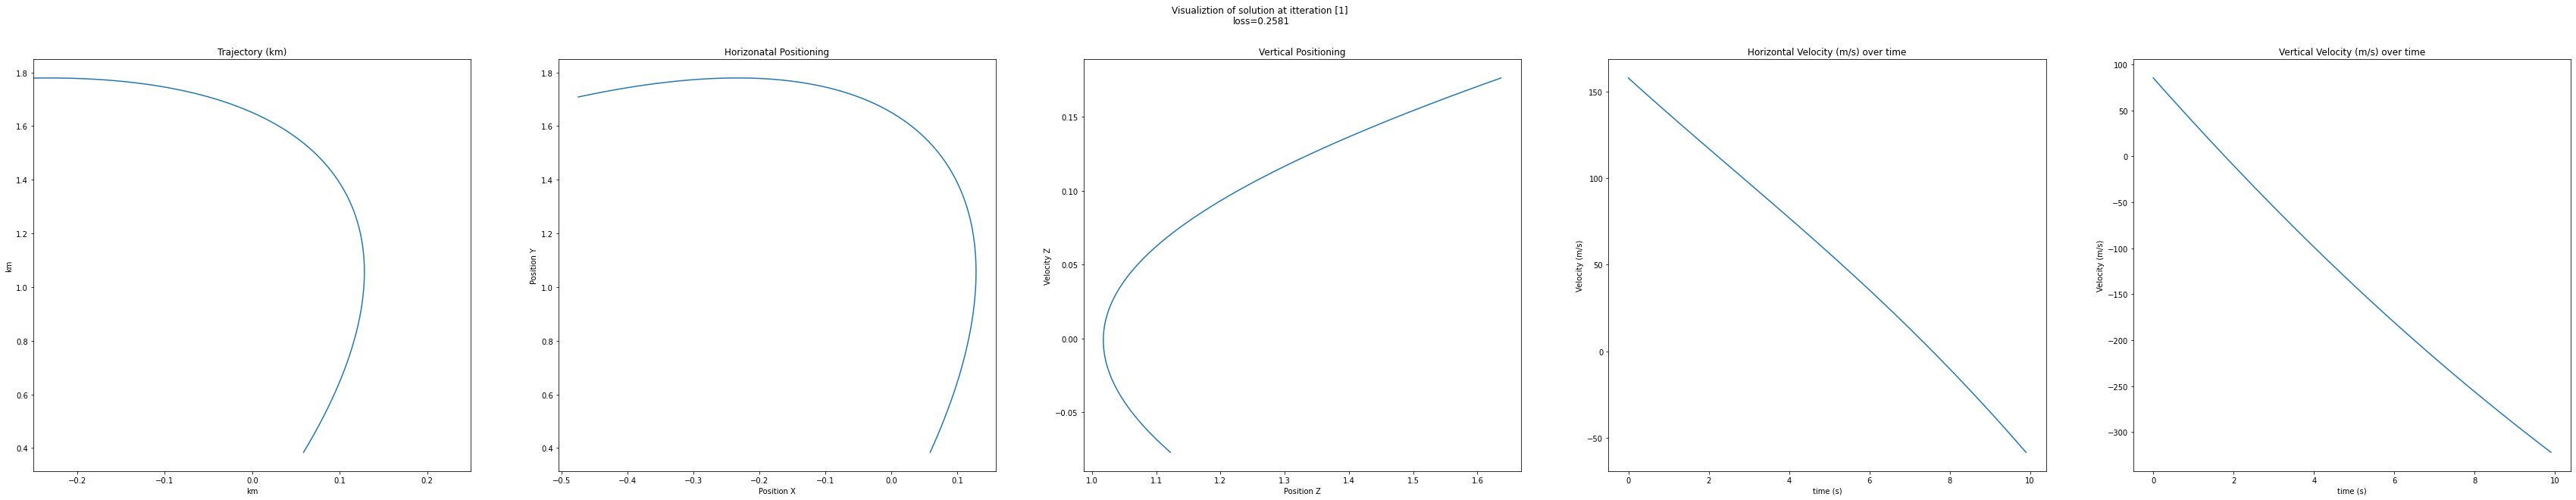

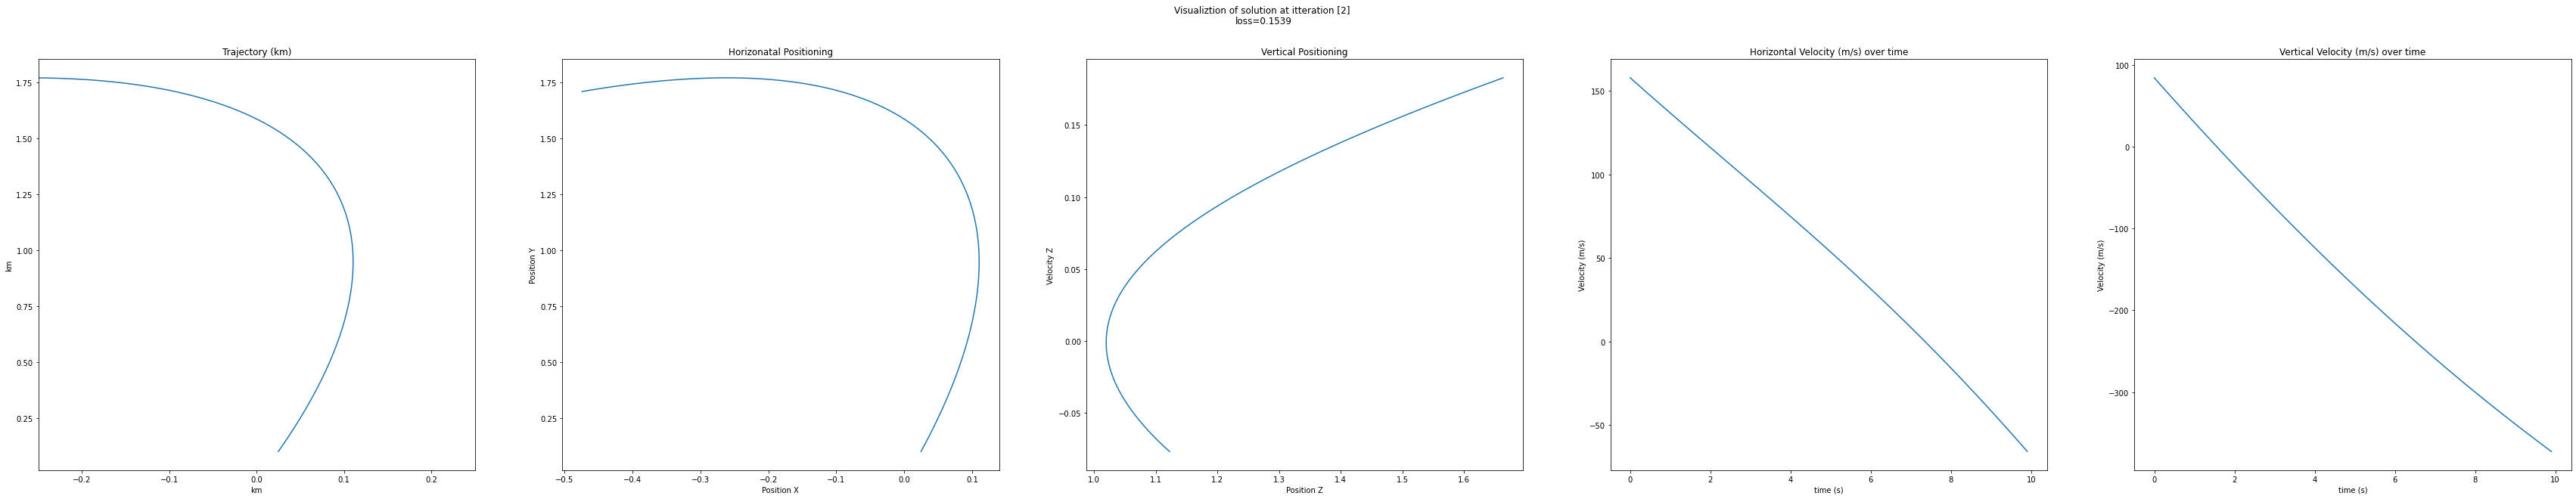

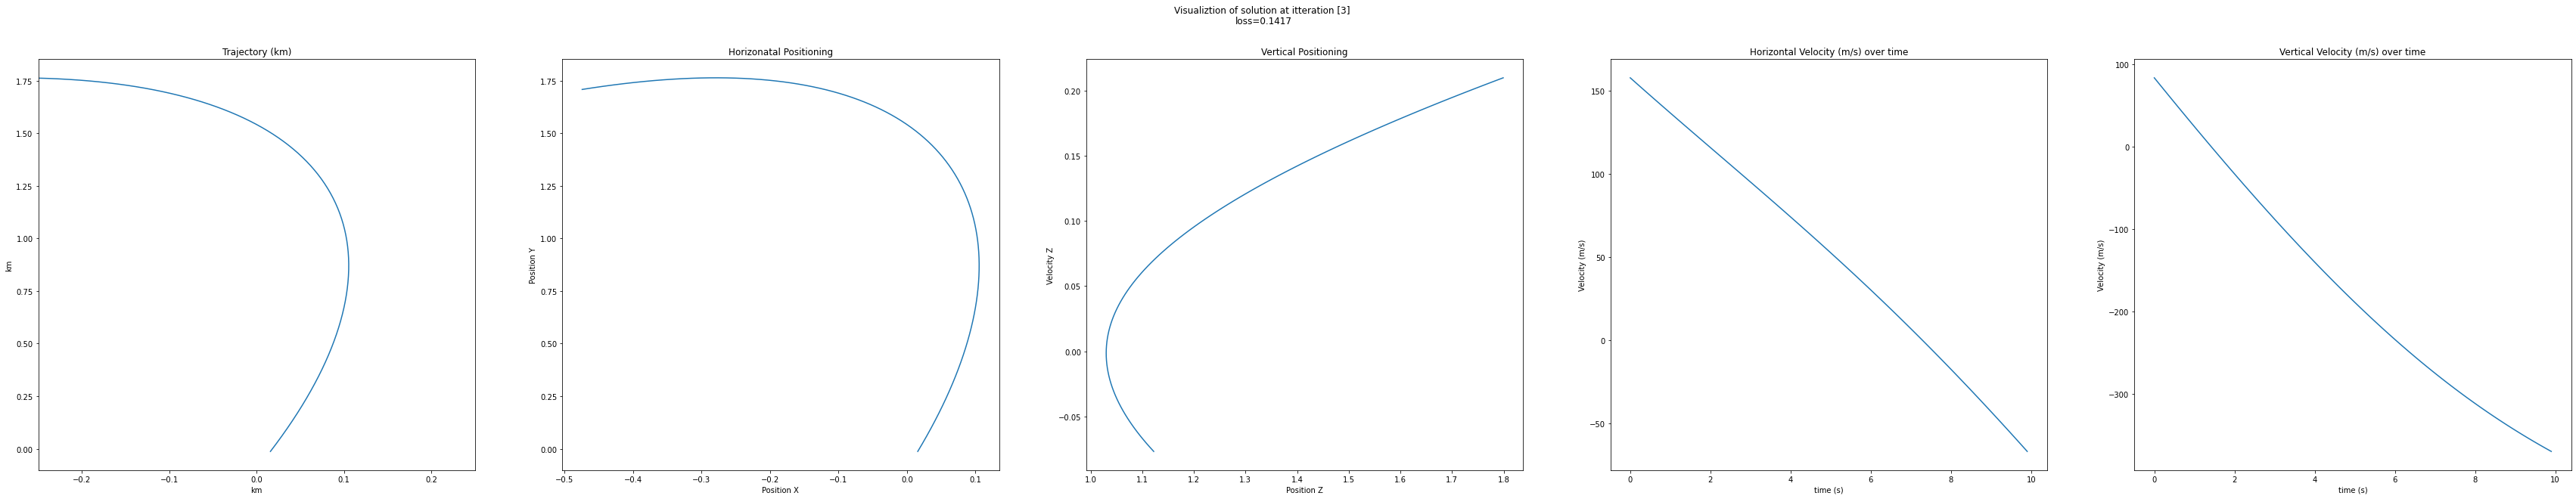

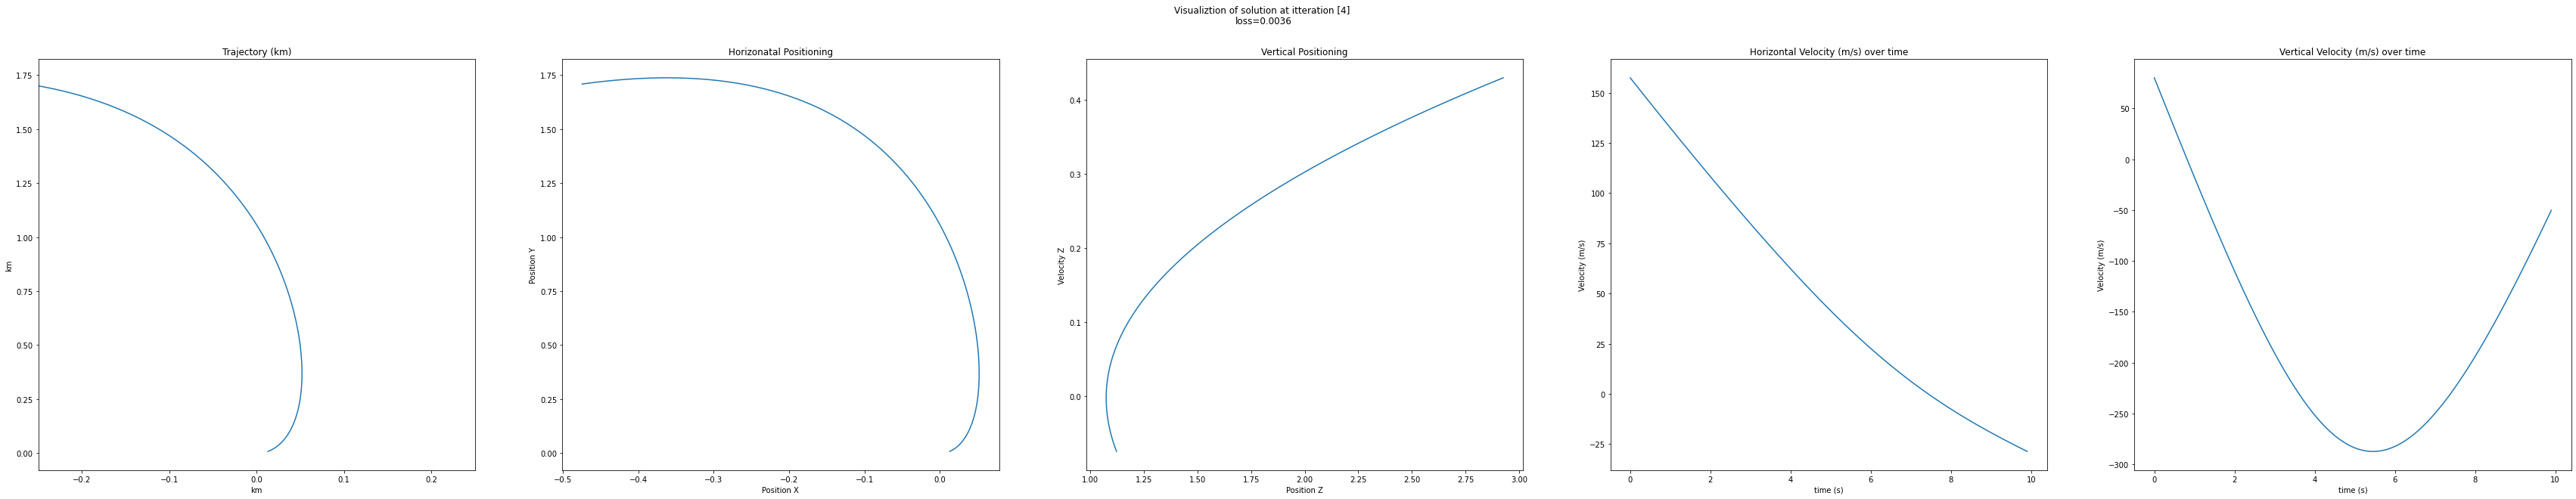

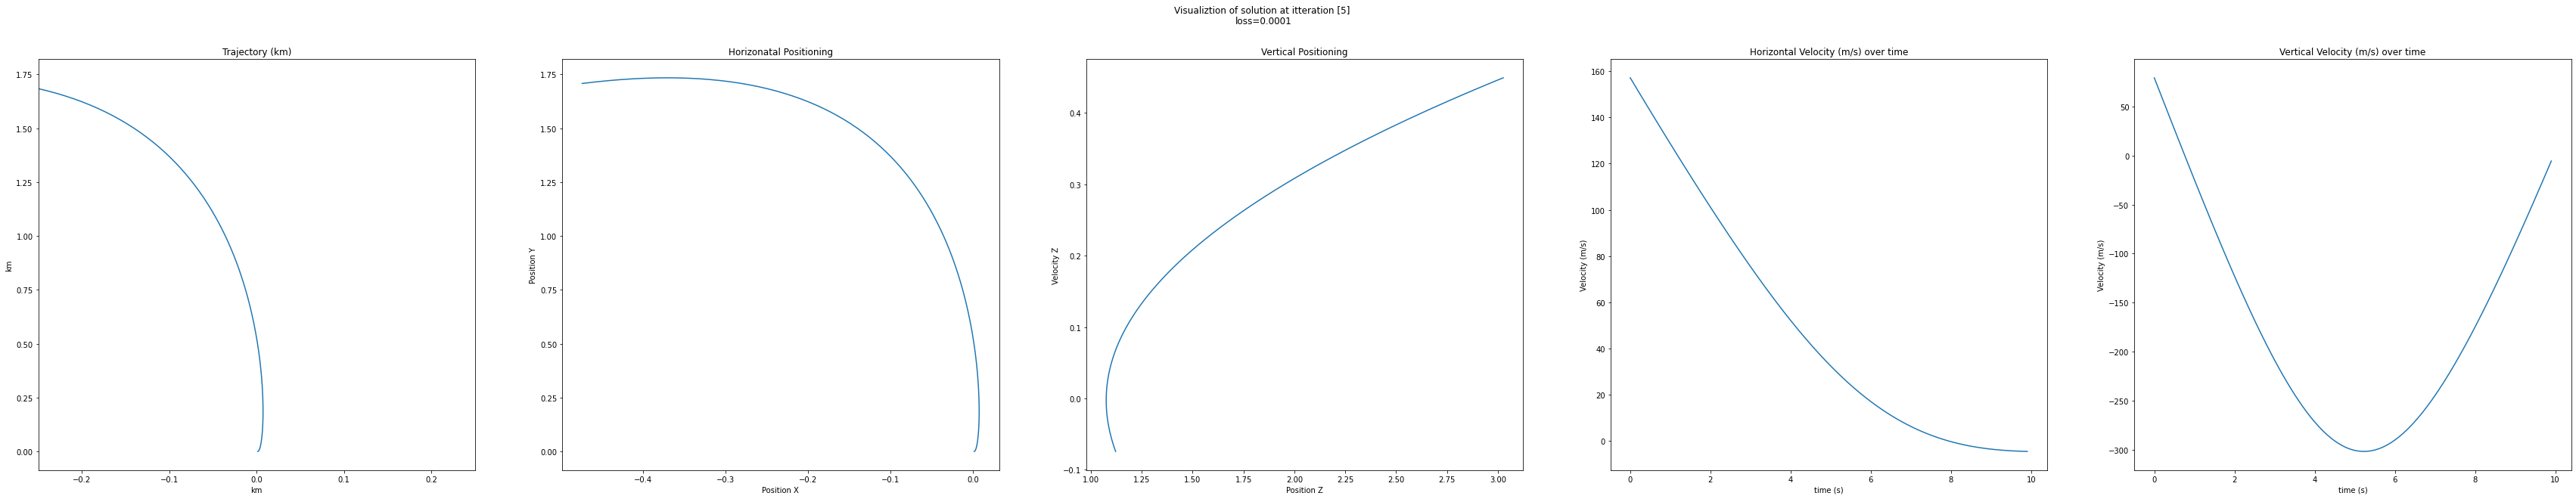

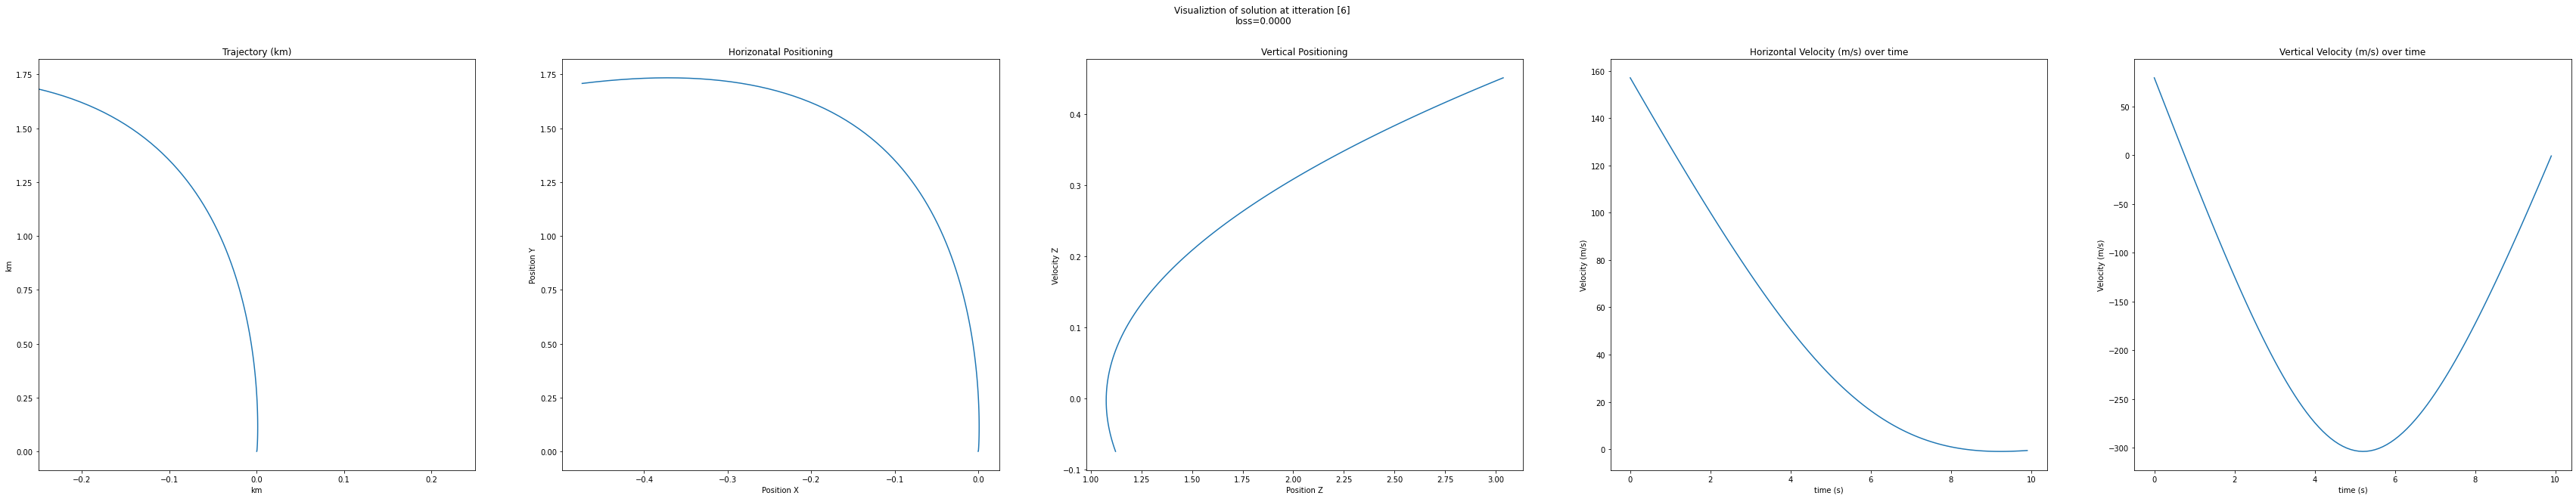

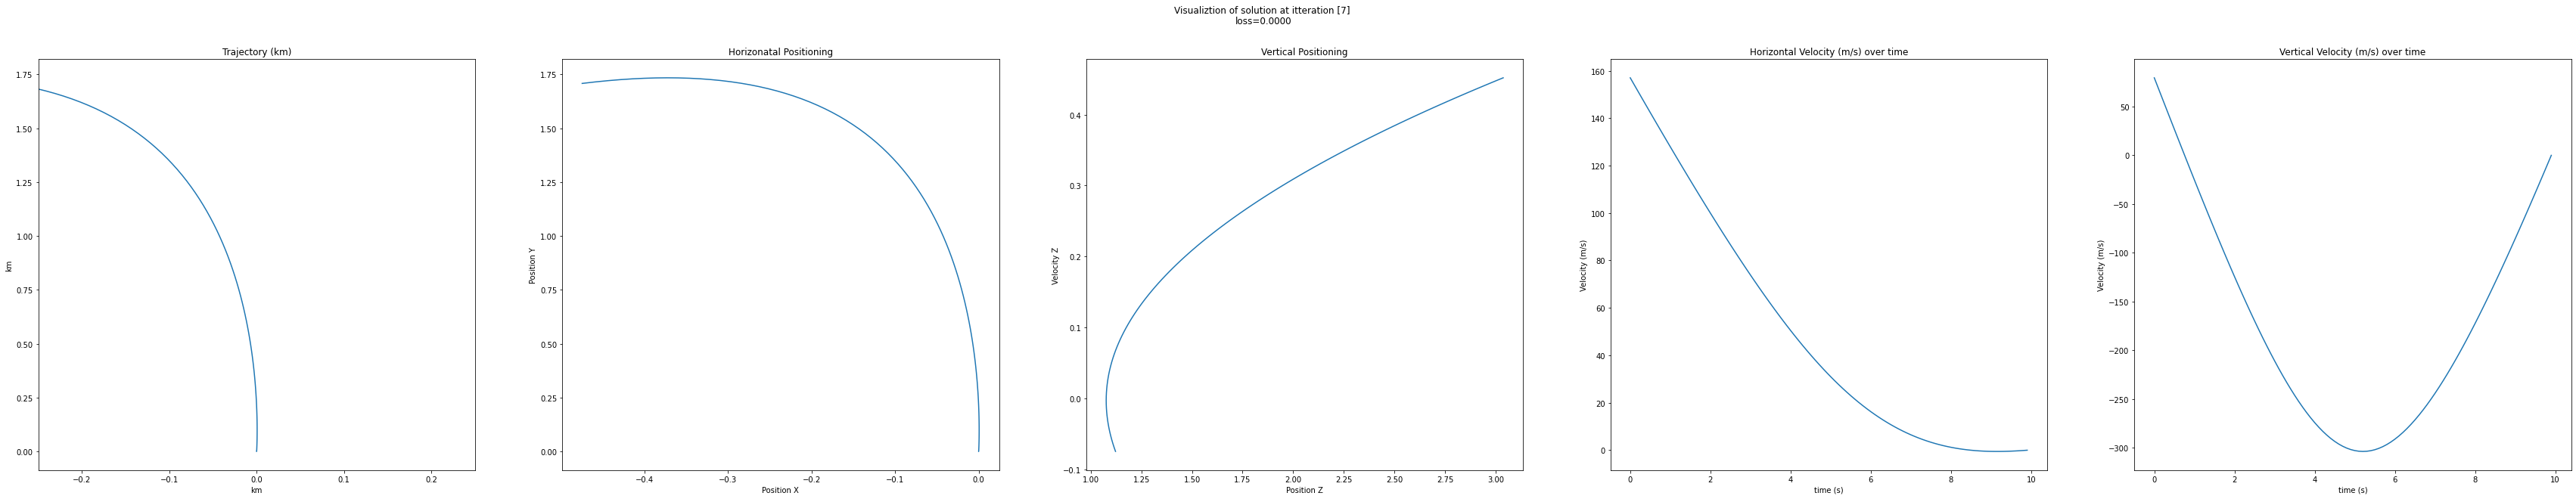

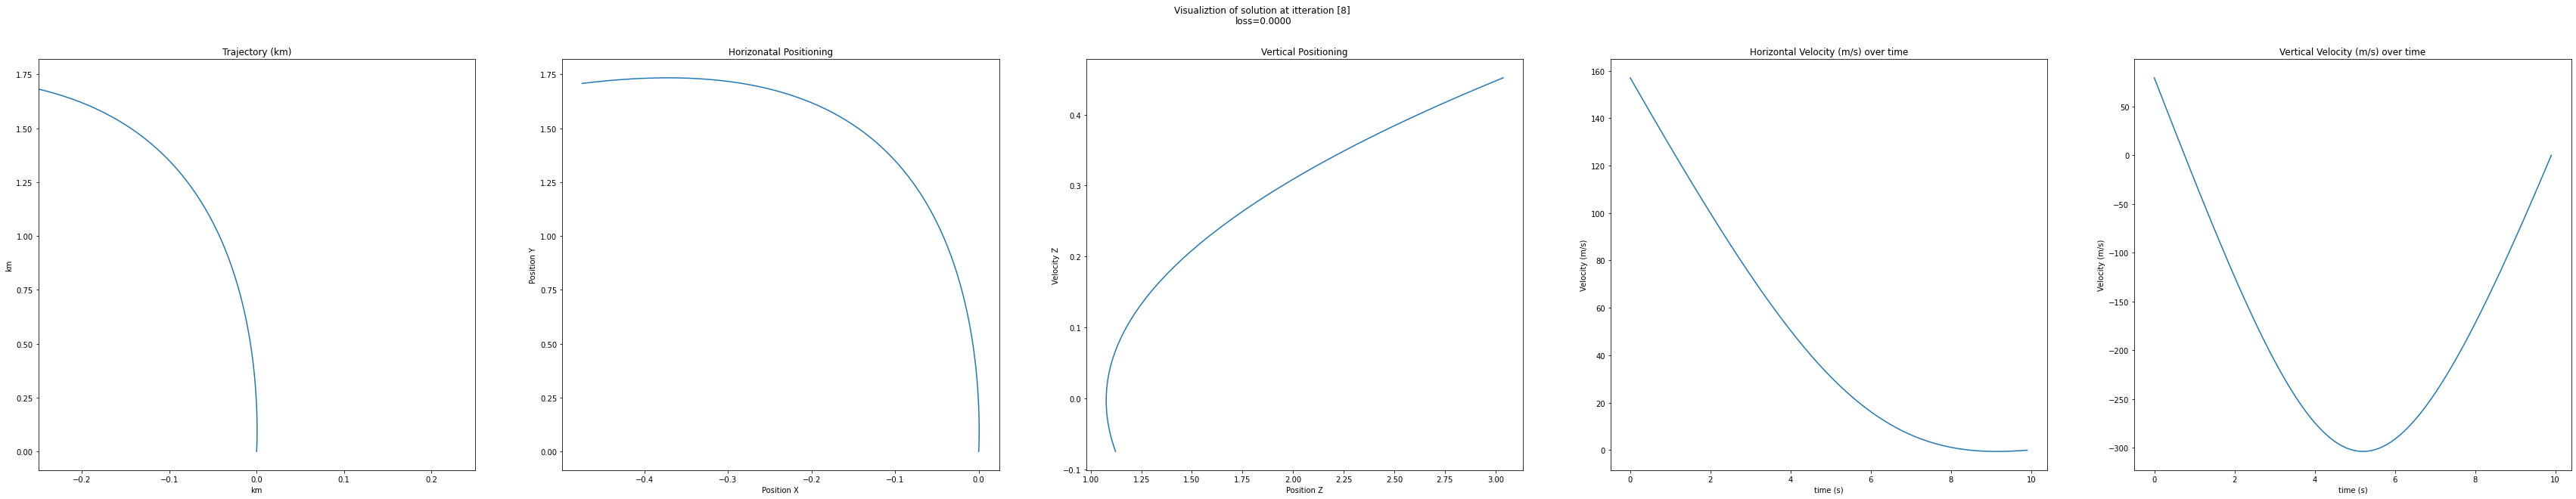

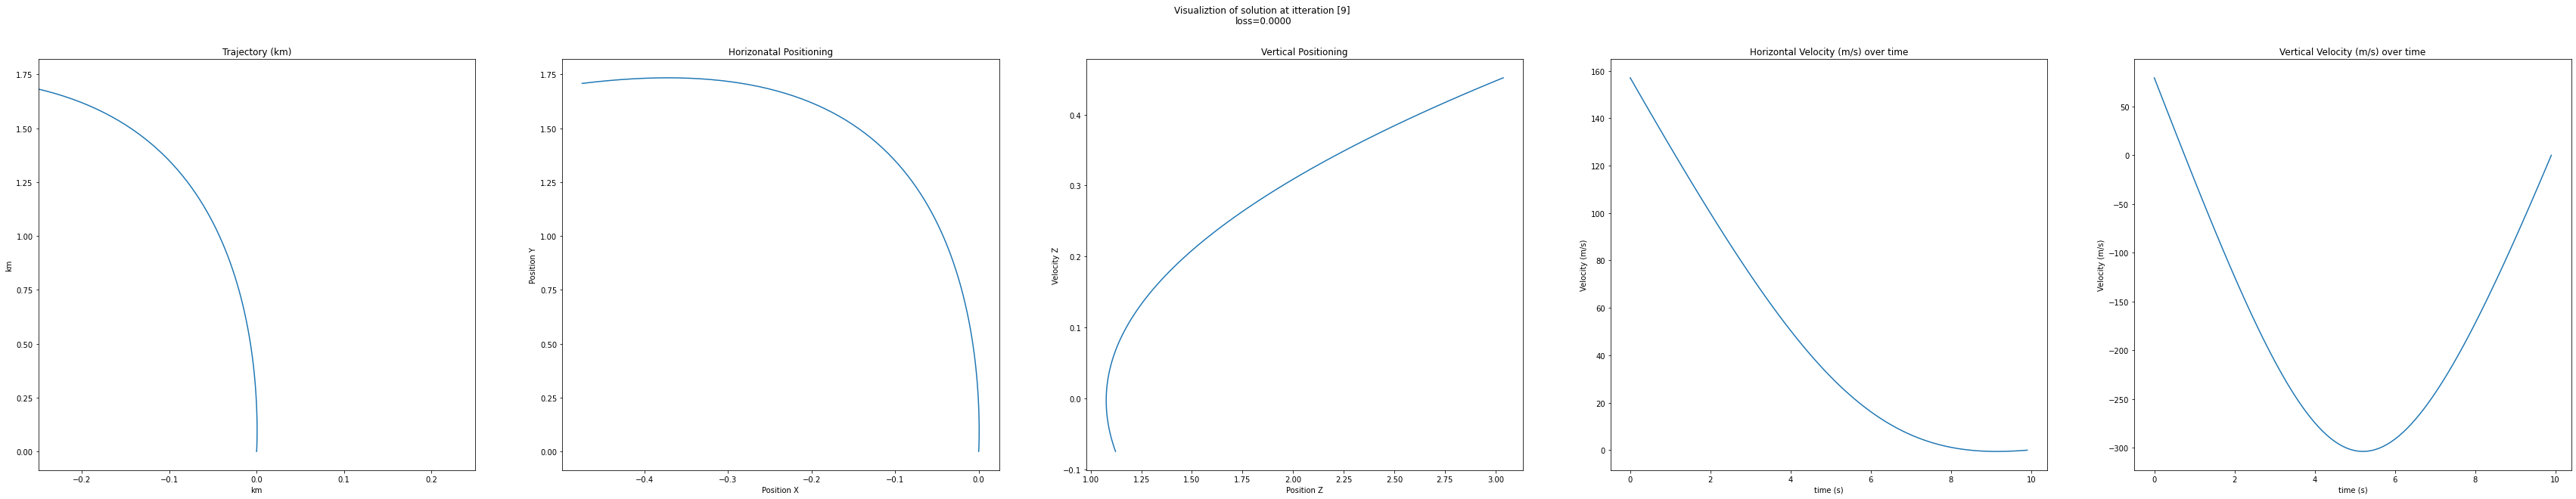

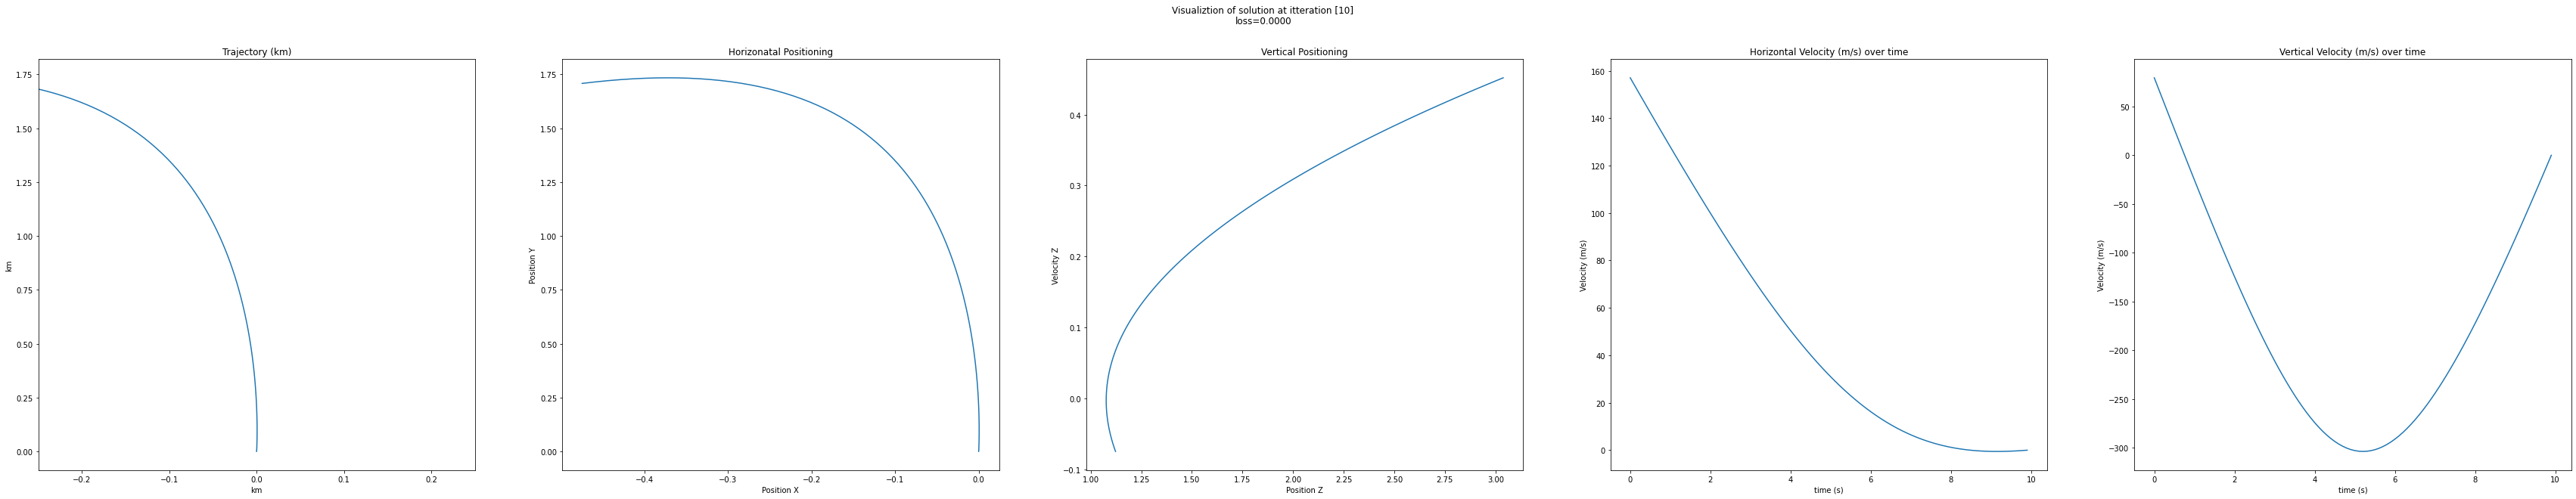

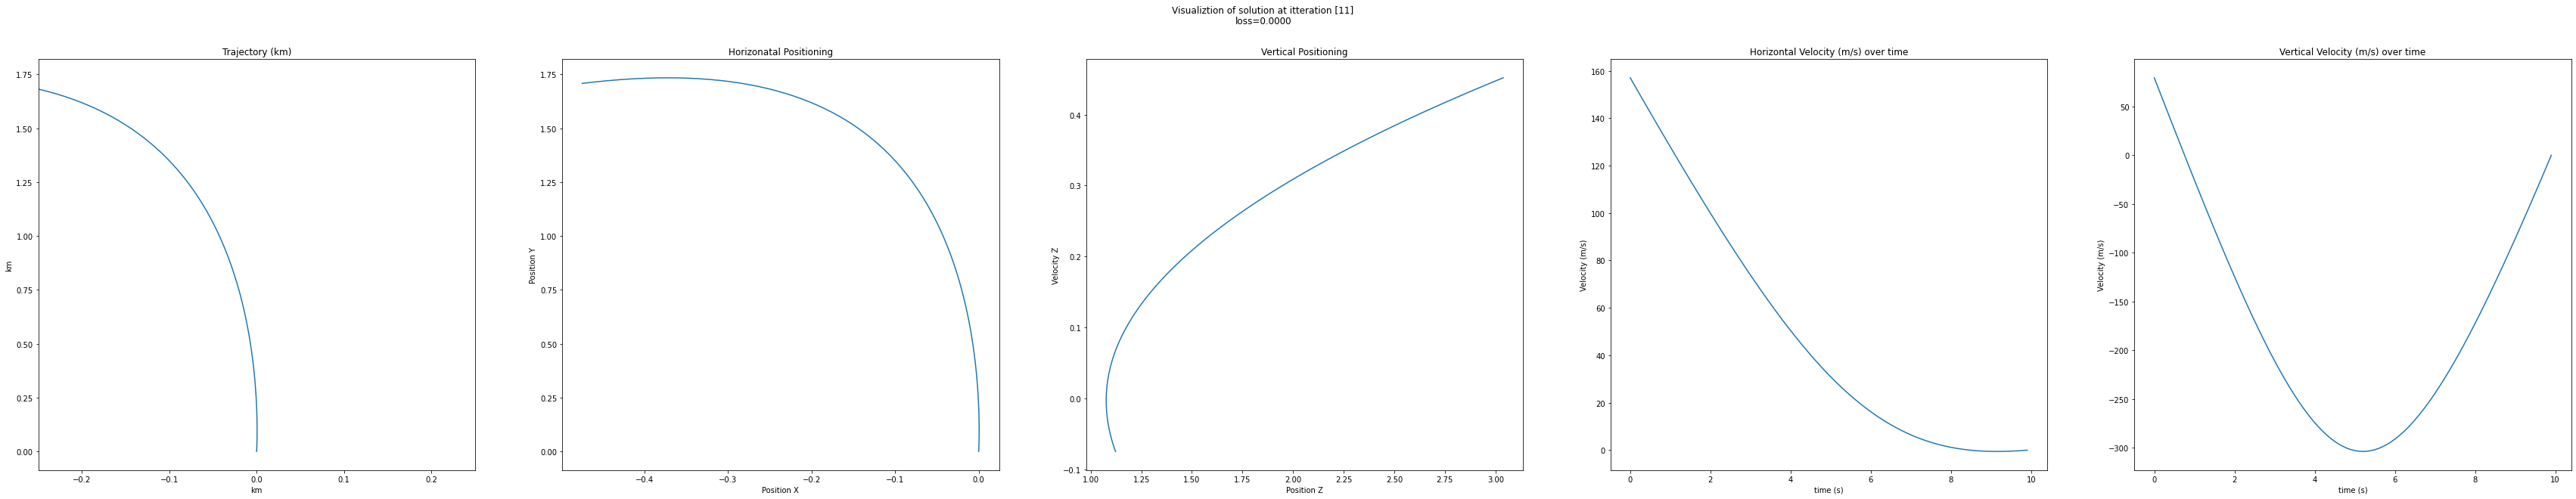

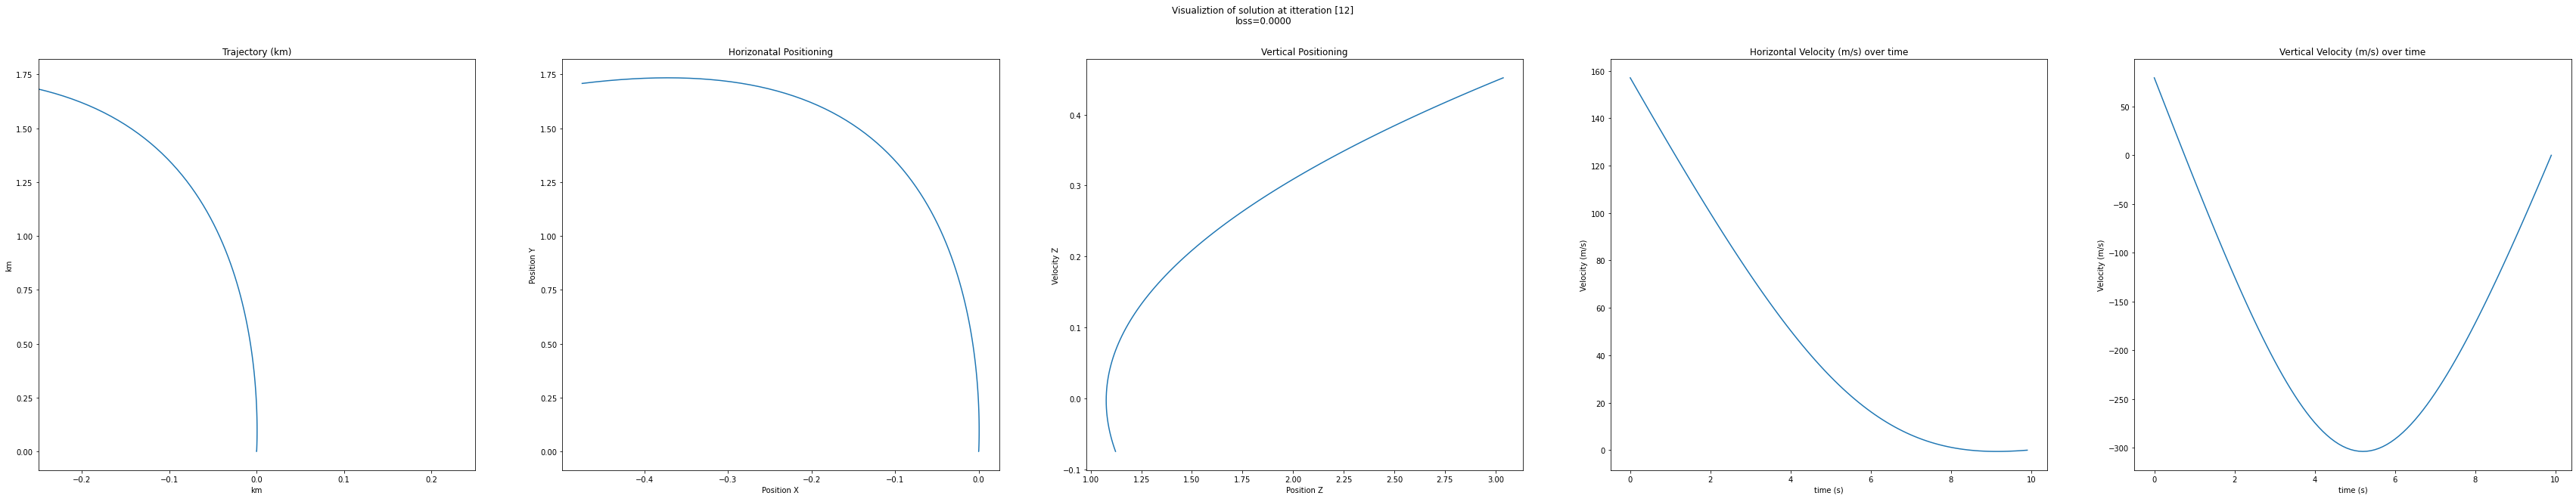

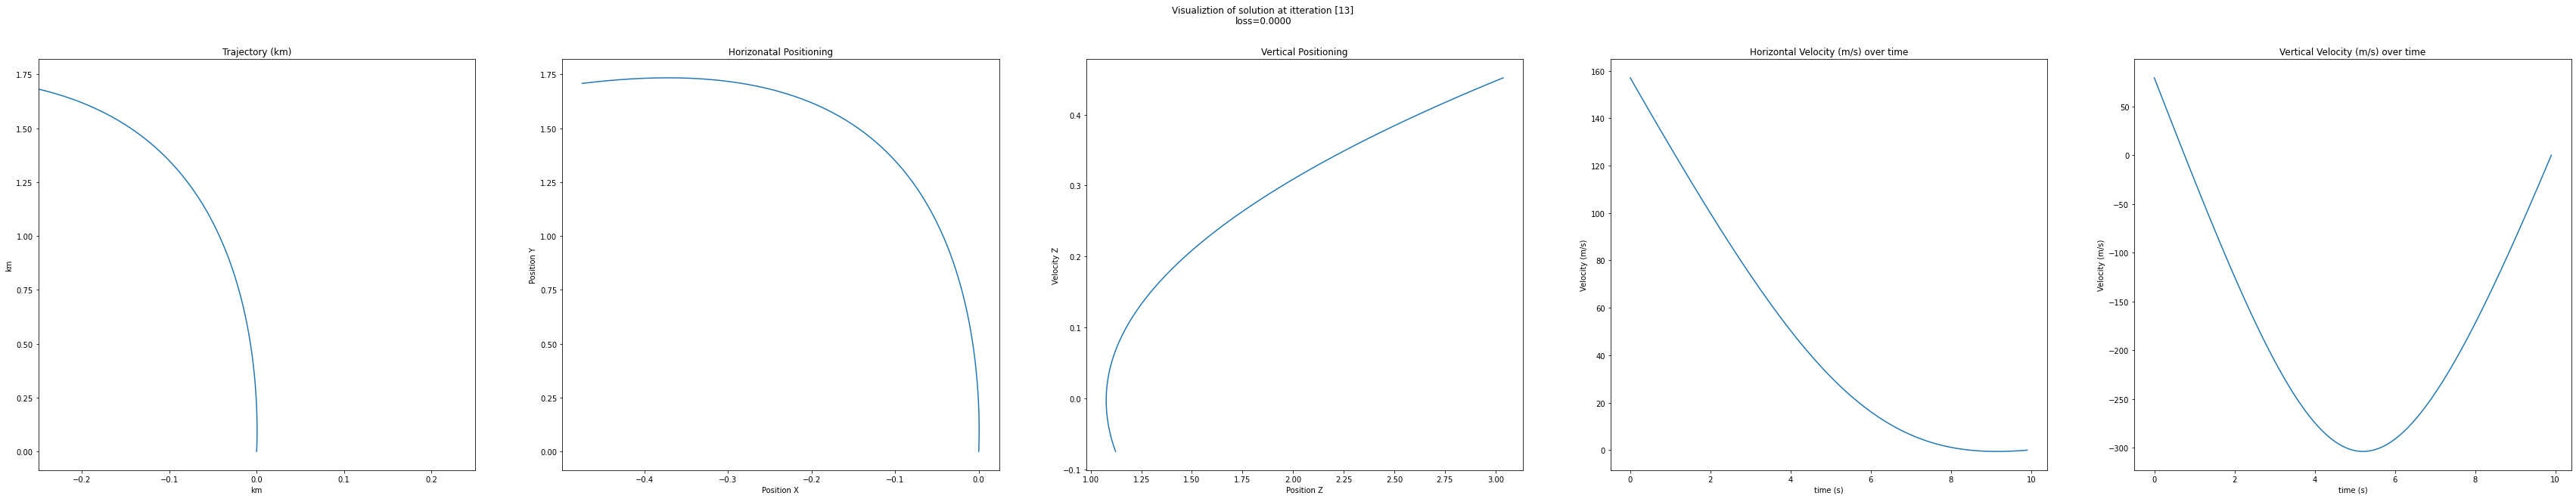

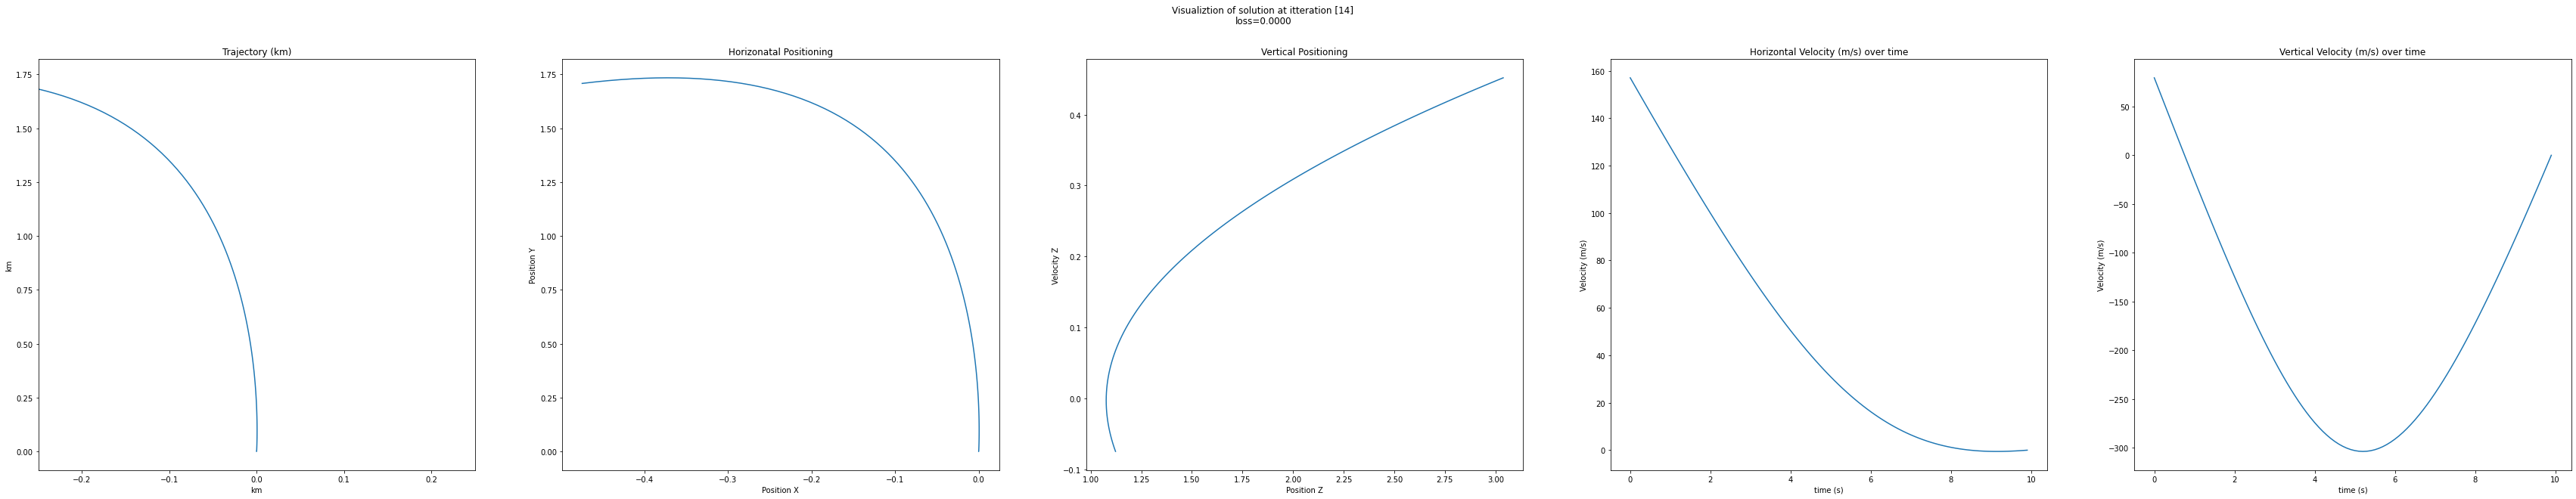

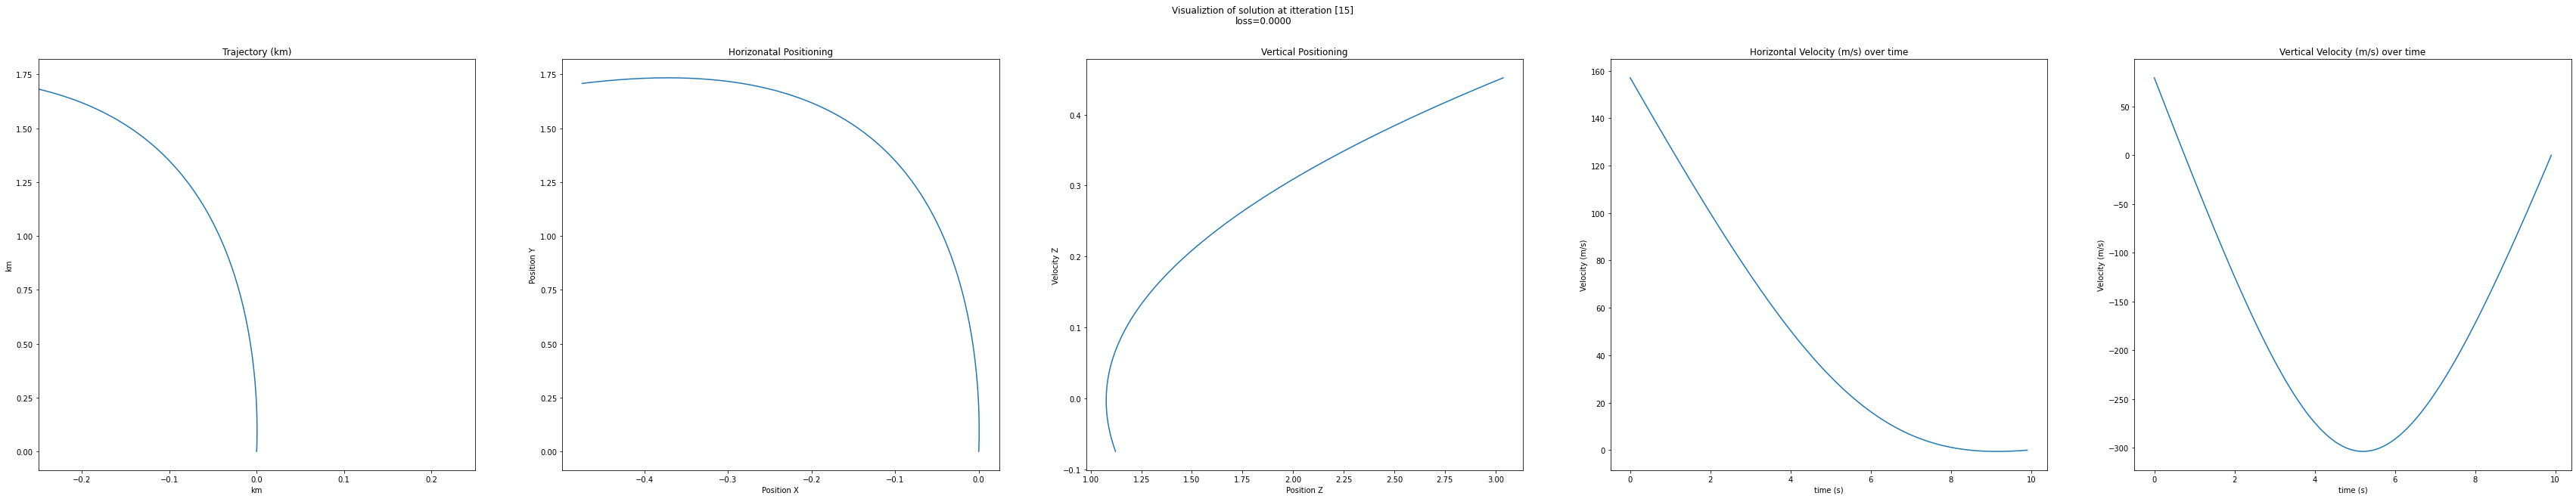

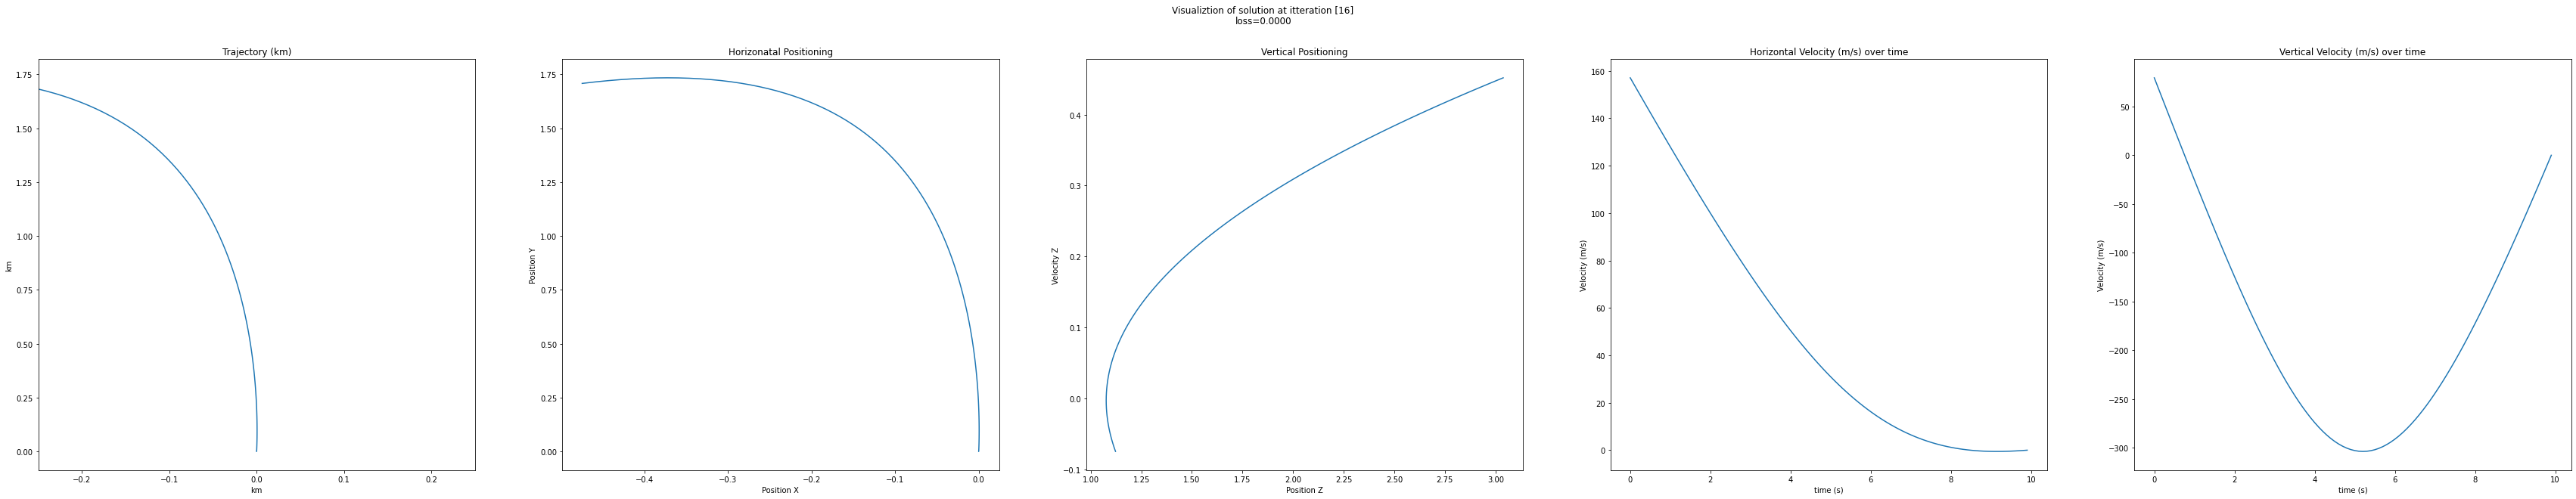

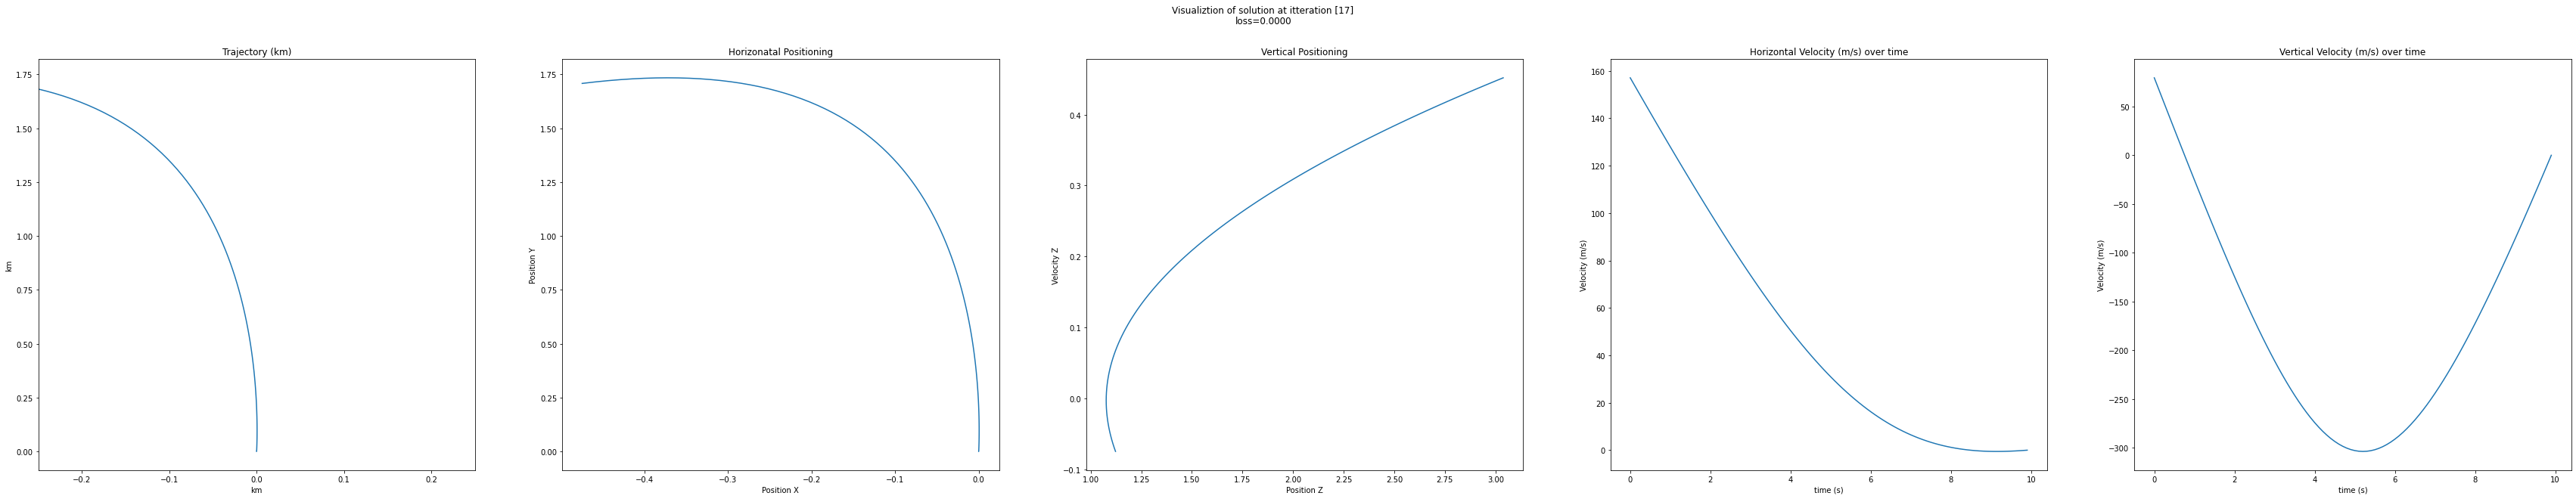

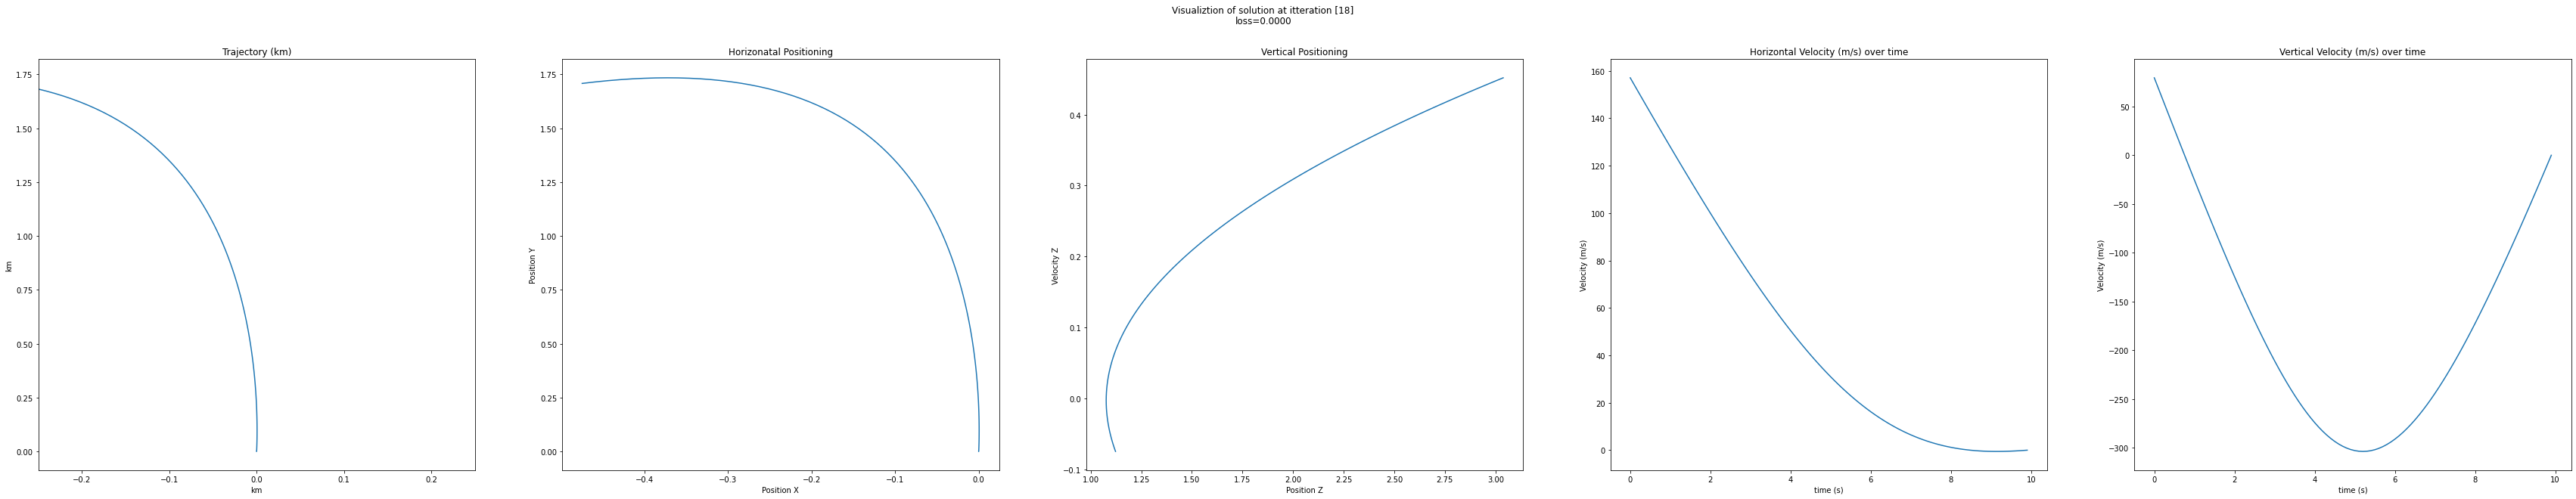

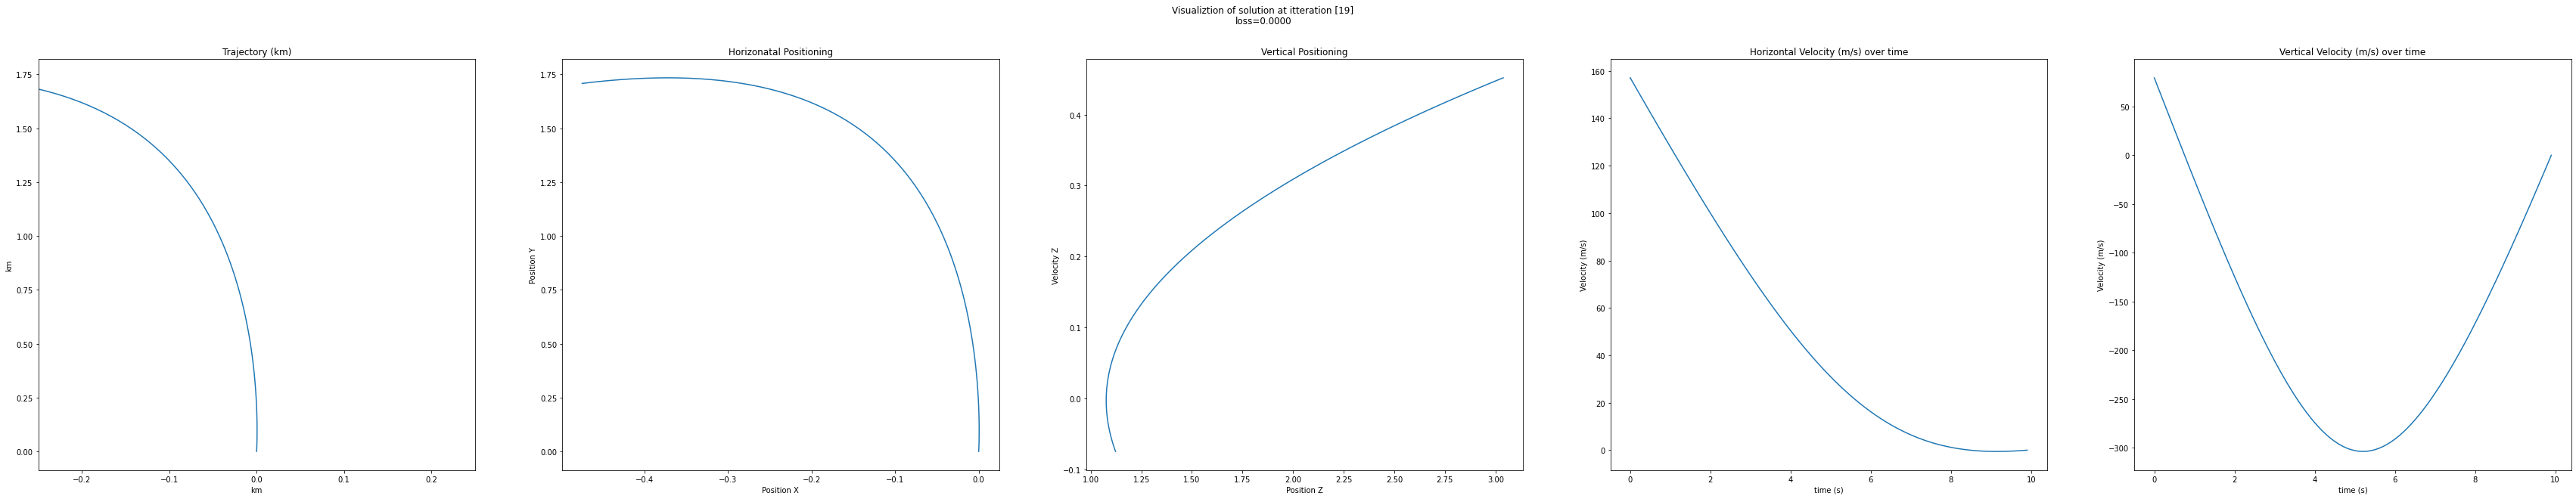

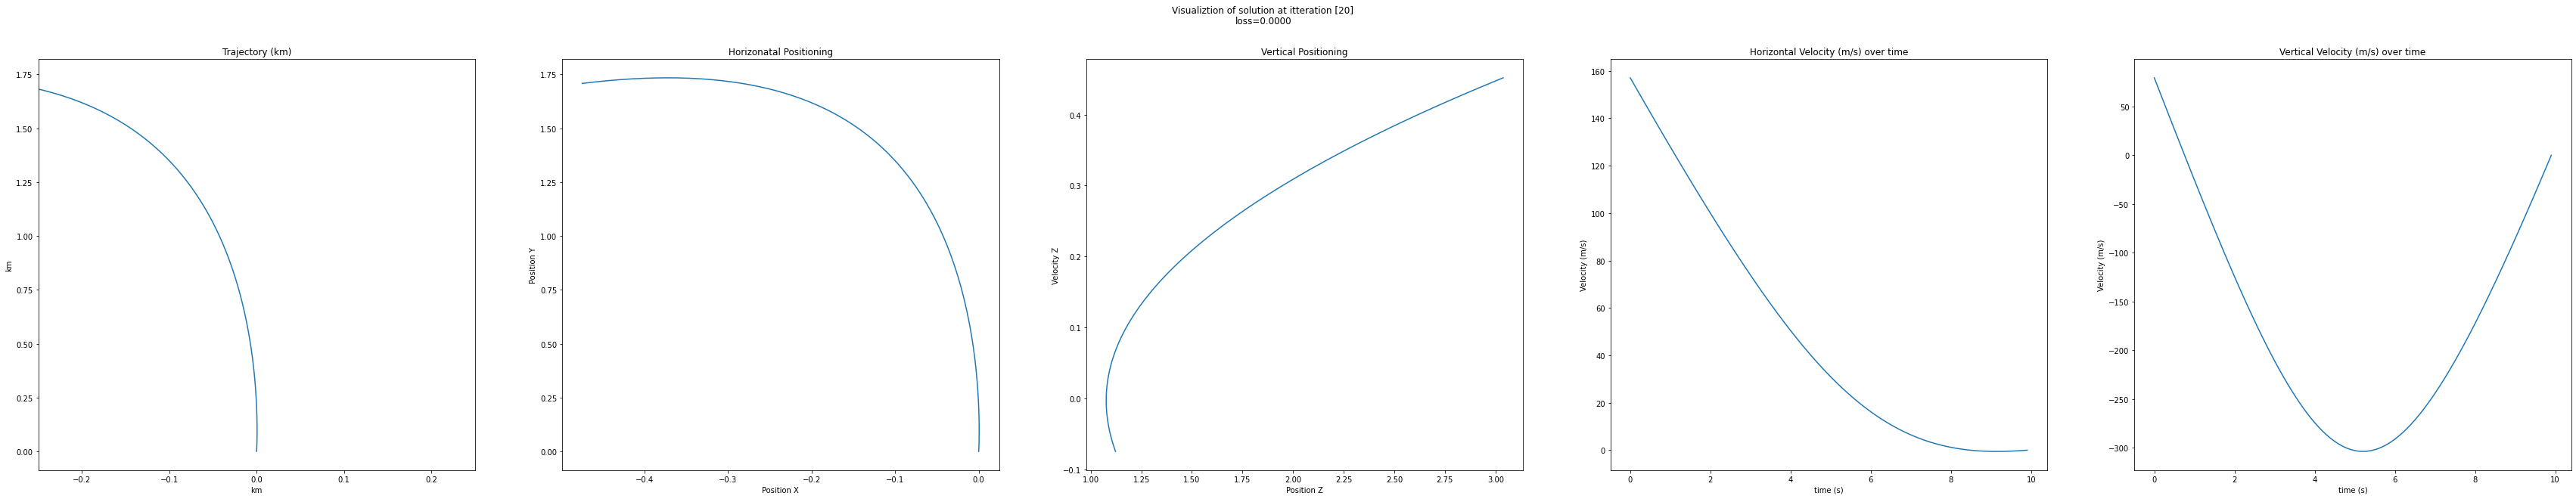

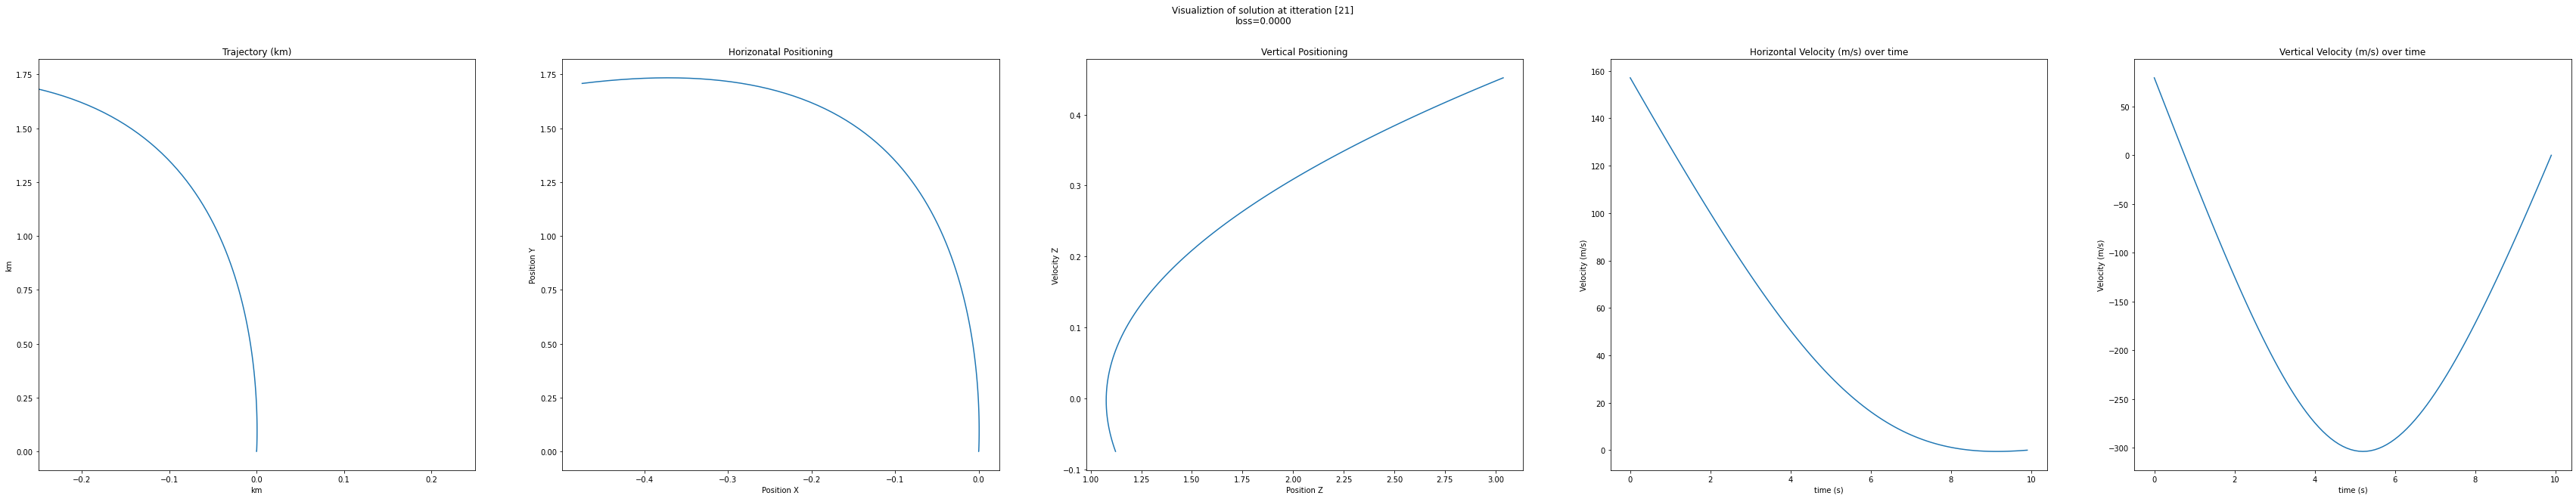

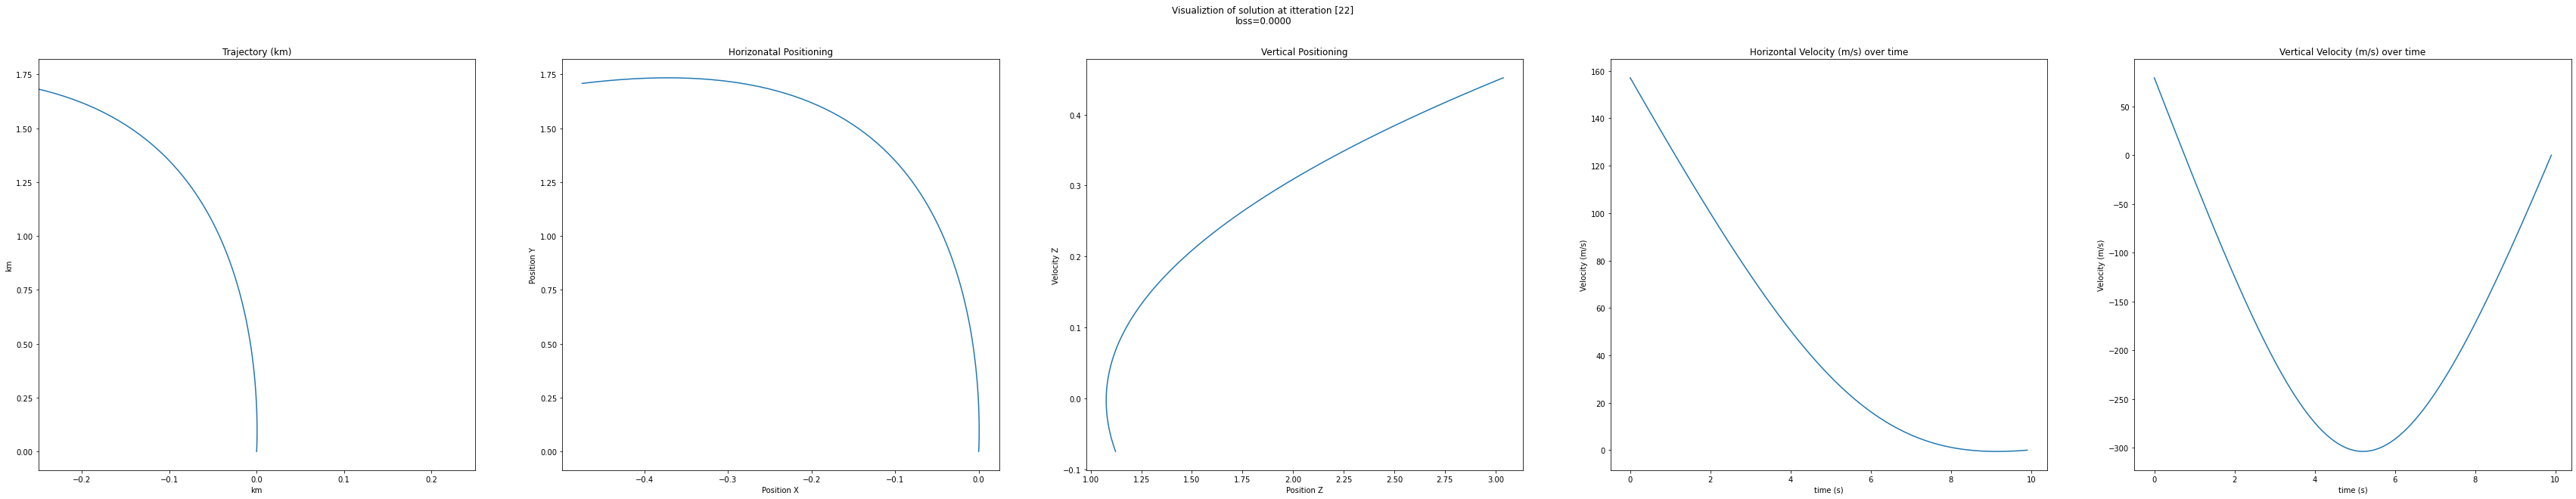

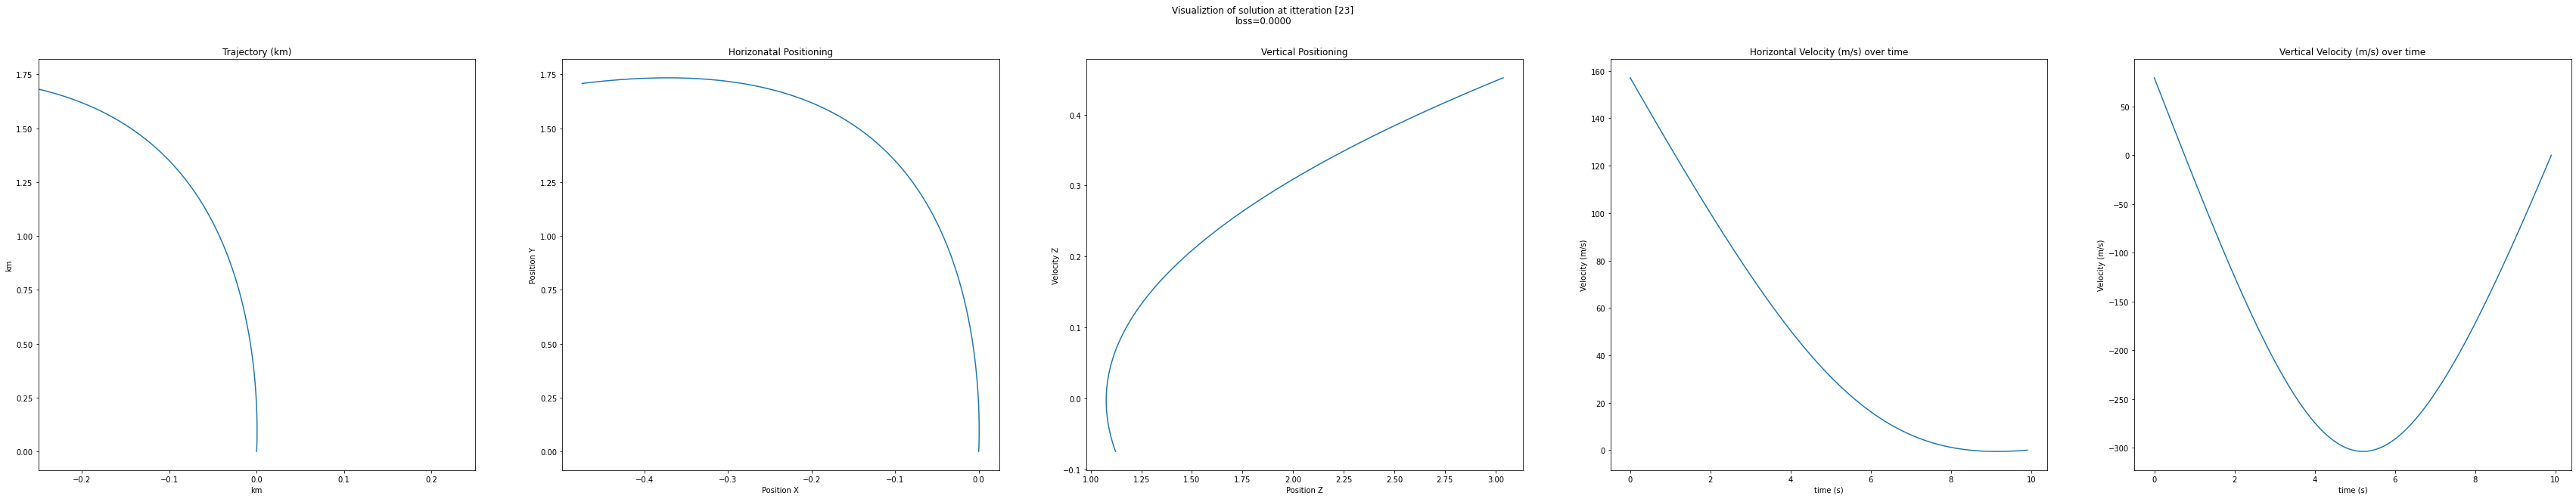

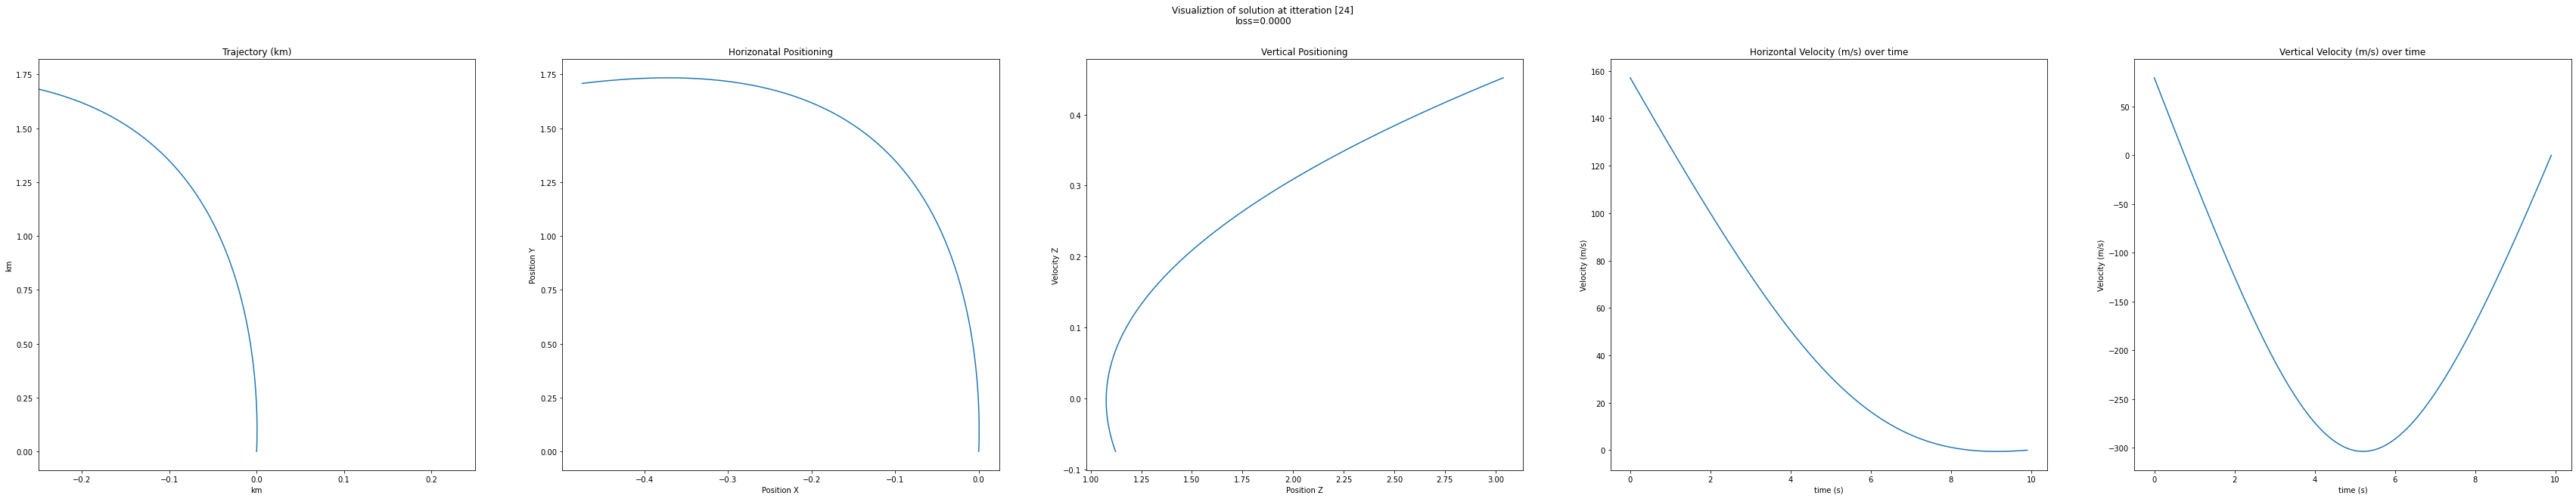

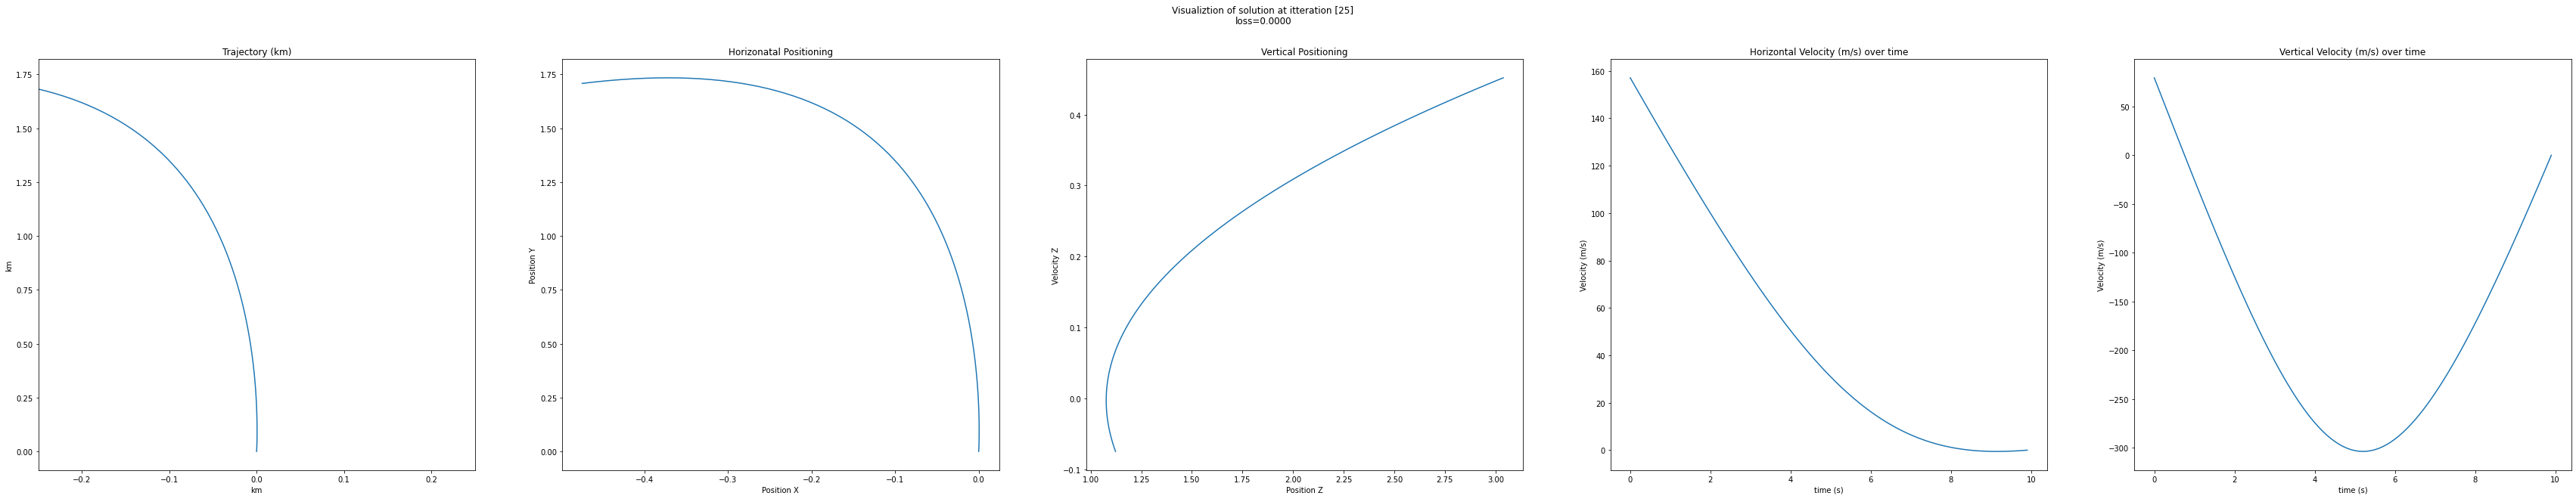

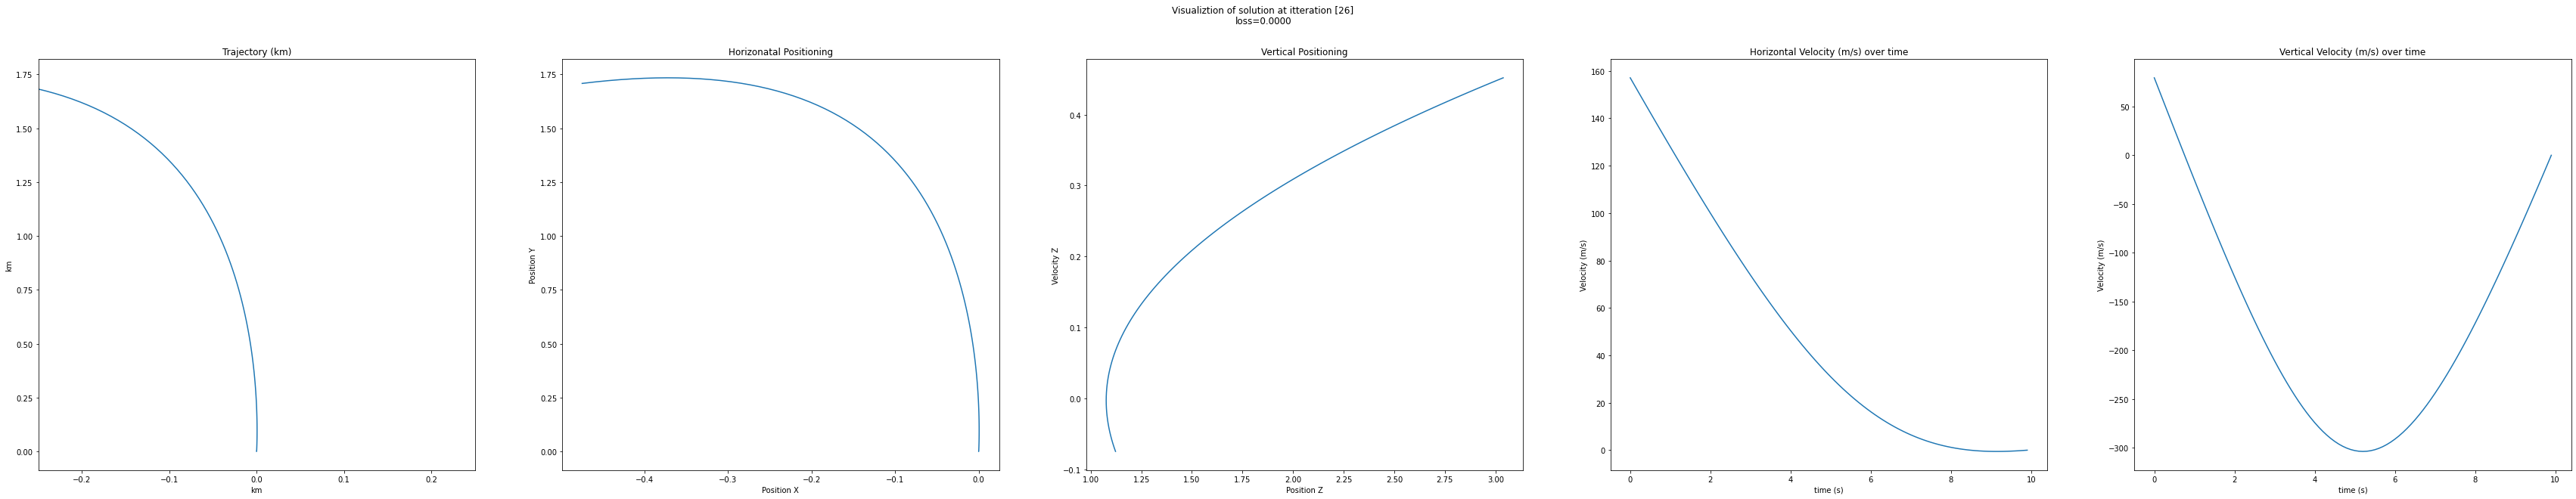

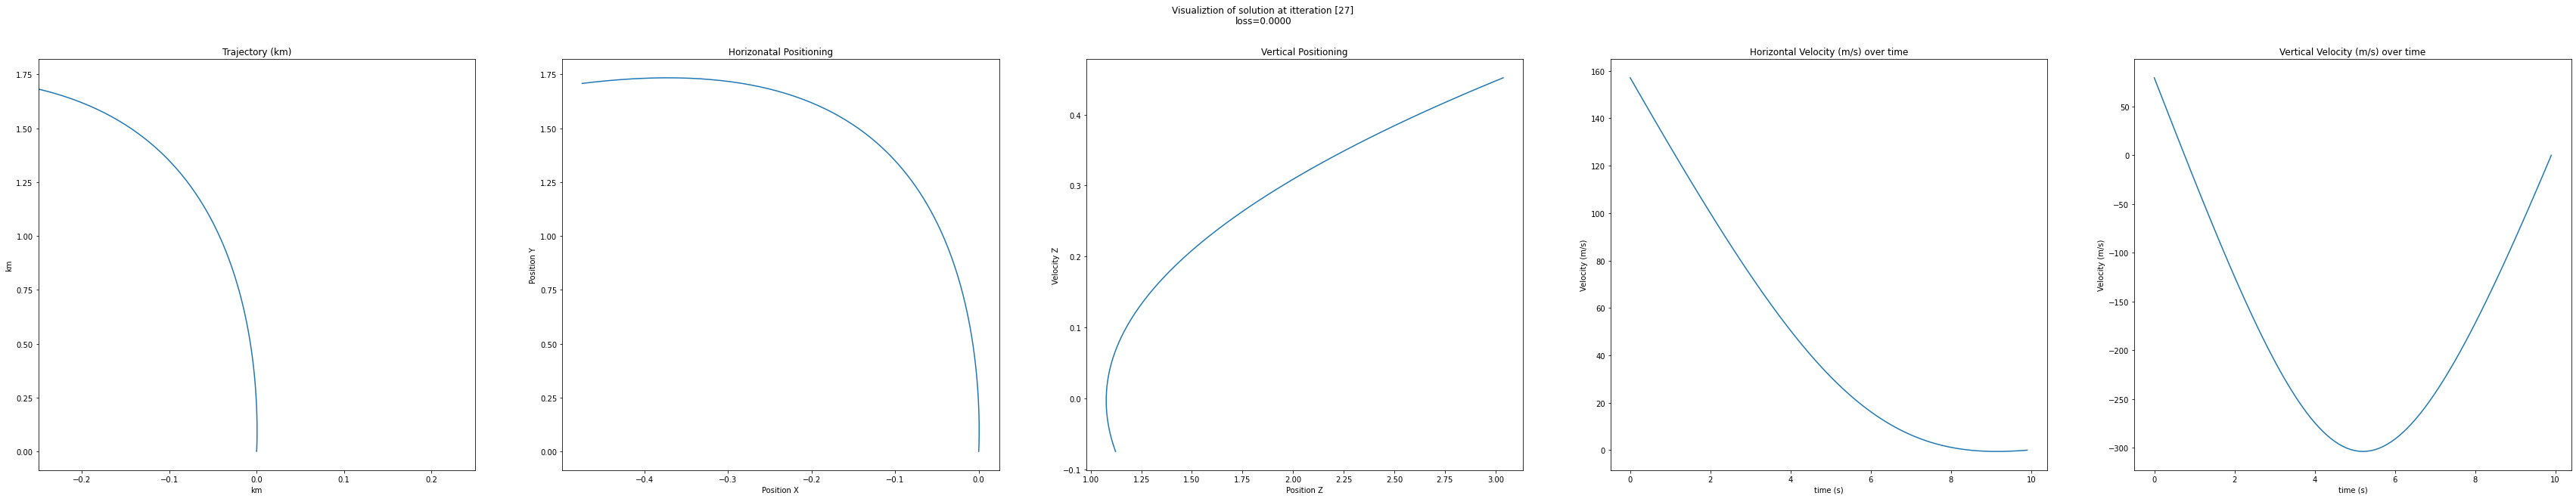

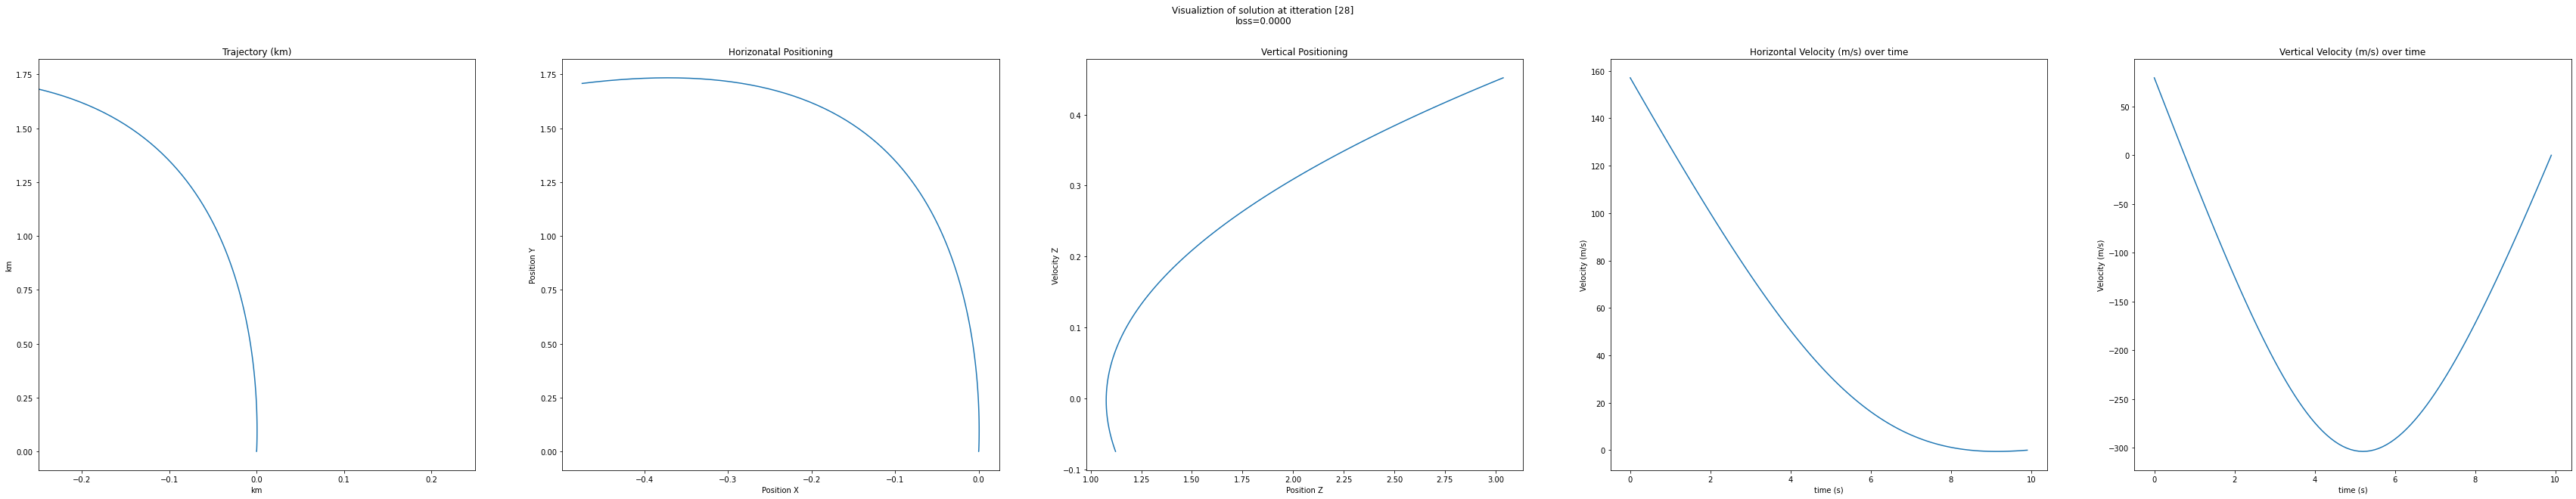

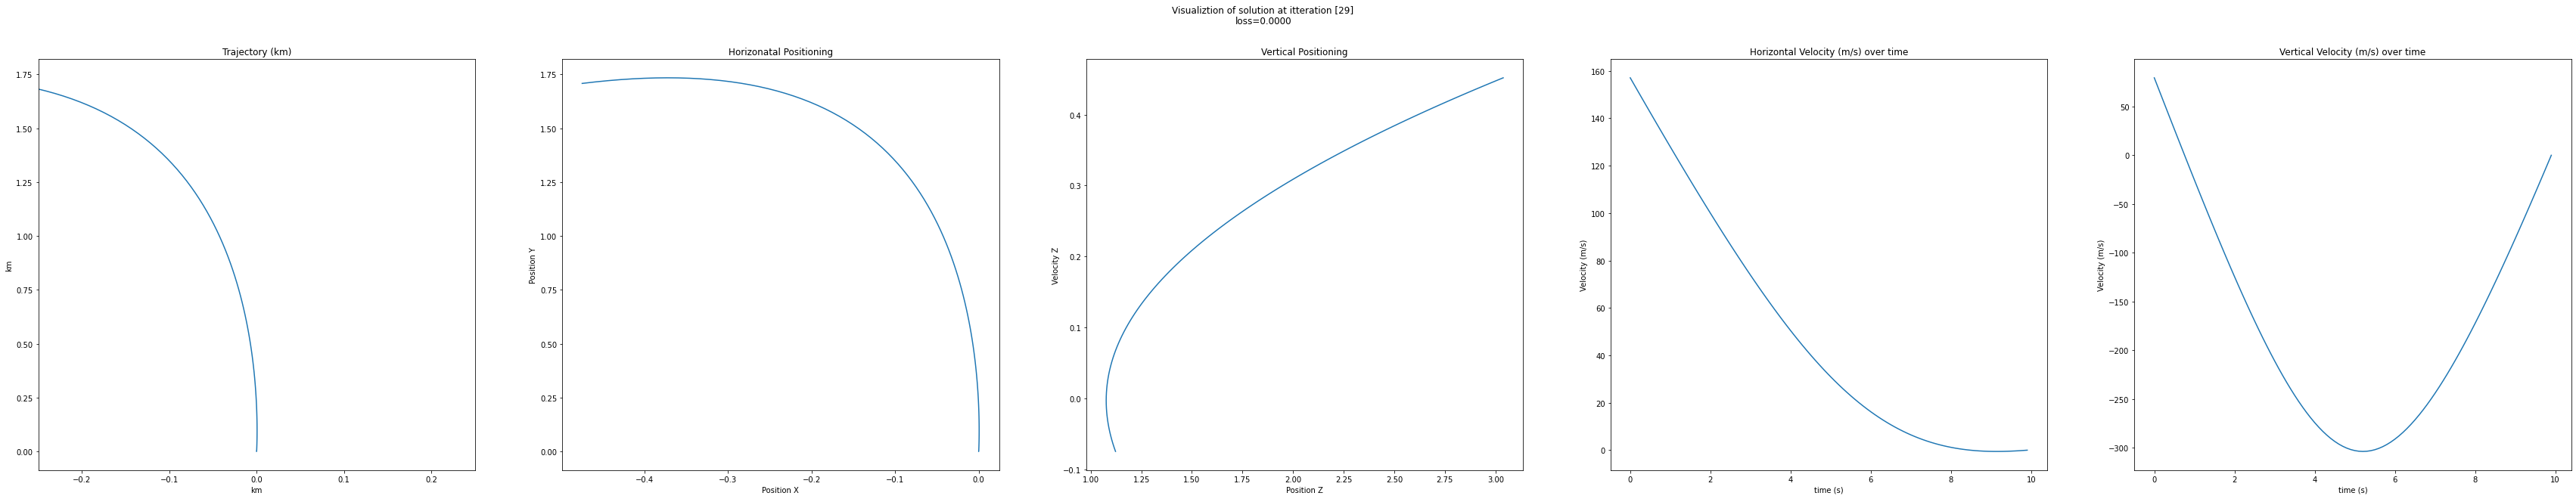

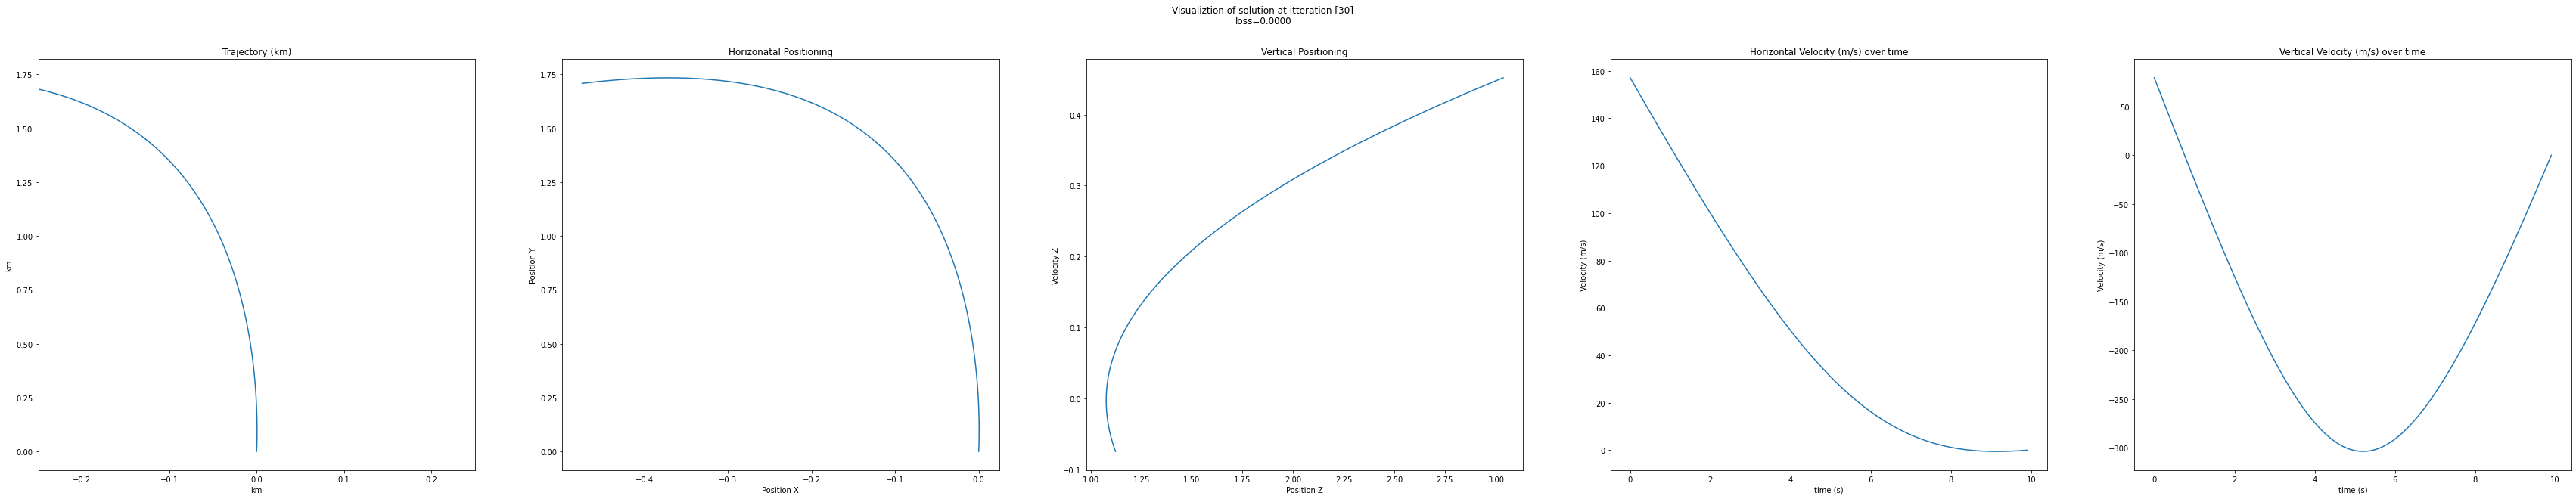

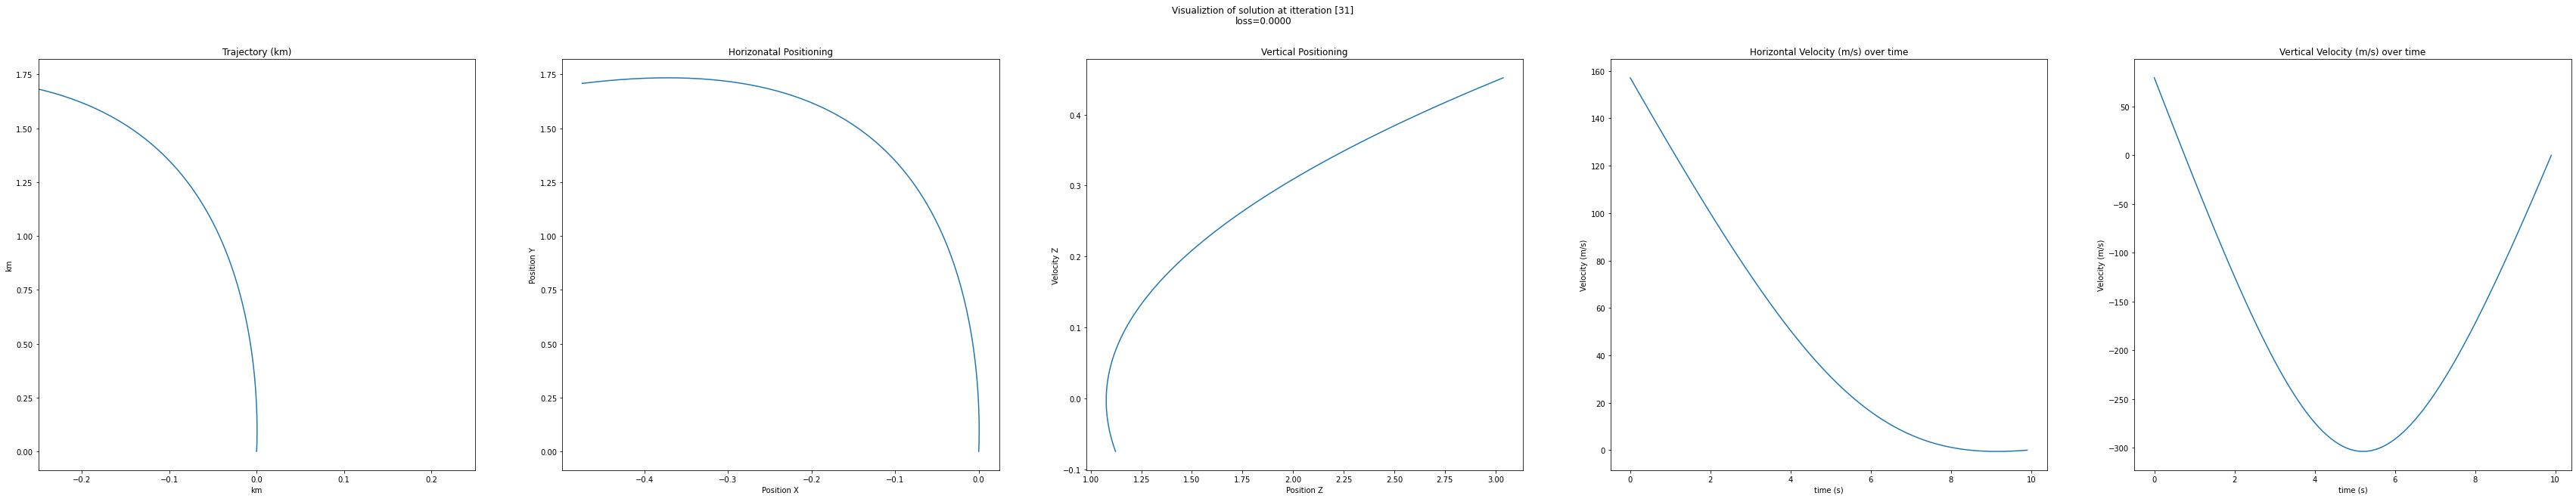

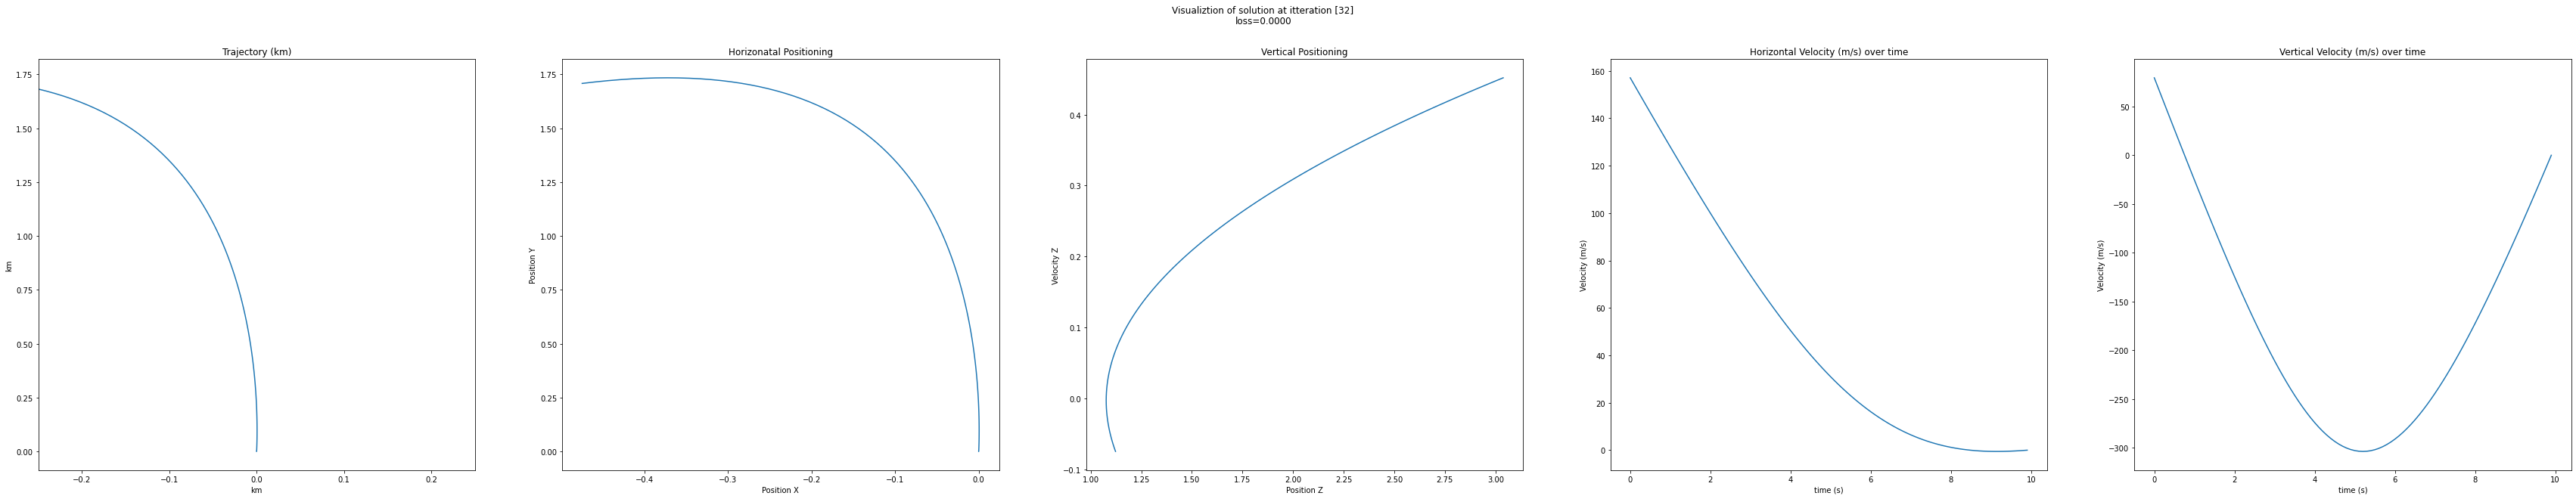

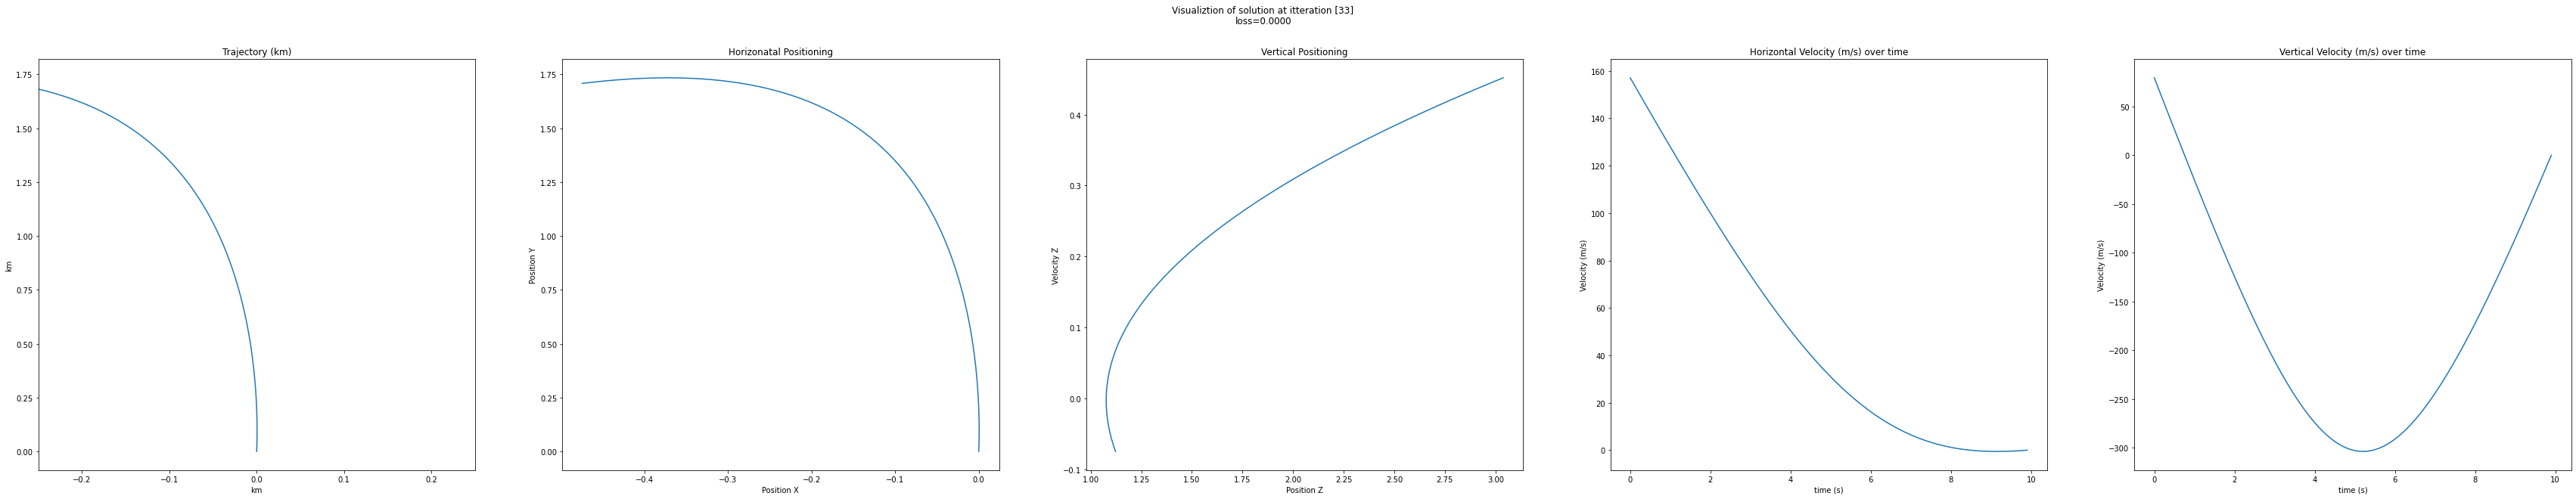

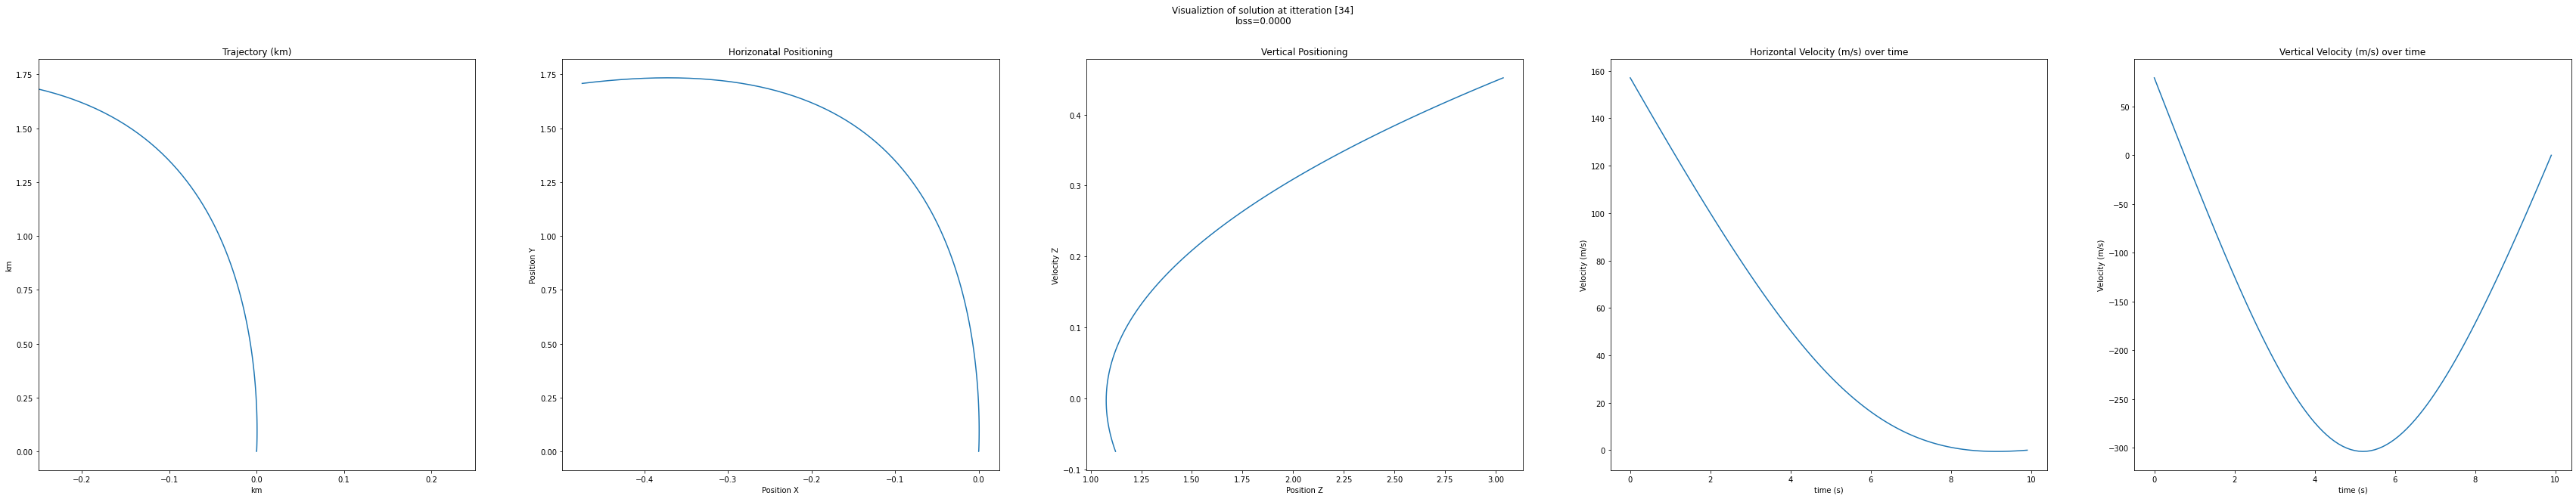

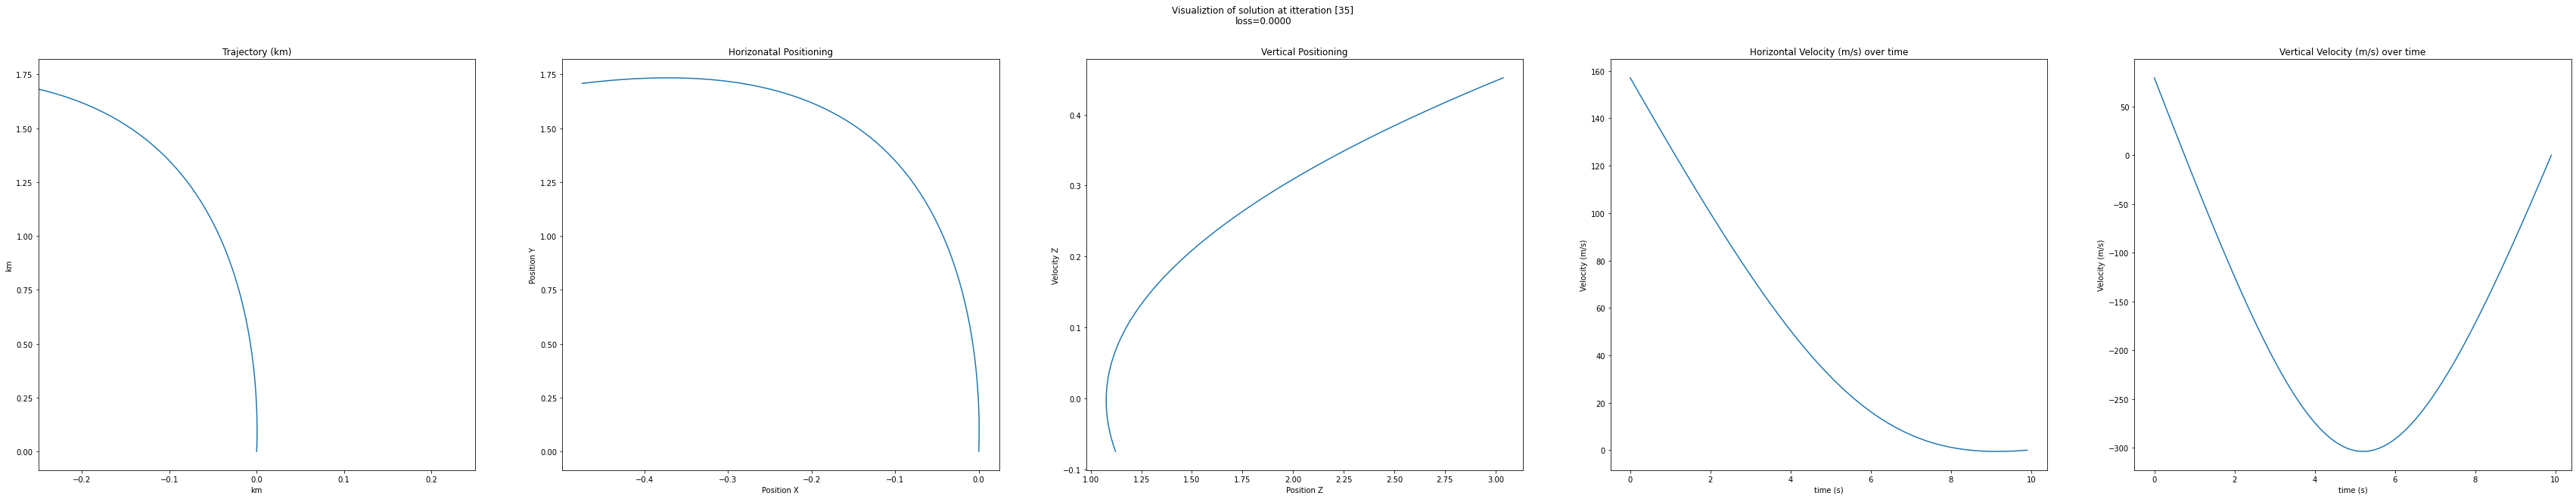

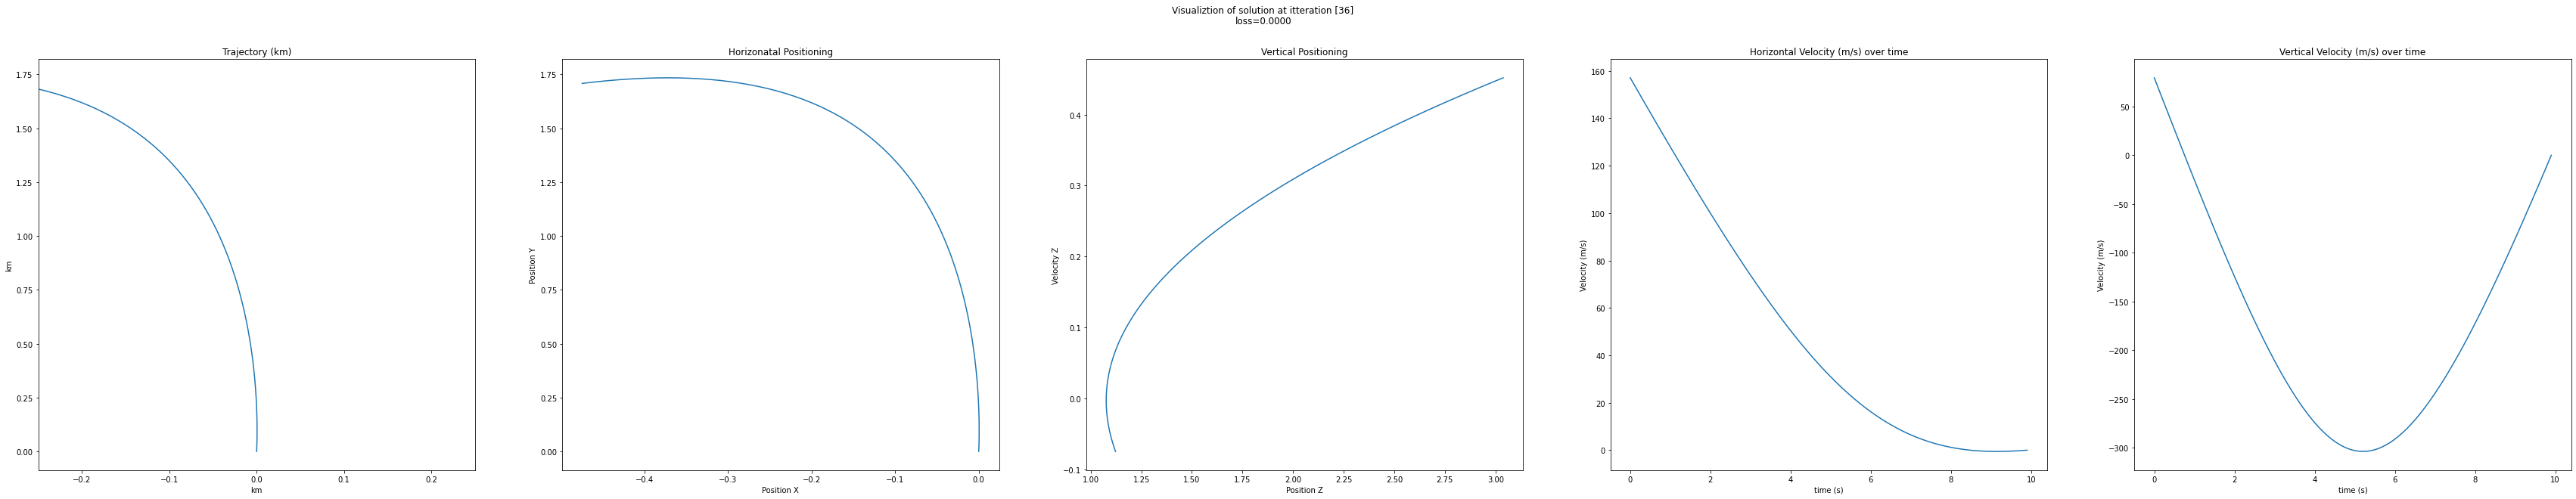

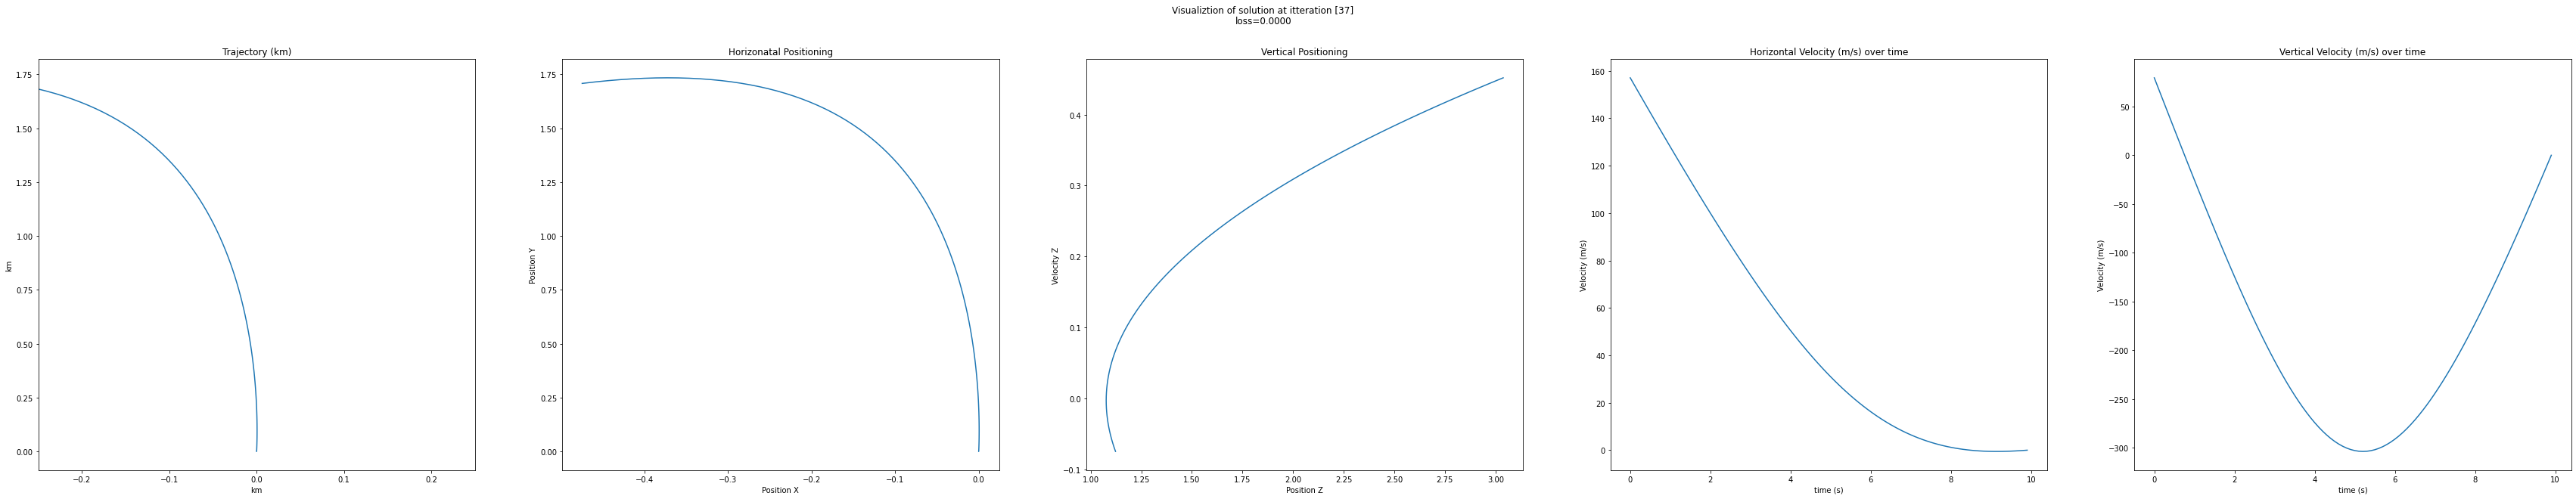

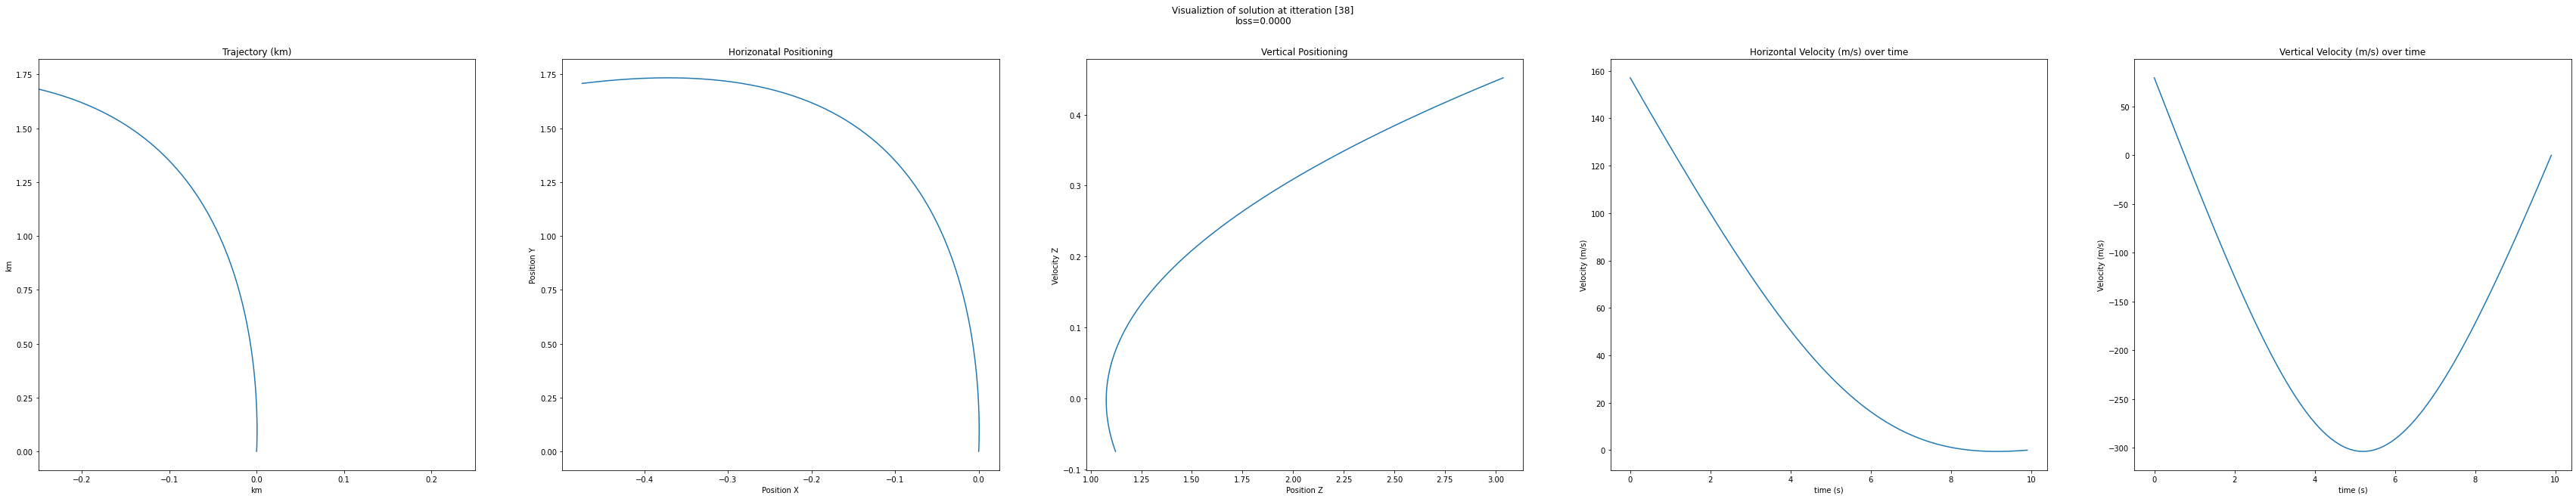

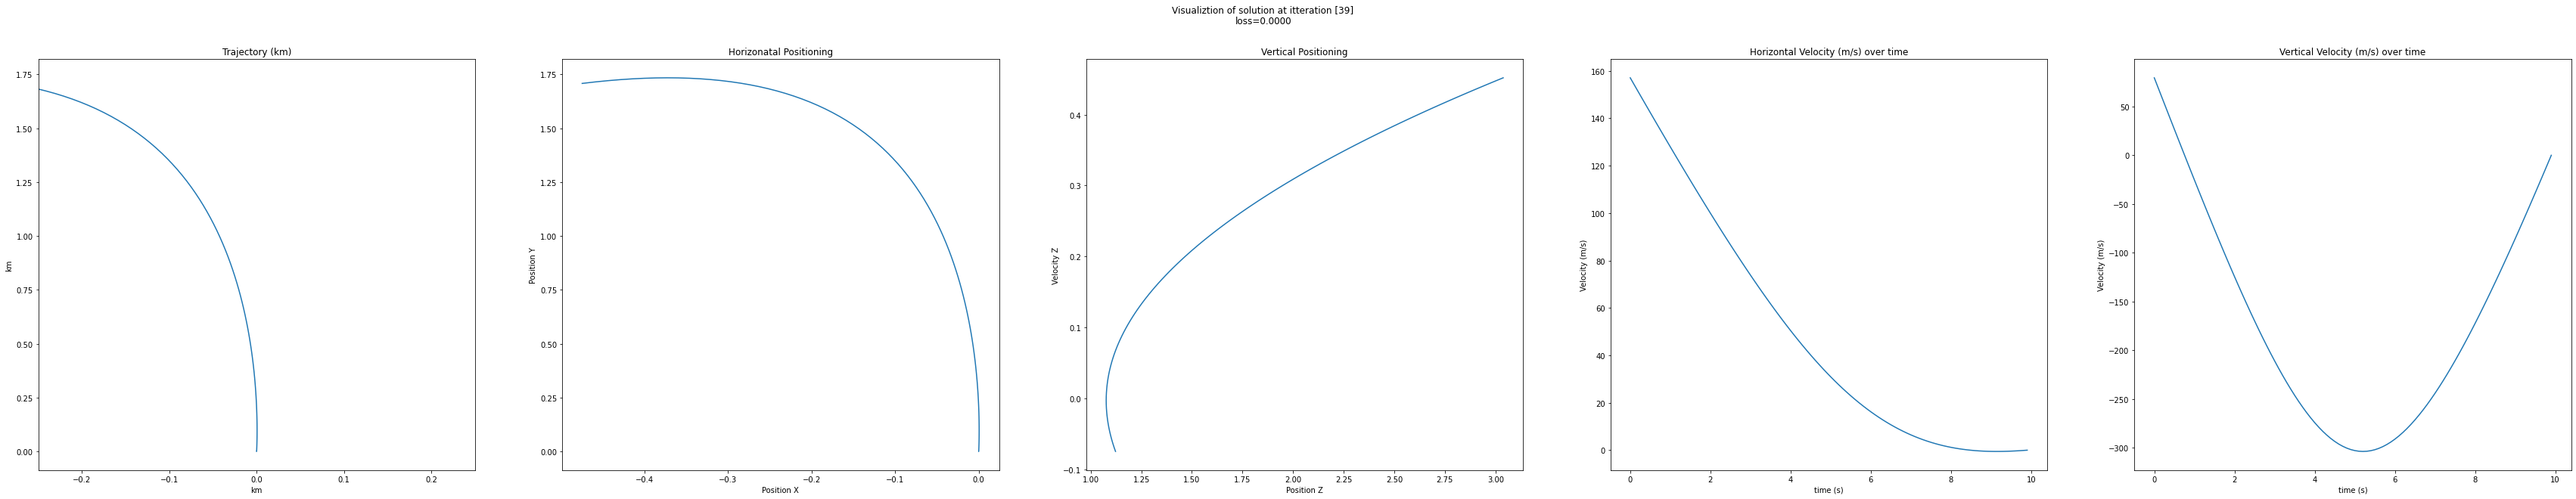

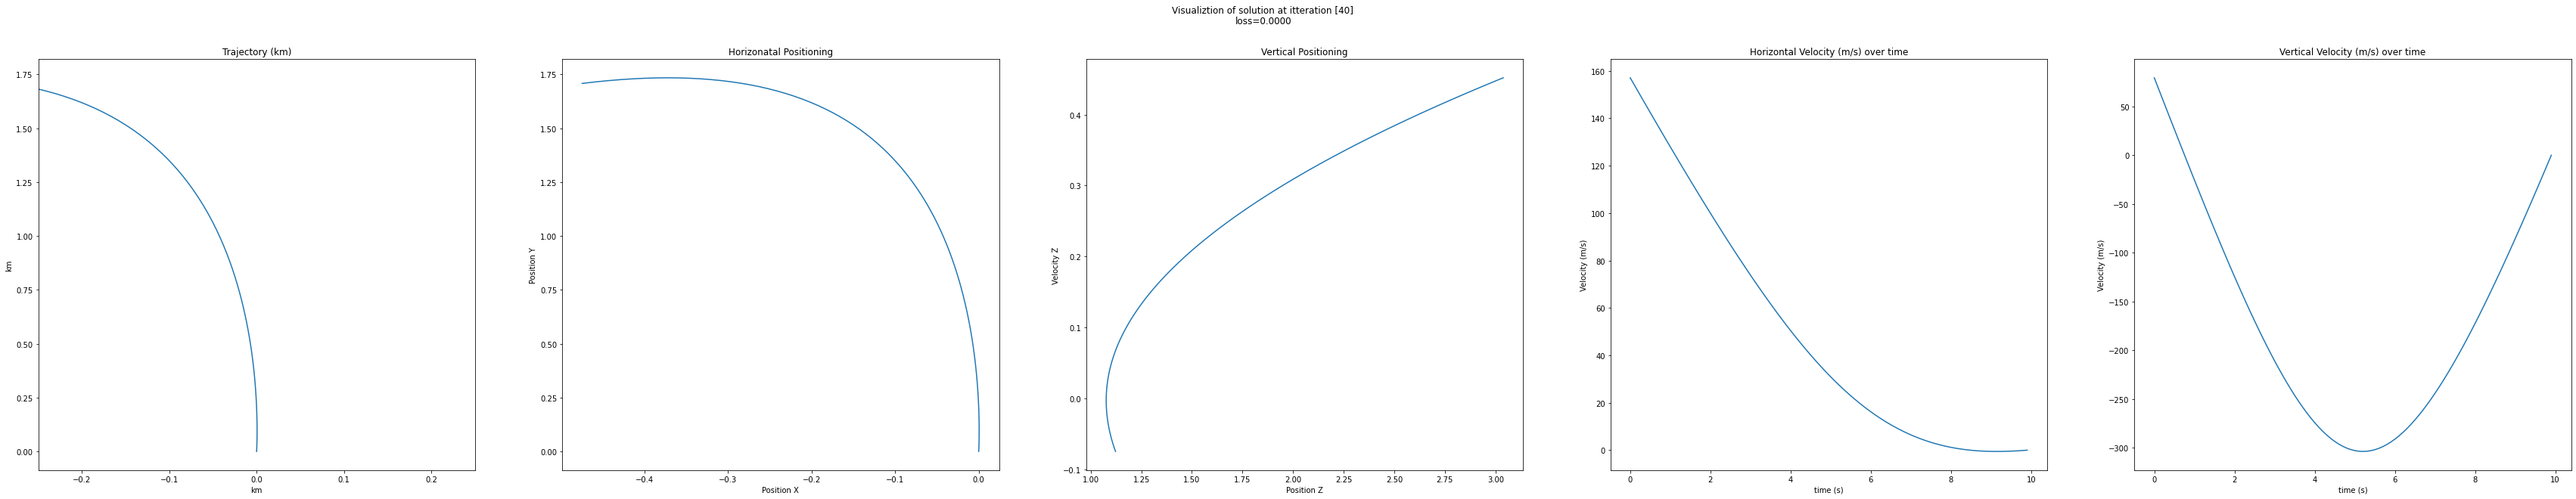

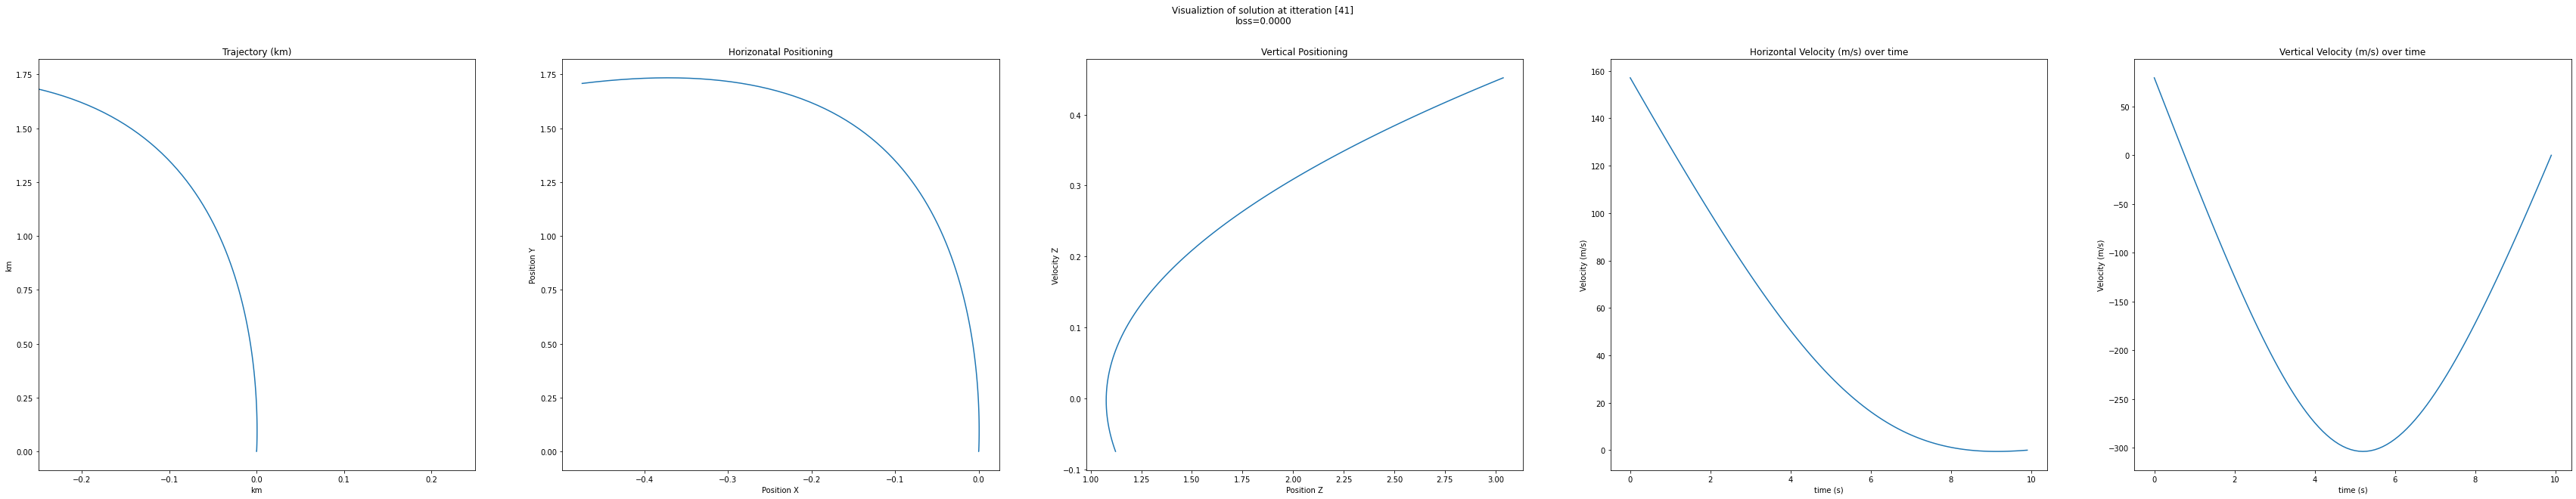

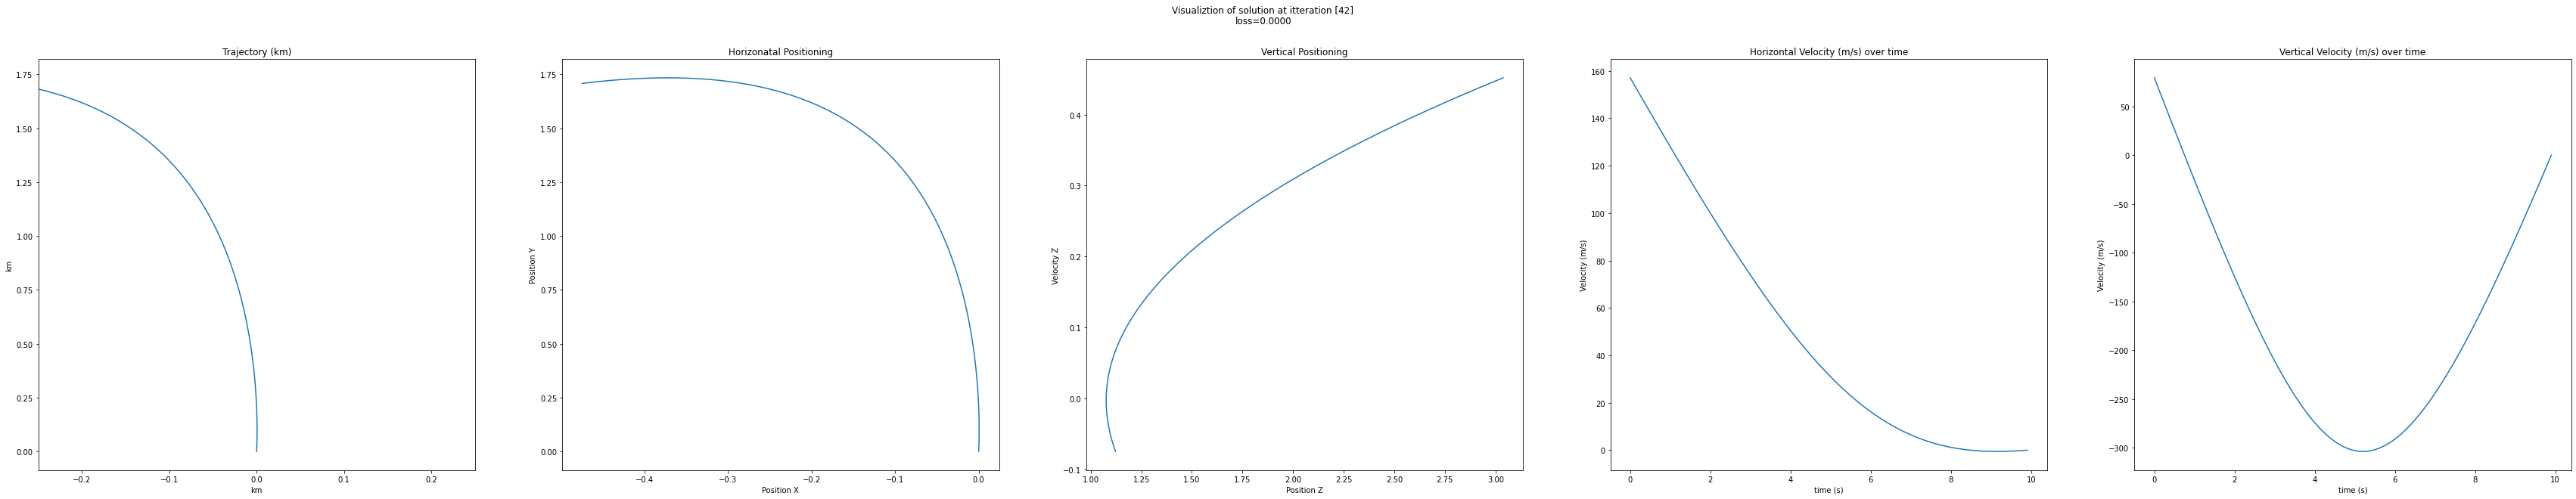

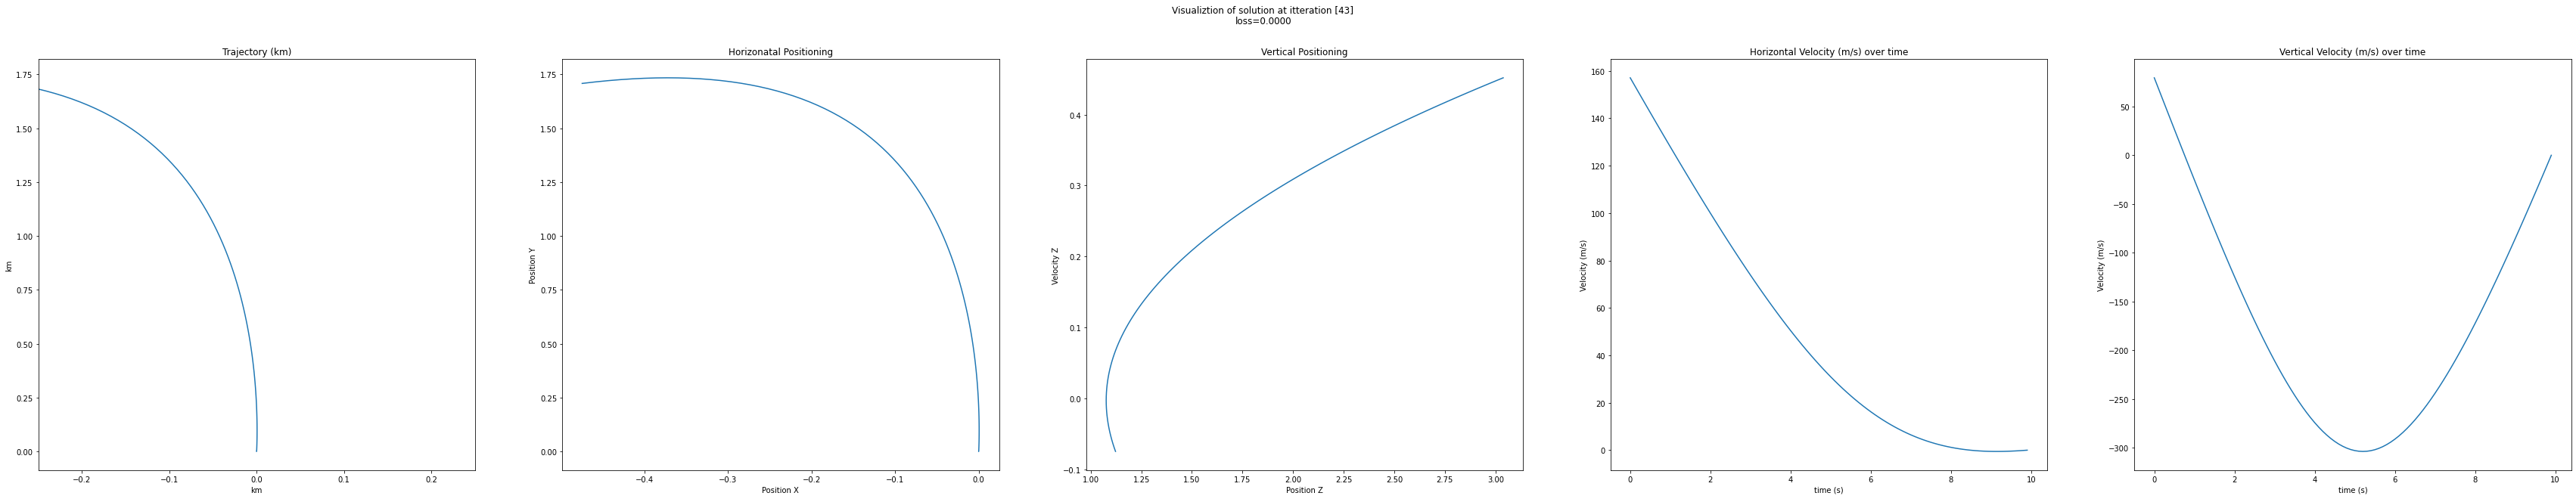

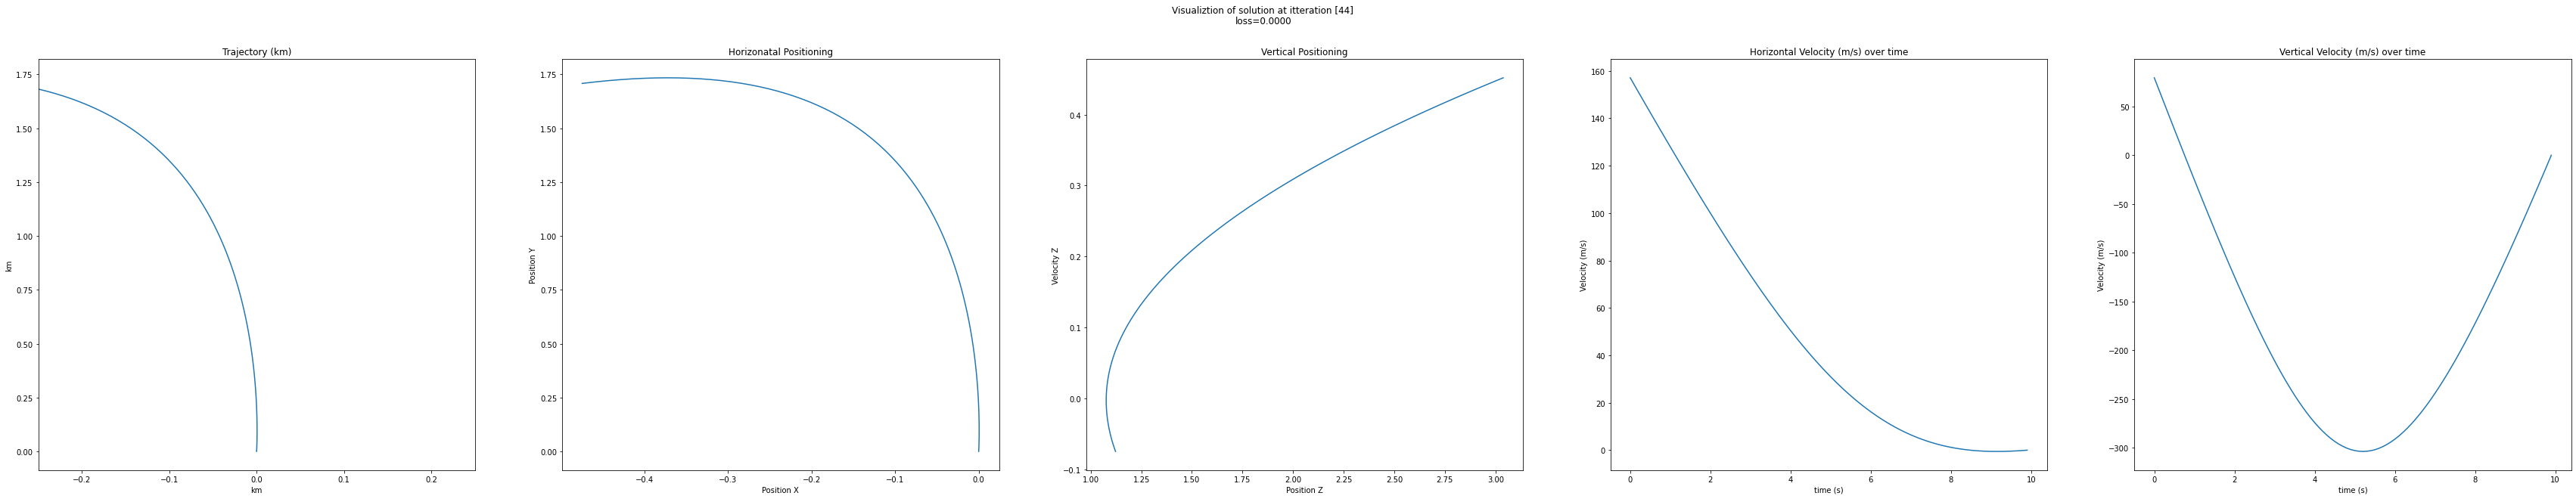

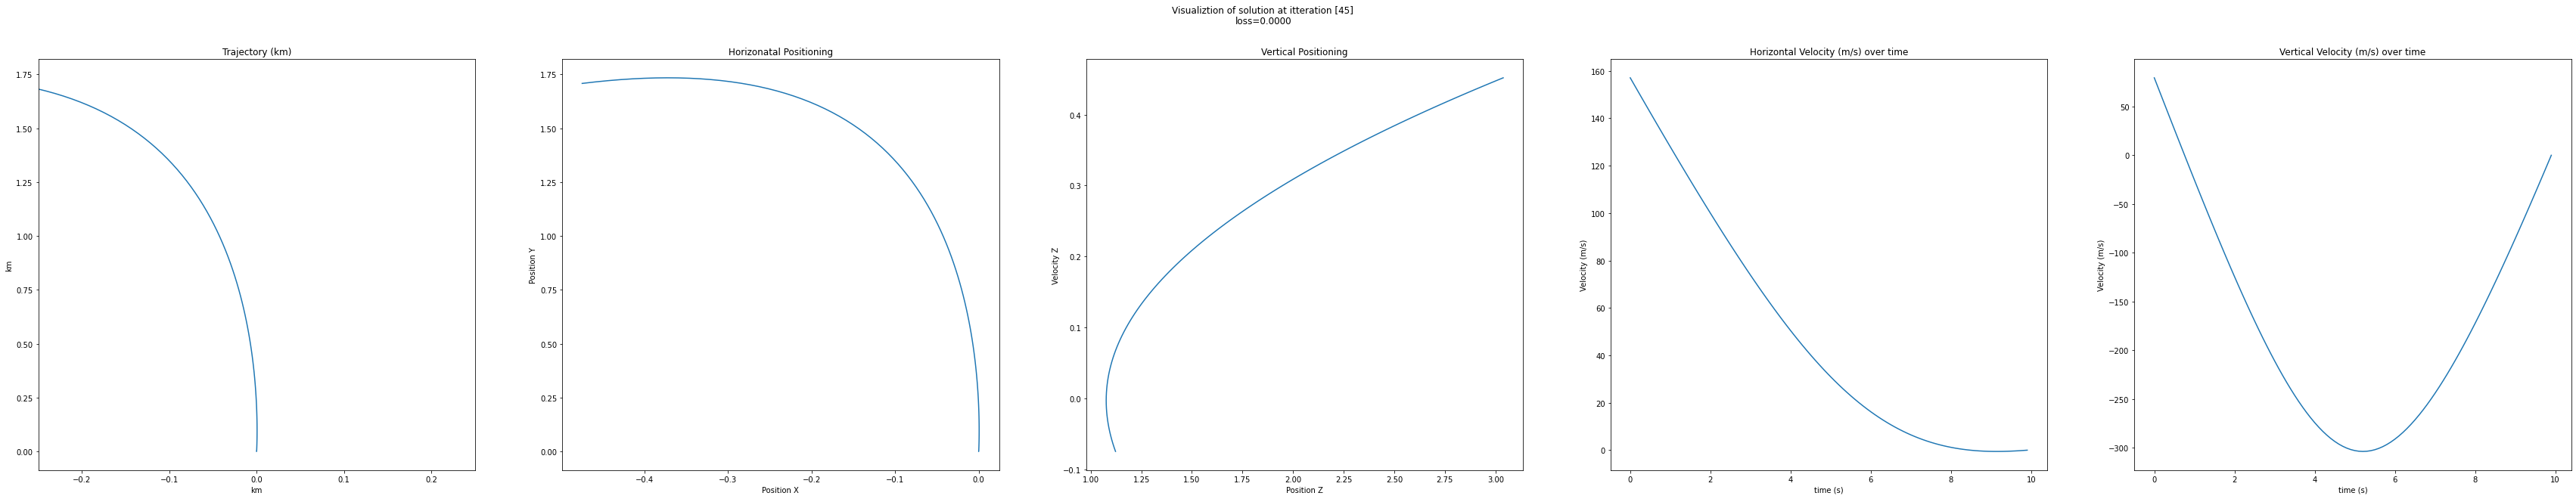

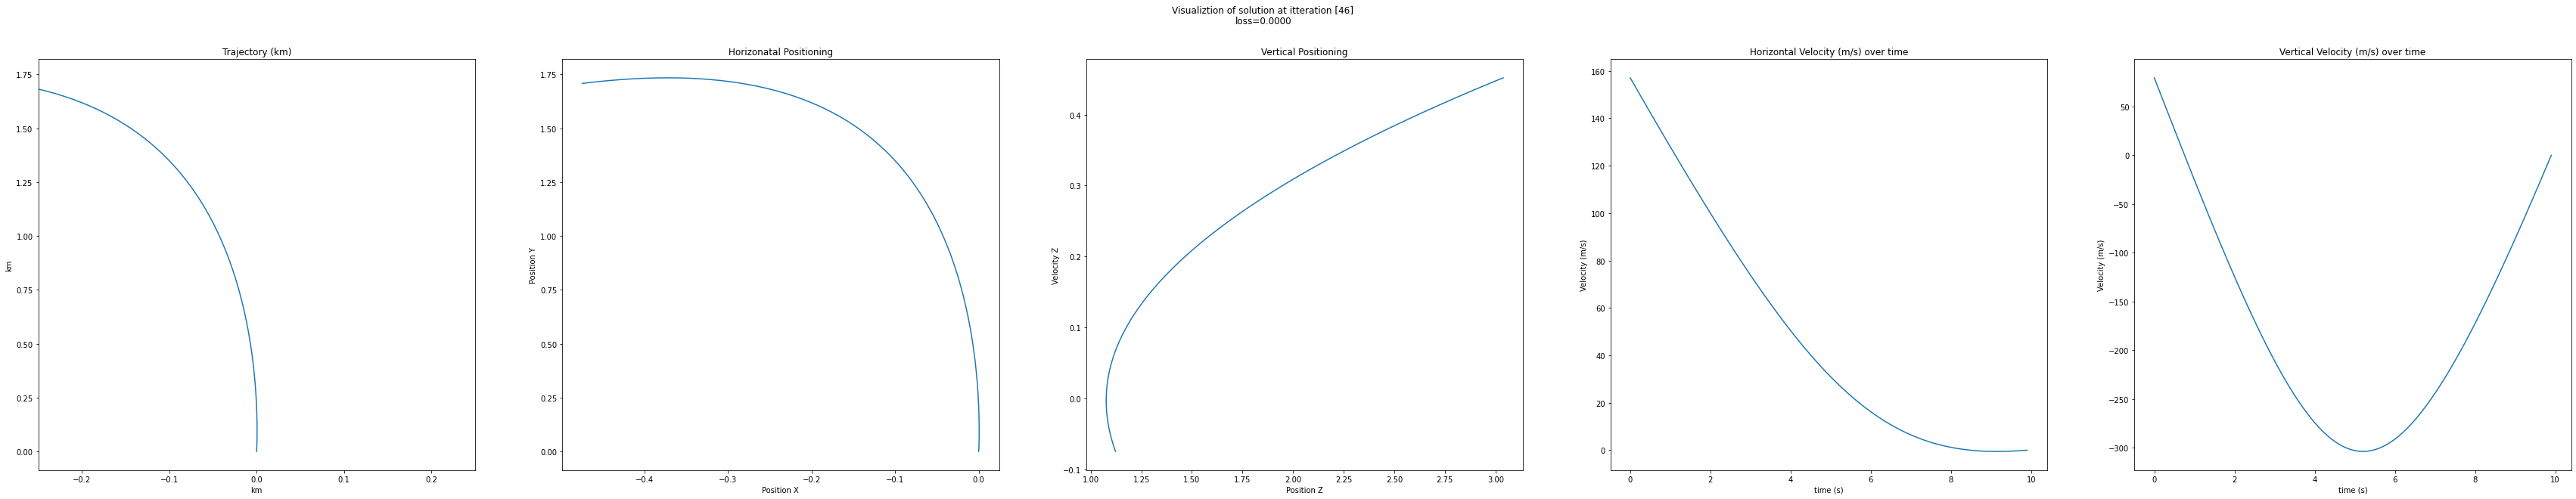

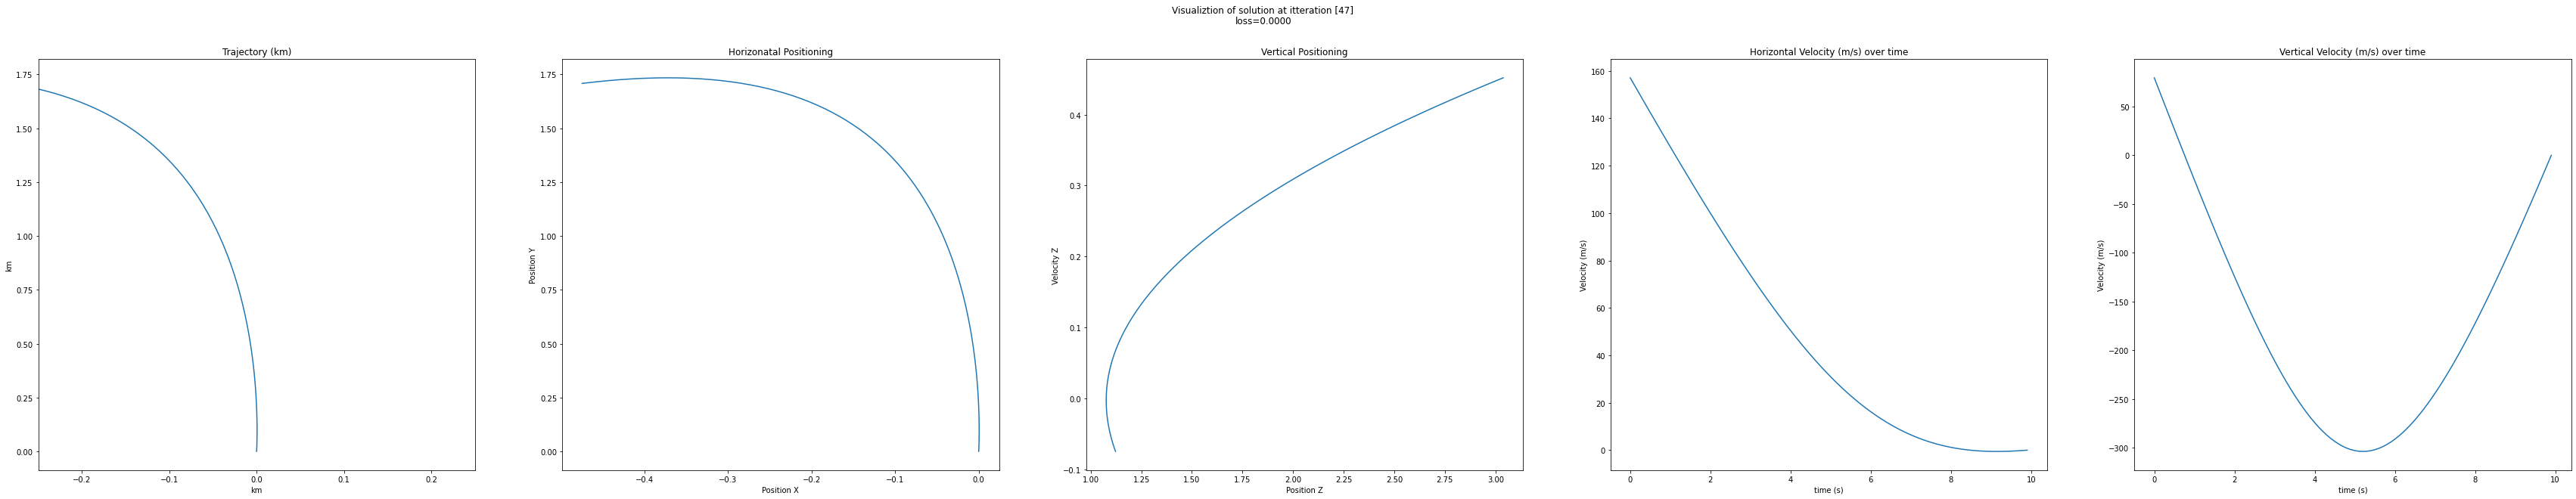

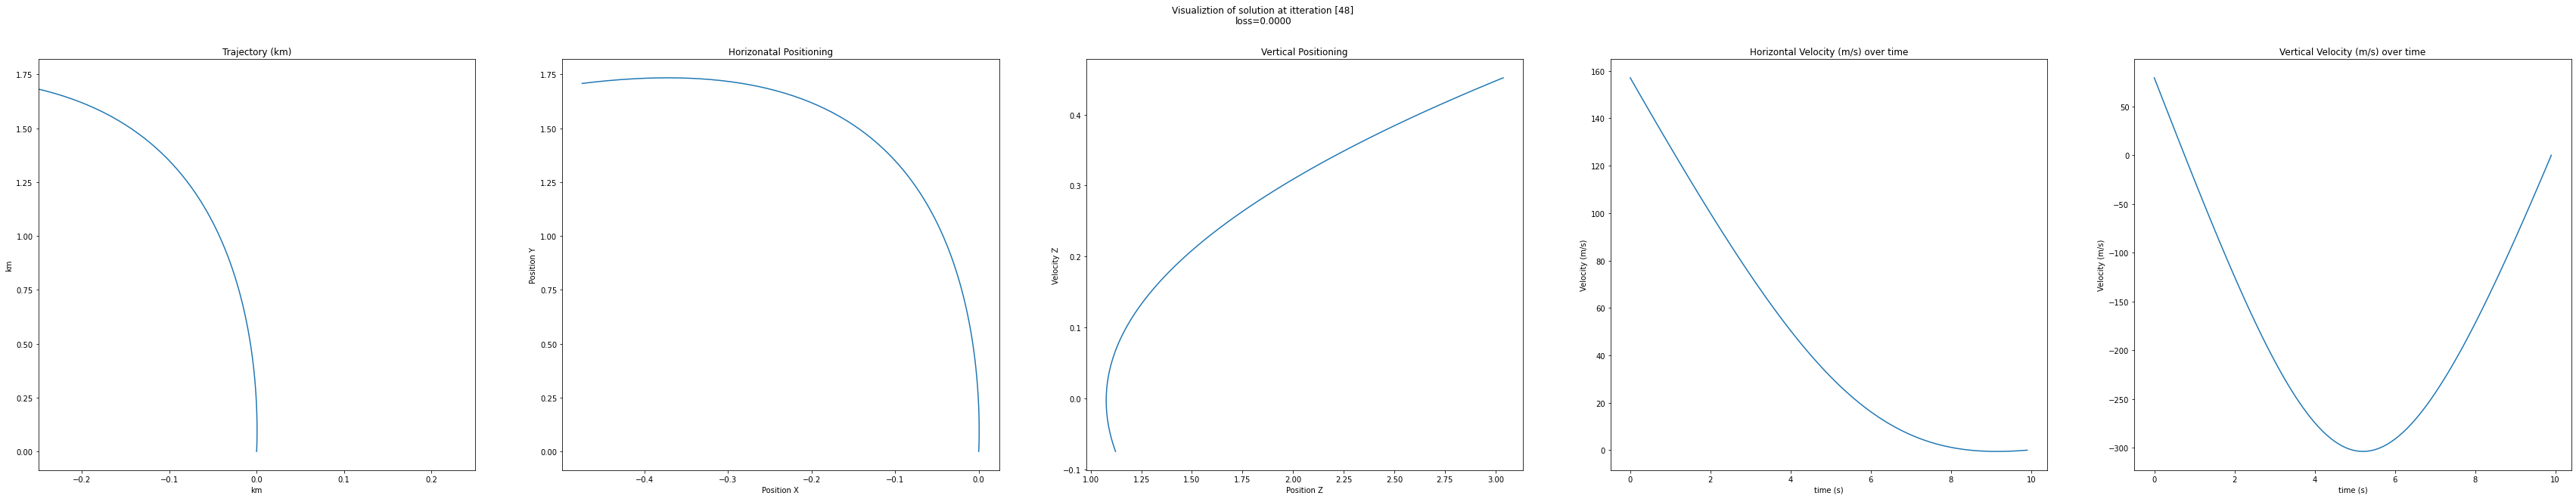

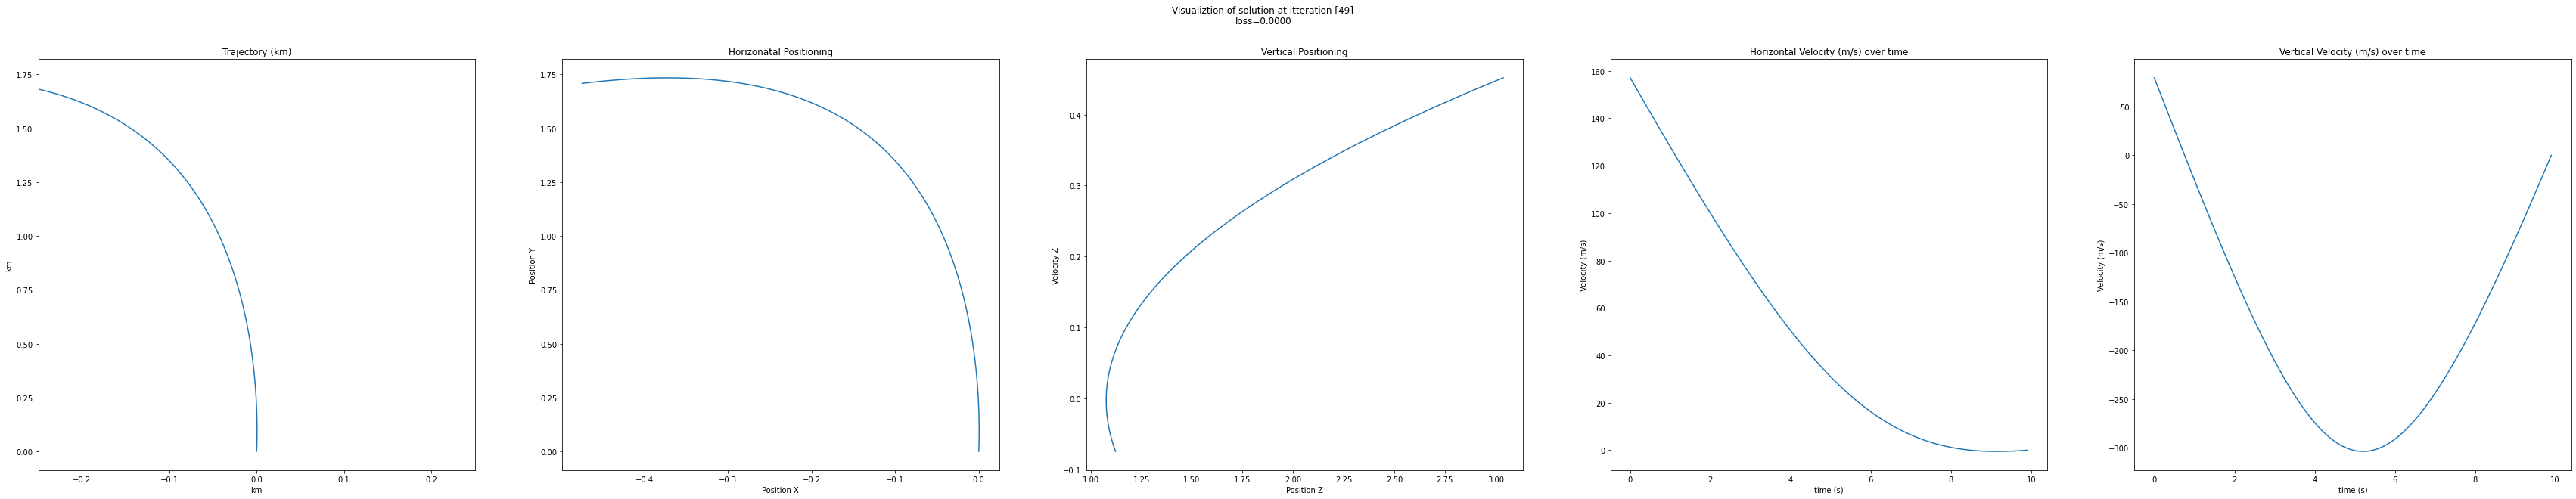

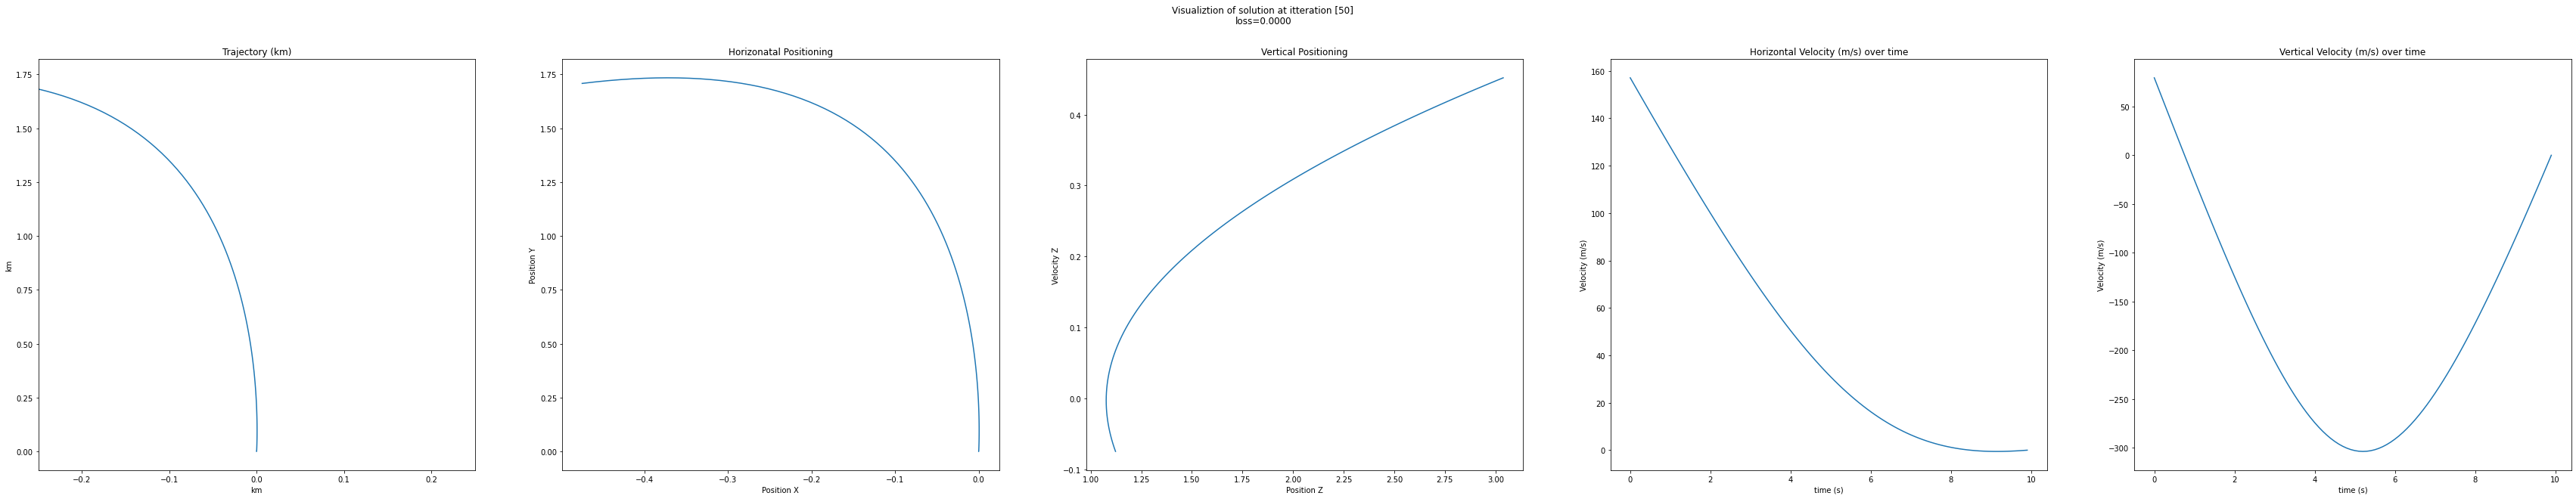

In [35]:
# Now it's time to run the code!

T = 100  # number of time steps
dim_input = 6 # state space dimensions                   
dim_hidden = 6  # latent dimensions                      
dim_output = 5  # action space dimensions                
d = Dynamics()  # define dynamics
c = Controller(dim_input, dim_hidden, dim_output)  # define controller
s = Simulation(c, d, T)  # define simulation
o = Optimize(s)  # define optimizer
o.train(50)  # solve the optimization problem

Text(0.5, 1.0, 'Loss vs iteration')

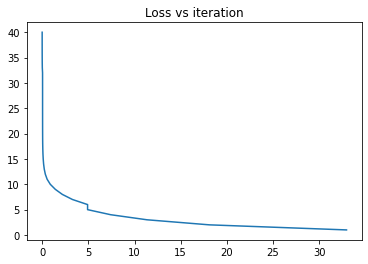

In [36]:
import numpy as np
from matplotlib import pyplot as plt
loss = [32.954, 18.106, 11.346, 7.416, 4.916,\
        4.918, 3.281, 2.189, 1.427, 0.879,\
        0.537, 0.340, 0.226, 0.156, 0.113,\
        0.085, 0.068, 0.058, 0.052, 0.049,\
        0.047, 0.046, 0.045, 0.045, 0.044,\
        0.044, 0.044, 0.044, 0.044, 0.043,\
        0.043, 0.042, 0.015, 0.008, 0.004,\
        0.002, 0.001, 0.000, 0.000, 0.000]
x = np.linspace(1, 40, num=40)
plt.plot(loss,x)
plt.title('Loss vs iteration')

Analysis:
<br /> Here we look at optimizing the descent and landing of a rocket. Given a set of initial conditions we improve the dynamical model to further improve controller performance and we visualize the results for investigation.
<br /><br />Initialization:
<br />The solver is given an initialization batch of size 1. The initialization criteria as following and represent an arbitrary unit.
<br />[x position=3, x velocity=.1, y position-1.5, y velocity=-.15, z position=1, z velocity=0]
<br />Initial conditions are chose randomly for 'n' number of batch batches and evaluated in parallel to improve optimization  
<br /><br />Dynamics:
<br />System dynamics include lateral and vertical thrust vectors on the principal x, y and z axis. Moreover, gravitational acceleration and vertical drag force are considered further. The principal physics that define our system states are F=ma and corresponding Newtonian equations of motion. 
<br /><br />Controller:
<br />The controller acts on the thrusters to adjust the positioning of the rocket to achieve final positioning of x=0, y=0 and z=0.  Additional constraints can be modified to adjust positioning of the rocket on the principal axis.  The controller is currently set as multilayer function with sigmoid output existing between 0 and 1 with a sharp ramp between the two values. 
<br /><br />Plotted results:
<br />Five characteristic plots are generated [Trajectory, Horizontal positioning, vertical positioning, horizontal velocity and vertical velocity].  
From investigation and with consideration the expected behavior of a landing rocket we can asses that our dynamics behave as expected and converge to a location of [x,y,x]=[0,0,0]. 
<br /><br /> Trajectory plot: With the randomly initialized state x and y(x,y!=0), the position of the rocket converges to the converging location with zero loss. In this particular output, the rocket comes from the top and converges to the location [0,0,0] with zero loss.
<br /><br />Horizonatal & Vertical Positioning:
<br />We initialize a state with x and y not equal to zero and with velocity x and velocity y not equal to zero.  We see this behavior mirrored in the position and velocity plots. Moreover, as the system iterated, we notice that the curvature of the position track become tighter and more optimized. Additionally, when looking at the velocity vector we notice similar behavior.
<br /><br />Horizontal & Vertical Velocity:
<br />We initialize a position not equal to zero and the initialization velocity is equal to 0.  The effects of gravity act on the rock propelling it downward and the booter and drag resist the gravitational acceleration. By inspection of the velocity graphs we can see that the velocity and position converge to 0 which represent the rocket landing at h=0 velocity=0 (i.e. trajectory of the rocket converges to zero). 
<br /><br /> Loss vs itteration graph:
With the help of the loss calculated by the above functions, this graph has been calculated. Note: the input is randomized, hence the loss values changes everytime. Nevertheless, the loss vs itteration graph always converges to zero.

<br /><br />Future Work:
<br />The system dynamic is not complete and should include at the very least roll, pitch, weight and other dynamic factors. Furthermore, external factors such as winds nonlinear drag forces as well as other factors should be included the controller optimization. Batched initial conditions should be implemented and computational error should be accounted for. 

<br /><br />Conclusion:
<br />The model behaves as expected on converges to a value of 0. Multiple parameters we investigated to improve code performance which include:
<br /><br />controller depth (i.e. Linear weighted sigmoid function, Gaussian error linear units function and others.).
<br /><br />Initial conditions we controlled within reasonable expect values. 
<br /><br />Improved system dynamics.
<br /><br />From experience it was noticed that the initial conditions of the system should exist with a reasonable range as to not have a solution that diverges due the the Newtonian equations of motion. <br />(i.e. don’t have a lateral initialization position, velocity that cannot be overcome by the controller inputs). Here, random initialization may cause unreal trajectory paths of a rocket but at the end, they all converge to zero. 